## AllLife Bank

### Objectives

* To predict whether a customer will buy a personal loan or not
* Identify most significant variables
* Determine which segments of customers should be most/least targeted

**(Level of Significance to be Used for Statistical & Hypothesis Testing: 0.05)**

* ID: Customer ID
* Age: Customer’s age (whole number)
* Experience: Customer's years of professional experience
* Income: Annual customer income (in \\$k)
* ZIP Code: Home address Zip code
* Family: Total family members in customer's household
* CCAvg: Average monthly credit card spend (in \\$k)
* Education: Highest Education Achieved: 1-Undergrad, 2-Graduate, 3-Advanced/Professional
* Mortgage: Remaining mortgage balance on house, if applicable (in \\$k)
* Personal_Loan: Did customer accept previous loan offer by bank
* Securities_Account: Does customer have active securities account with bank?
* CD_Account: Does customer have active Certificate of Deposit with bank?
* Online: Is customer using online banking options?
* CreditCard: Does customer have credit cards with other companies/banks?

In [459]:
# Import the usual libraries for Math, Statistics, Dataframe, and Graphical functions, setting Warnings to Ignore

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import stats # Import for statistical/hypothesis testing

import statsmodels.api as sm # Import statistical summary for Regression analysis

# Import Some of the ML models to be used at a later stage

from sklearn.linear_model import LogisticRegression # library for creating logistic Regression Model and Summaries


from sklearn.tree import DecisionTreeClassifier # Library for building decision trees
from sklearn.model_selection import train_test_split # Library for training (x) and testing (y) the data
from sklearn.model_selection import GridSearchCV # Library for Hyperparameter tuning the Decision Tree model

from sklearn.metrics import confusion_matrix, classification_report # Library to be used for Confusion Matrix (TP, FP, TN, FN)

# Library to test Logistic Regression scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, precision_recall_curve  

from sklearn import metrics # Library for CM Model Testing, etc.
from sklearn import tree # Library to be used for creating and pruning Decision Trees

In [204]:
data = pd.read_csv('Loan_Modelling.csv')
loans = data.copy() # Create a copy of the dataset, keeping original data as backup

In [205]:
loans.head() # Inspect the top 5 rows

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [206]:
loans.tail() # Inspect the bottom 5 rows

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [207]:
loans.shape # Check the overall columns/rows in the data

(5000, 14)

In [208]:
loans.info() # Summarize the various datatype and any missing values within the sample dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [209]:
loans.describe() # Statistical summary of data - all columns included since all are numerical

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [210]:
loans.isna().sum() # As expected, there are no missing/null values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [211]:
loans.nunique() # Check the unique counts to determine patterns, if any, and columns to drop (every row is unique, etc.)

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

### Observations

Since the **ID column has 5000 unique values**, it serves no purpose in this analysis and can be **immediately dropped** from the sample dataset.

**A lot of the columns are showing as datatype Int64, however are almost functioning like categorical values** with a few unique values, and in many cases with only **binary 0/1 values**.  This needs to be further examined to determine whether/not to convert to categories, which would then be converted via One-Hot Encoding process, which may be redundant overall.

**The ZIPCode column has 467 unique values**, which is a lot to work with since it is **not a true numerical value but rather a categorical variable indicating where people live**.  

The best option will probably be to **regroup the data by region/s, into around 5 to 10 regions**.

In [212]:
loans = loans.drop('ID',axis=1) # Drop the entire ID column

### Regrouping Zips by State

In [213]:
# Install and import a library for mapping zipcodes by state/region, etc.

# ! pip install uszipcode 
# from uszipcode import zipcode
from uszipcode import SearchEngine

In [214]:
# Use the SearchEngine function combined with a for loop to map the state against each respective zip code in loans['ZIPcode']

search = SearchEngine(simple_zipcode=True) 

State = []
for i in loans['ZIPCode']:
    zipcode = search.by_zipcode(i)
    state = zipcode.state
    State.append(state)

In [215]:
loans['State']=State # Create a new column in the loans dataframe using States details created above

In [216]:
loans['State'].describe() # Explore the statistical summary of the State's column to better determine key groupings

count     4966
unique       1
top         CA
freq      4966
Name: State, dtype: object

- Since **all zip codes** within the sample data are for the state of **California**, this column is not very helpful in it's current form, however it may be worth **exploring the data at a county level instead**
- There appear to be **some missing rows**, meaning that some of the original zips were not correctly read and converted over

In [217]:
# Again, Use the SearchEngine function combined with a for loop to map counties against each respective zip code in loans['ZIPcode']

search = SearchEngine(simple_zipcode=True) 

County = []
for i in loans['ZIPCode']:
    zipcode = search.by_zipcode(i)
    county = zipcode.county
    County.append(county)

In [218]:
loans['County']=County # Create a new column in the loans dataframe using County details created above

In [219]:
loans['County'].describe() # Explore the statistical summary of the County's column to better determine key groupings

count                   4966
unique                    38
top       Los Angeles County
freq                    1095
Name: County, dtype: object

- **LA County is the most popular county** within the dataset (over 20%)
- There are 34 missing rows data, similar to State as expected

In [220]:
# Show the % split, by county, of the sample dataset, to better determine dropping less common variables

round(loans['County'].value_counts()/len(loans['County']),2)

Los Angeles County        0.22
San Diego County          0.11
Santa Clara County        0.11
Alameda County            0.10
Orange County             0.07
San Francisco County      0.05
San Mateo County          0.04
Sacramento County         0.04
Santa Barbara County      0.03
Yolo County               0.03
Monterey County           0.03
Ventura County            0.02
San Bernardino County     0.02
Contra Costa County       0.02
Santa Cruz County         0.01
Riverside County          0.01
Marin County              0.01
Kern County               0.01
Solano County             0.01
San Luis Obispo County    0.01
Humboldt County           0.01
Sonoma County             0.01
Fresno County             0.01
Placer County             0.00
Butte County              0.00
Shasta County             0.00
El Dorado County          0.00
Stanislaus County         0.00
San Benito County         0.00
San Joaquin County        0.00
Mendocino County          0.00
Siskiyou County           0.00
Tuolumne

### Insights

- There are **only 38 counties in the sample dataset**, with **Los Angeles County** being the most frequent, accounting for approximately **22% of the data**
- Similar to the conversion of Zip to State, there are some **missing rows of data, so some values didn't convert correctly and will need to be addressed manually**
- This is a much more manageable amount of data
    - However, a lot of the counties shown above **account for only a fraction of the sample dataset and may need to be dropped** in order to optimize regression modelling
    
    
Regardless of which counties will be dropped, if any, the **County column can be converted to categorical and the original ZIPCode and newly-created State columns can be dropped since they are no longer needed**.

In [221]:
# Identify those Zip codes that did not convert over correctly for State/County mapping

ZipsToMap = loans['ZIPCode'][loans['County'].isnull()] 

ZipsToMap.value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

There are **4 zip codes** that didn't correctly map over and will **require manual updating**.  
Those zips and respective counties are as follows:
- 92717: Orange
- 96651: APO/FPO
- 92634: Orange
- 93077: Unknown

Since **3 of the zips codes appear to not be associated with California**, and the entire dataset as a result, these rows of data can be dropped.  **The county for zip code 92717 will be updated to Orange**.

In [222]:
# Replace all Null values to String based on zip codes listed above

if [loans['ZIPCode']==96651]:
    loans['County'].replace(np.nan,'APO/FPO',inplace=True)
    
if [loans['ZIPCode']==93077]:
    loans['County'].replace(np.nan,'Unknown',inplace=True)
    
if [loans['ZIPCode']==92717]:
    loans['County'].replace(np.nan,'Orange',inplace=True)
    
if [loans['ZIPCode']==92634]:
    loans['County'].replace(np.nan,'Orange',inplace=True)     

In [223]:
loans['County']=loans.County.astype('category') # Convert County column from Object to Category

Since there are no missing values remaining within the County column, which has replaced the Zip and State columns, they can now be dropped from the dataset.

In [224]:
loans = loans.drop('ZIPCode', axis=1) # Drop the entire ZIPCode column
loans = loans.drop('State', axis=1) # Drop the entire State column

In [225]:
loans.info() # Rerun the info summary to ensure no missing values and the State/Zip columns have been removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   int64   
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   int64   
 8   Securities_Account  5000 non-null   int64   
 9   CD_Account          5000 non-null   int64   
 10  Online              5000 non-null   int64   
 11  CreditCard          5000 non-null   int64   
 12  County              5000 non-null   category
dtypes: category(1), float64(1), int64(11)
memory usage: 475.3 KB


There are no missing values, and **County now is a Category - all other variables are numeric** (all Integers excluding CCAvg which is a float.

In [226]:
loans.describe(include='all').T # Rerun the statistical summary (Transposed) including all columns as County is Categorical

count unique                 top  freq     mean       std  \
Age                 5000    NaN                 NaN   NaN  45.3384   11.4632   
Experience          5000    NaN                 NaN   NaN  20.1046    11.468   
Income              5000    NaN                 NaN   NaN  73.7742   46.0337   
Family              5000    NaN                 NaN   NaN   2.3964   1.14766   
CCAvg               5000    NaN                 NaN   NaN  1.93794   1.74766   
Education           5000    NaN                 NaN   NaN    1.881  0.839869   
Mortgage            5000    NaN                 NaN   NaN  56.4988   101.714   
Personal_Loan       5000    NaN                 NaN   NaN    0.096  0.294621   
Securities_Account  5000    NaN                 NaN   NaN   0.1044  0.305809   
CD_Account          5000    NaN                 NaN   NaN   0.0604   0.23825   
Online              5000    NaN                 NaN   NaN   0.5968  0.490589   
CreditCard          5000    NaN                 NaN   NaN    0.294  0.455637   
County              5000     39  Los Angeles County  1095      NaN       NaN   

                    min  25%  50%  75%  max  
Age                  23   35   45   55   67  
Experience           -3   10   20   30   43  
Income                8   39   64   98  224  
Family                1    1    2    3    4  
CCAvg                 0  0.7  1.5  2.5   10  
Education             1    1    2    3    3  
Mortgage              0    0    0  101  635  
Personal_Loan         0    0    0    0    1  
Securities_Account    0    0    0    0    1  
CD_Account            0    0    0    0    1  
Online                0    0    1    1    1  
CreditCard            0    0    0    1    1  
County              NaN  NaN  NaN  NaN  NaN

- **The Mean and Median scores for Age and Experience are very close, indicating Normal Distribution**
- The ID, ZIPCode, and State columns have been dropped as expected.  
    - **The newly created County column is no longer missing data per the updates made above**


In [227]:
if [loans['Experience']==-1]:
    loans['Experience'].replace(-1,1,inplace=True)
if [loans['Experience']==-1]:
    loans['Experience'].replace(-2,2,inplace=True)
if [loans['Experience']==-1]:
    loans['Experience'].replace(-3,3,inplace=True)

In [228]:
loans.describe() # Rerun the statistical summary (Transposed) including all columns as County is Categorical

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200     2.396400     1.937938   
std      11.463166    11.415189    46.033729     1.147663     1.747659   
min      23.000000     0.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal_Loan  Securities_Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD_Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

### Inspecting Columns with Less than 5 Unique Values

In [229]:
# Print a summary of all columns with only a few unique values (4 or less)

UniqCols = []

for cols in list(loans):
    if loans[cols].nunique() < 5:
        print(cols)
        print(np.sort(loans[cols].unique()))
        UniqCols = np.append(UniqCols,cols)

print('')
print('-' * 50) # Print a line of 50 line (-) spaces to show separation of sections
print('Columns with unique variables - to possibly convert to Categorical')
print('')
print(UniqCols)

Family
[1 2 3 4]
Education
[1 2 3]
Personal_Loan
[0 1]
Securities_Account
[0 1]
CD_Account
[0 1]
Online
[0 1]
CreditCard
[0 1]

--------------------------------------------------
Columns with unique variables - to possibly convert to Categorical

['Family' 'Education' 'Personal_Loan' 'Securities_Account' 'CD_Account'
 'Online' 'CreditCard']


Those columns with only a small amount of unique values are broken out as follows:
- Family: 1,2,3,4 family members
- Education: Level 1, 2, or 3 (as was shown above in data summary)

The remaining columns with only 2 options (Yes/1 or No/0) are as follows:
- Personal_Loan
- Securities_Account
- CD_Account
- Online
- CreditCard

**For now, these will not be converted to categorical values** since any regression modelling will require all fields to be numerical, essentially reversing the changes in datatype.

In [289]:
cat_cols = ['Education','Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.5 KB


## EDA - Univariate

### Numerical Values with Few Unique Values
#### (Functioning Similar to Categorical)

In [290]:
# Create a simple plot to show the unique values within a given variable and the respective % split

def plotpercent (plot,feature):
    total=len(feature)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - .05
        y = p.get_y() + p.get_height() + 7.5
        ax.annotate(percentage, (x,y), size=15)

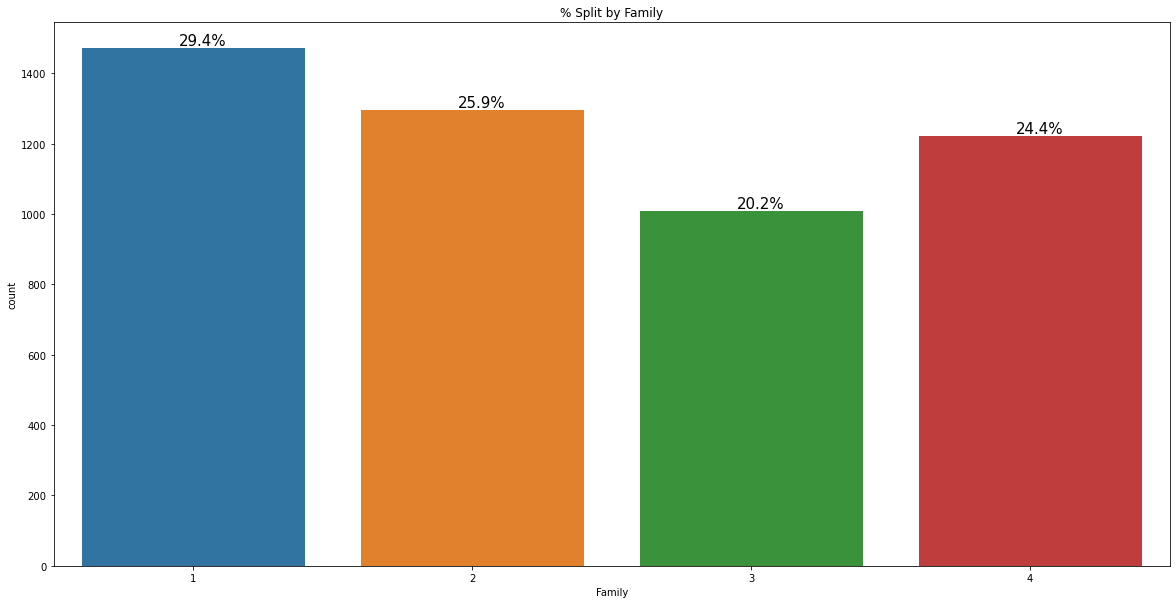

In [291]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(loans['Family']); # Each chart is named ax so that the percentages are shown for each bar vs. column total
plotpercent(ax,loans['Family'])
plt.title('% Split by Family');

- Nearly **30% of the dataset consists of single people (family size of 1)**
- Without the specfics of each family's dynamics, the count of 2 could represent just two partners/spouses or possibly single parents with 1 child
- **Nearly 45% of the dataset comprises of 3 or 4 family members**
    - The count of 3 family members could reflect 2 partners/spouses and 1 child or a single parent with 2 children
    - The count of 4 most likely indicates 2 partners/spouses and 2 children, however there is always the possibility that a family sampled consisted of 1 parents with 3 children

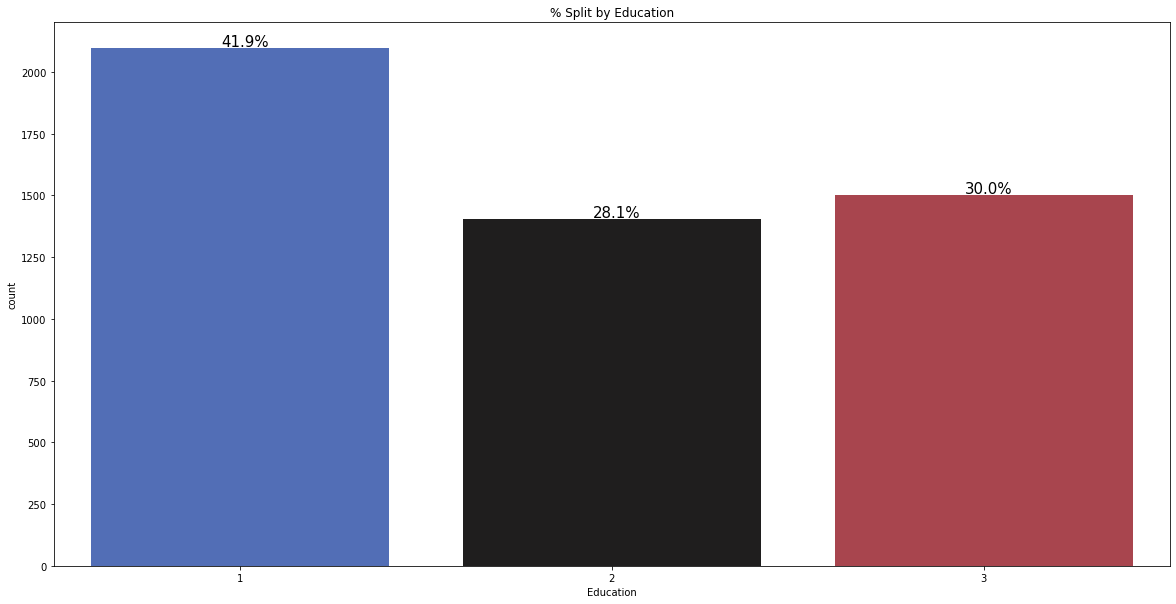

In [292]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(loans['Education'],palette = 'icefire'); # Name each chart ax for use of annotation in function above
plotpercent(ax,loans['Education'])
plt.title('% Split by Education');

- Nearly **42% of the customers in the dataset have an education level of 1 (Undergraduate Degree)**
- There is a relatively even split (28%/30%) of customers with education levels 2/Graduate and 3/Advanced
- The sample dataset contains **no customers with less than an Undergraduate Degree**

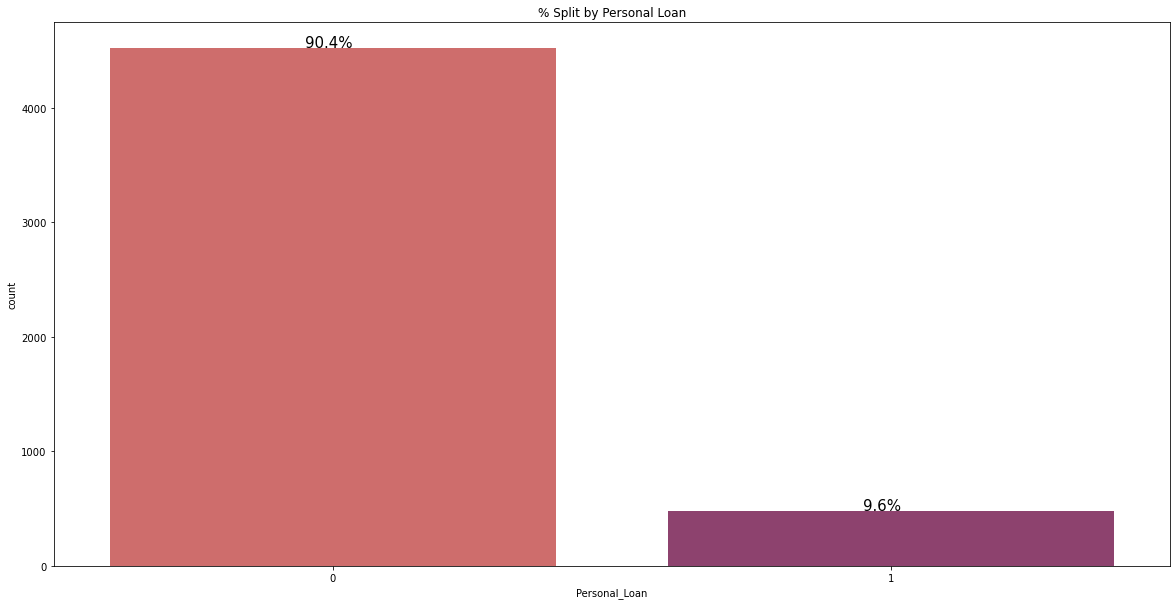

In [293]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(loans['Personal_Loan'],palette = 'flare'); # Name each chart ax for use of annotation in function above
plotpercent(ax,loans['Personal_Loan'])
plt.title('% Split by Personal Loan');

- **Most customers (over 90%) have not accepted/been accepted for a personal loan**

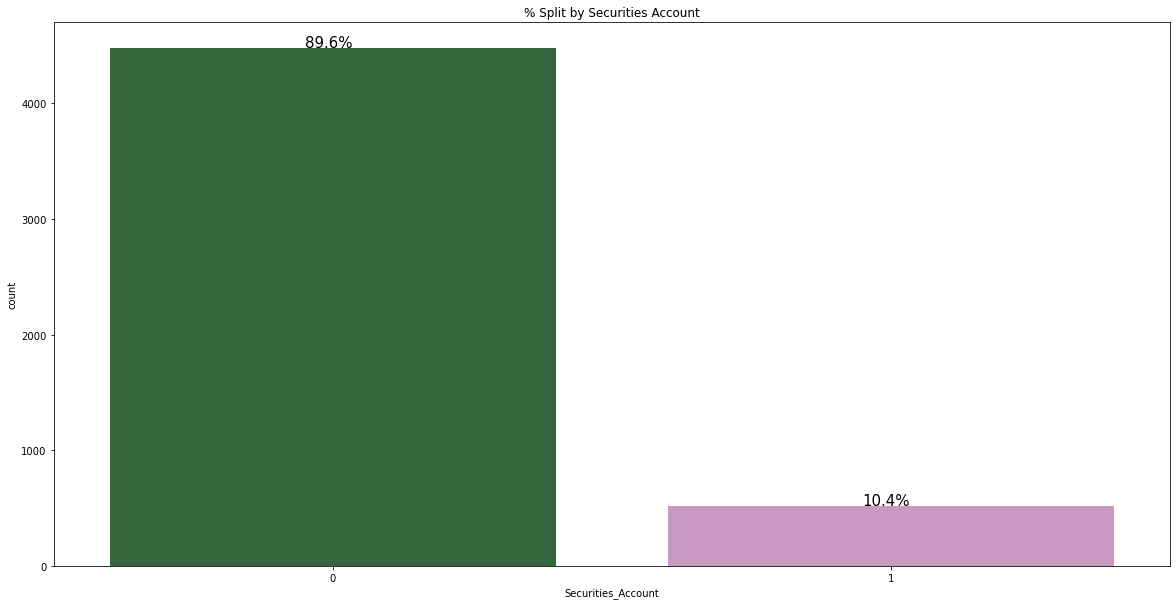

In [294]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(loans['Securities_Account'],palette = 'cubehelix'); # Name each chart ax for use of annotation in function above
plotpercent(ax,loans['Securities_Account'])
plt.title('% Split by Securities Account');

- Interestingly, nearly the **same amount of customers (+- 90%) do not have a Securities Account** with the bank

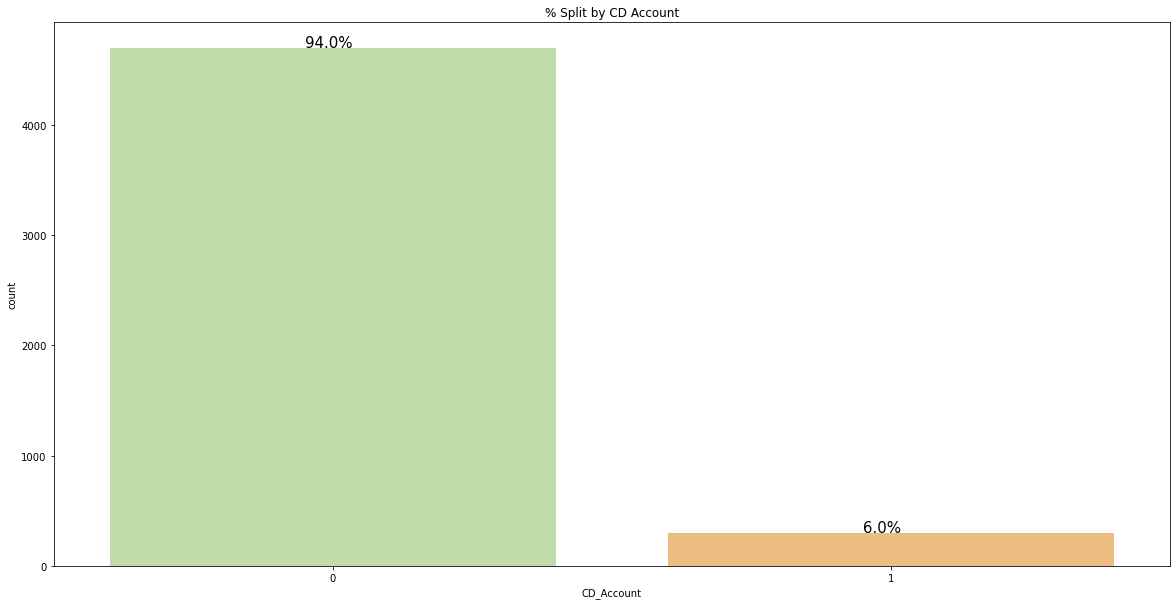

In [295]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(loans['CD_Account'],palette = 'Spectral_r'); # Name each chart ax for use of annotation in function above
plotpercent(ax,loans['CD_Account'])
plt.title('% Split by CD Account');

- An even higher percentage of customers **(94%) do not have a CD Account with the bank**

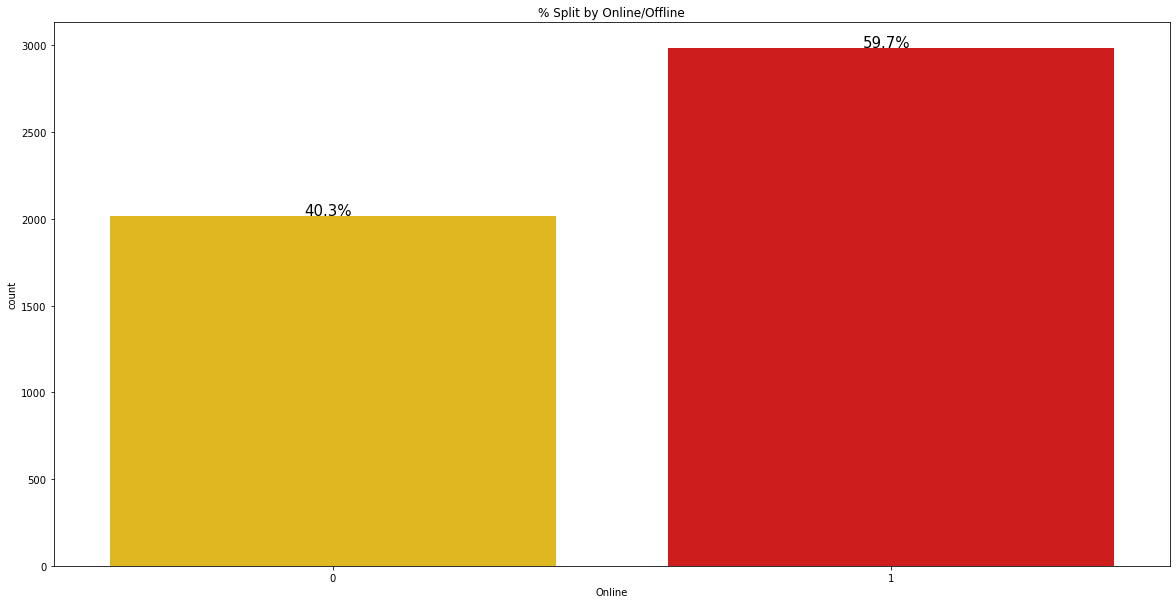

In [296]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(loans['Online'],palette = 'hot_r'); # Name each chart ax for use of annotation in function above
plotpercent(ax,loans['Online'])
plt.title('% Split by Online/Offline');

- Roughly **60% of customers have an online account with the bank**
    - This split **appears to be quite a low % given today's technological climate** where most transactions of online/done via an app

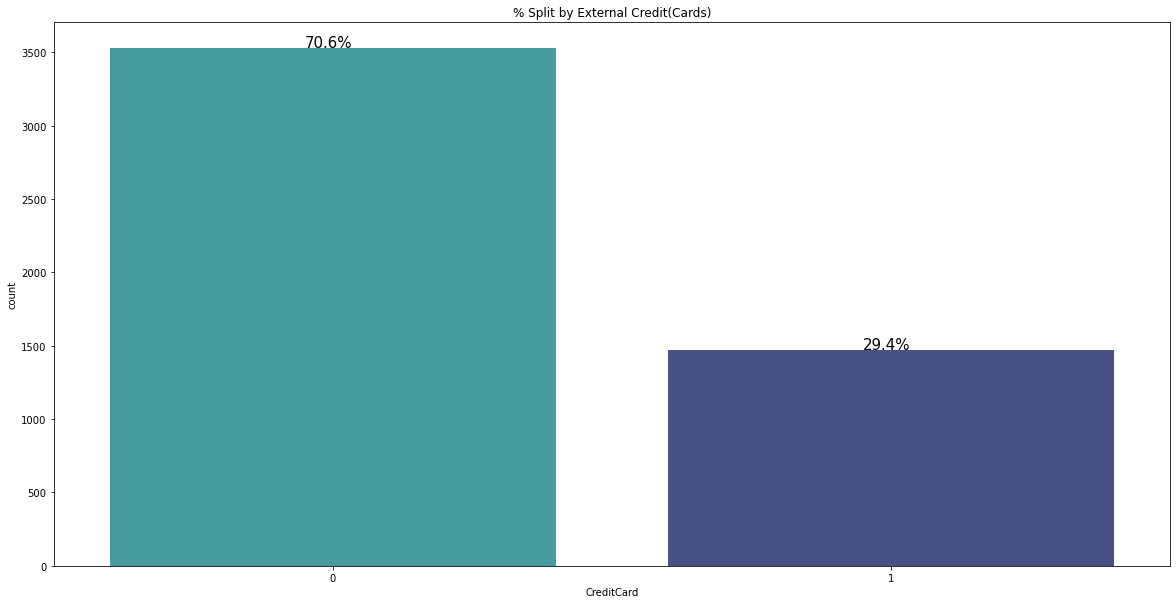

In [297]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

ax = sns.countplot(loans['CreditCard'],palette = 'mako_r'); # Name each chart ax for use of annotation in function above
plotpercent(ax,loans['CreditCard'])
plt.title('% Split by External Credit(Cards)');

- Just under **30% of customers with the bank do have credit cards with other companies**
    - This could provide an **opportunity** for the AllLife Bank to **target these customers for personal loans or other credit** products
    - There are still **70% of customers sampled that do not have any credit outside** of the bank who could prove to be **loyal customers, or at least customers not wishing to shop around much**

### Categorical
#### (Only 1 Column - County)

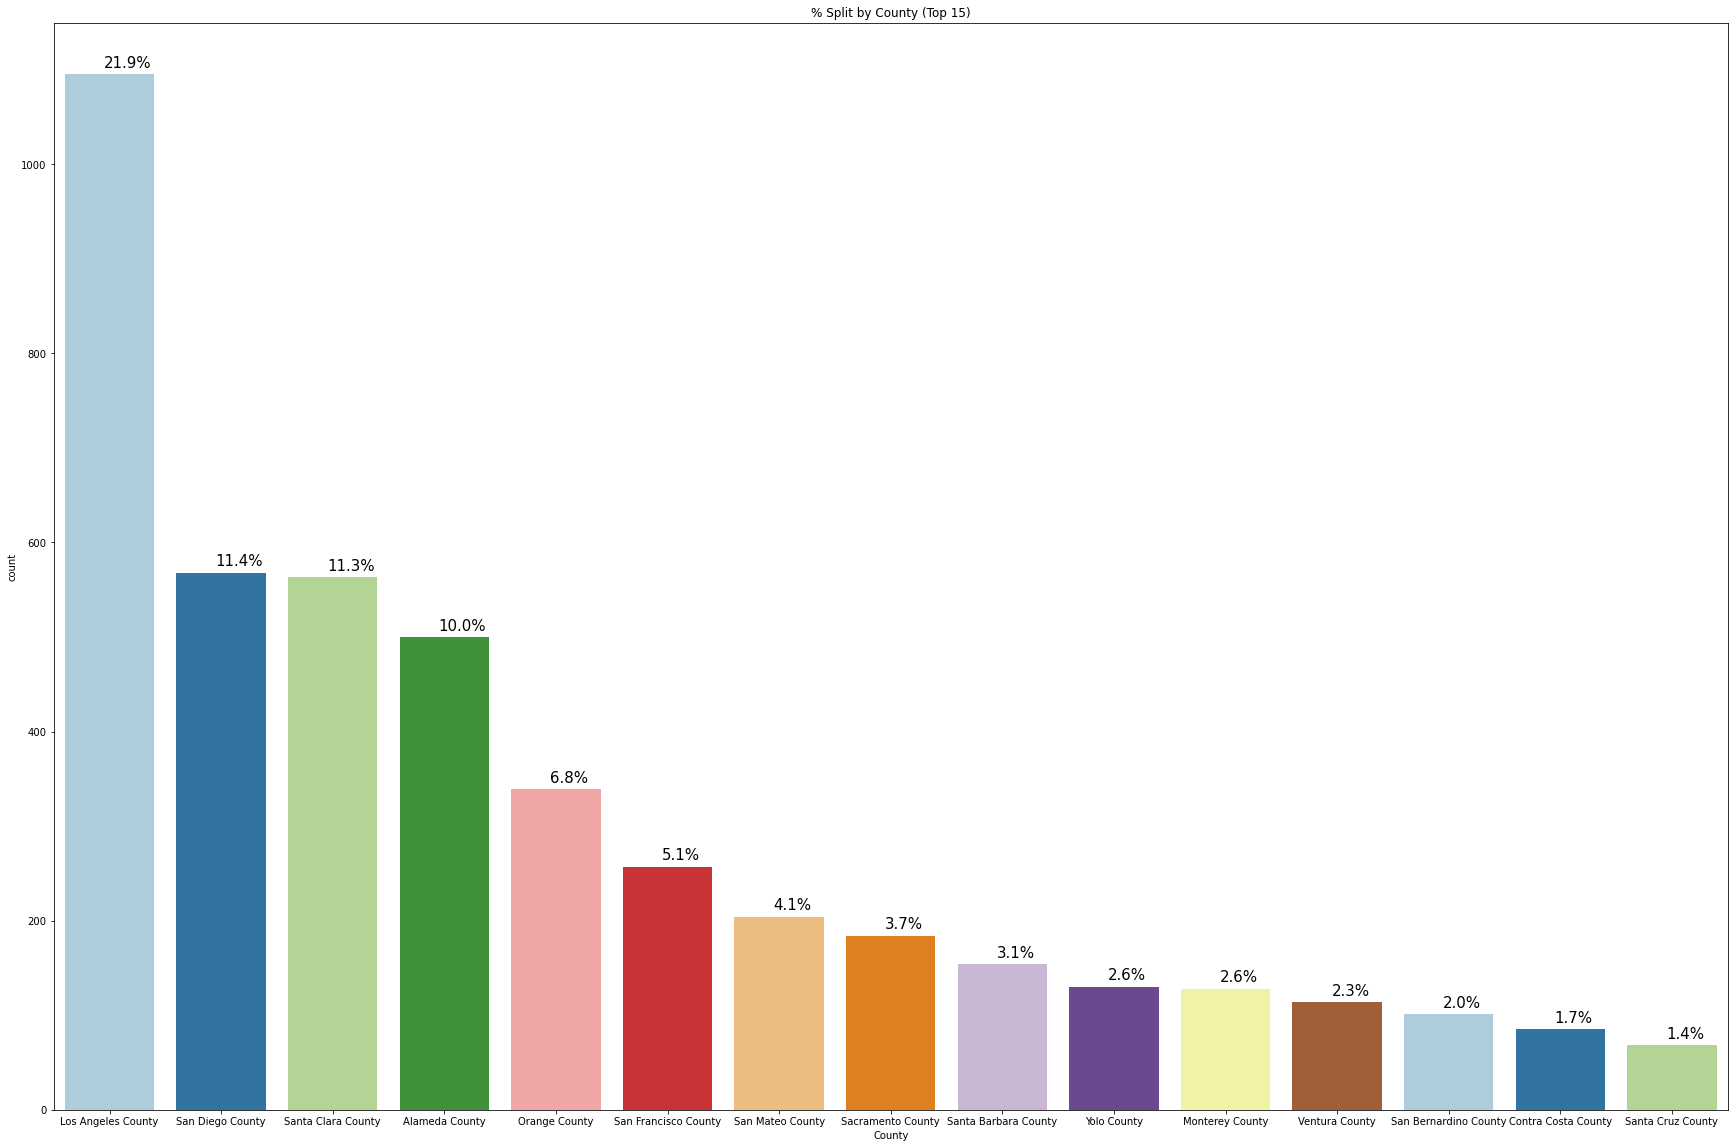

In [298]:
plt.figure(figsize=(30,20)); # Setting a larger size to account for top 15 counties

# Name each chart ax for use of annotation in function above
ax = sns.countplot(loans['County'],palette = 'Paired', order=loans.County.value_counts().iloc[:15].index); # Limit to top 15
plotpercent(ax,loans['County'])
plt.title('% Split by County (Top 15)');

- As previously noted, **LA County** is the most popular location within the sample, making up **22% of the dataset**
- **San Diego, Santa Clara, and Alameda counties** are the next largest by populous and **similarly split (between 10% and 11.5%)**
- These to 15 counties make up over 90% of the dataset - to save on model sizing later on, the smaller counties may be dropped

### Summary Insights
- There appears to be **strong correlations between the low % of customers taking a personal loan** with the bank (around only 10%) and the majority of those same customers also **opting out of Securities (Trading) or CD (low % Locked-Savings) Accounts**
    - AllLife Bank may have an **opporunity to create and market multi-product packages to customers** that provide both **investment and savings opportunities, coupled with access to various credit facilities (loans/lines)** based on customer profiles
- It would also appear that either an opportunity exists to **target more customers not currently banking online** and help bring them up to speed with neccessary training and support, or **targetting a more unique approach to those not wishing/able to use online banking**

### Numerical Values
#### (Regular Size - Multiple Unique Values)

In [299]:
# Create subplot function to show histogram & boxplot, on 2 rows and with a shared x axis, for numerical variables selected

def histbox(feature,figsize = (20,10), bins = None):
    f, (ax_box1, ax_hist1) = plt.subplots(nrows = 2,
                                         sharex = True,
                                         figsize = figsize)
    sns.distplot(feature,kde=True,ax=ax_hist1, bins=bins)
    ax_hist1.axvline(np.mean(feature), color = 'blue') # Include the column mean (blue) on the histogram
    ax_hist1.axvline(np.median(feature), color='yellow') # Include the column median (yellow) on the histogram
    sns.boxplot(feature,ax=ax_box1, showmeans=True, color = 'purple') # Include the column mean (green) on a purple boxplot
    plt.grid() 

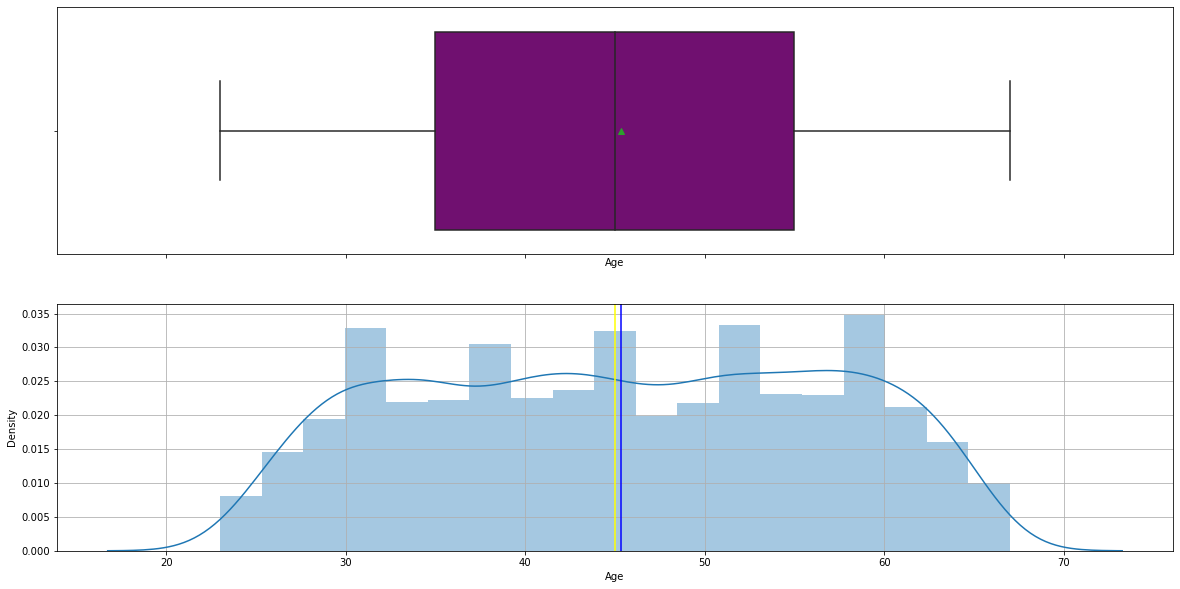

In [300]:
histbox(loans['Age']) # Run above function for the Age column in the sample

The data is normally distributed (Mean slightly higher than Median) with no outliers

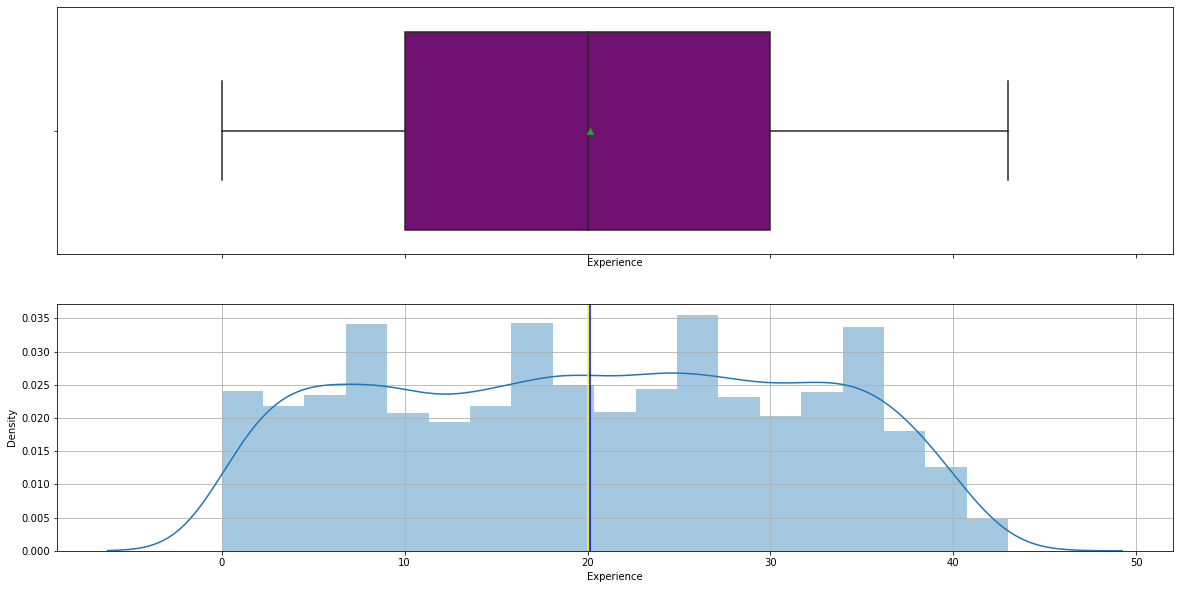

In [301]:
histbox(loans['Experience']) # Run above function for the Experience column in the sample

The data is normally distributed (Mean almost identical to Median) with no outliers.

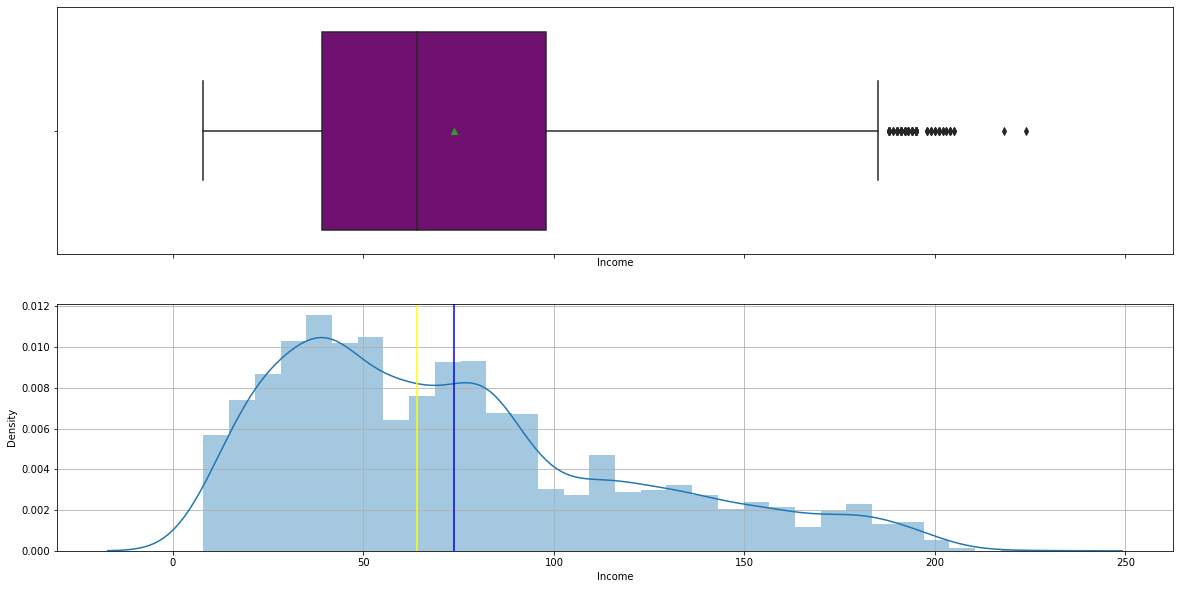

In [302]:
histbox(loans['Income']) # Run above function for the Income column in the sample

The data is right skewed (Mean greater than Median) with quite a few outliers outside of the \\$185k range.

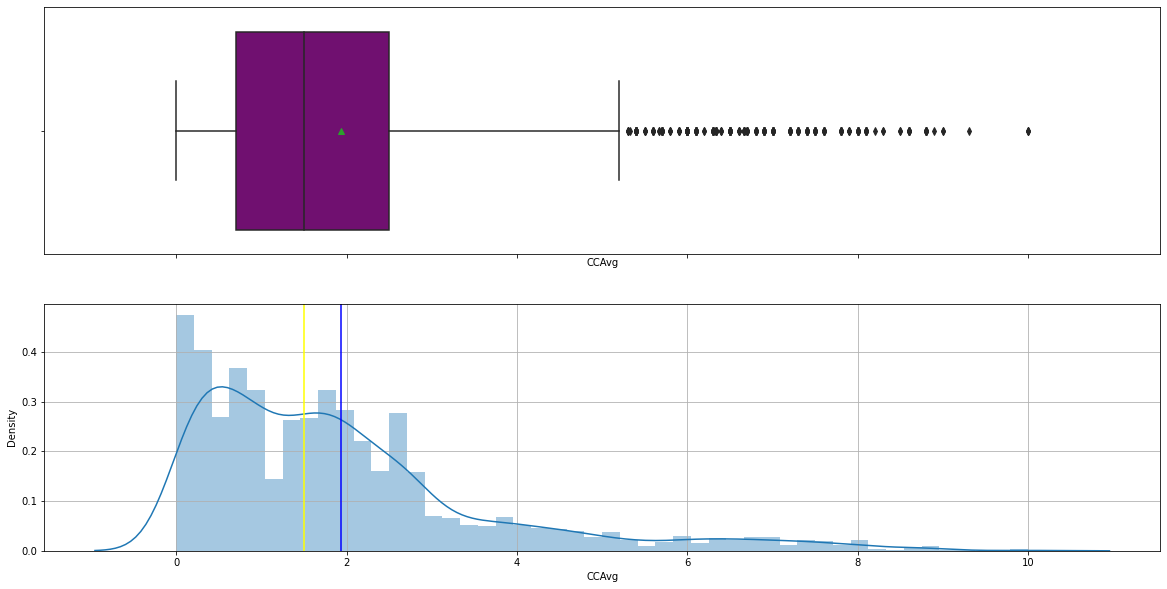

In [303]:
histbox(loans['CCAvg']) # Run above function for the Income column in the sample

The data is right skewed (Mean greater than Median) with various outliers outside of \\$5k monthly spend range.

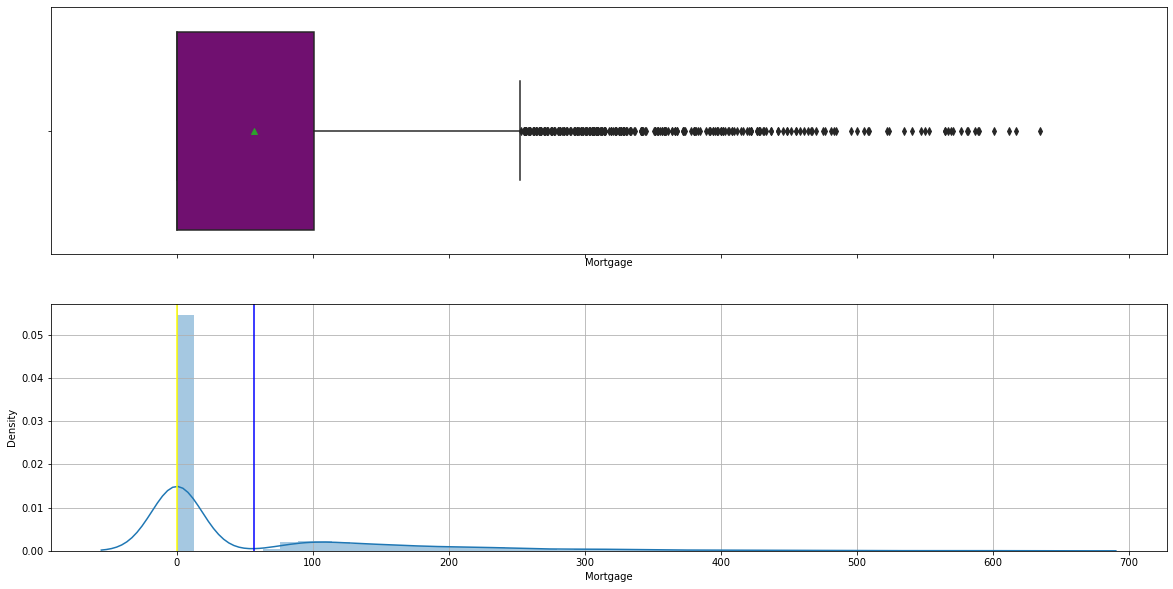

In [304]:
histbox(loans['Mortgage']) # Run above function for the Income column in the sample

The data is right skewed (Mean greater than Median) with numerous outliers outside of \\$260k average mortgage balance range.

## EDA - Bivariate

In [305]:
# Explore the correlation between all numerical variable

corr = loans.corr()

corr

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.993991 -0.055269 -0.046418 -0.052012   
Experience          0.993991    1.000000 -0.046876 -0.051851 -0.049738   
Income             -0.055269   -0.046876  1.000000 -0.157501  0.645984   
Family             -0.046418   -0.051851 -0.157501  1.000000 -0.109275   
CCAvg              -0.052012   -0.049738  0.645984 -0.109275  1.000000   
Education           0.041334    0.013919 -0.187524  0.064929 -0.136124   
Mortgage           -0.012539   -0.011097  0.206806 -0.020445  0.109905   
Personal_Loan      -0.007726   -0.008304  0.502462  0.061367  0.366889   
Securities_Account -0.000436   -0.000989 -0.002616  0.019994  0.015086   
CD_Account          0.008043    0.009735  0.169738  0.014110  0.136534   
Online              0.013702    0.014051  0.014206  0.010354 -0.003611   
CreditCard          0.007681    0.008851 -0.002385  0.011588 -0.006689   

                    Education  Mortgage  Personal_Loan  Securities_Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.013919 -0.011097      -0.008304           -0.000989   
Income              -0.187524  0.206806       0.502462           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136124  0.109905       0.366889            0.015086   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal_Loan        0.136722  0.142095       1.000000            0.021954   
Securities_Account  -0.010812 -0.005411       0.021954            1.000000   
CD_Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD_Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.009735  0.014051    0.008851  
Income                0.169738  0.014206   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136534 -0.003611   -0.006689  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal_Loan         0.316355  0.006278    0.002802  
Securities_Account    0.317034  0.012627   -0.015028  
CD_Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

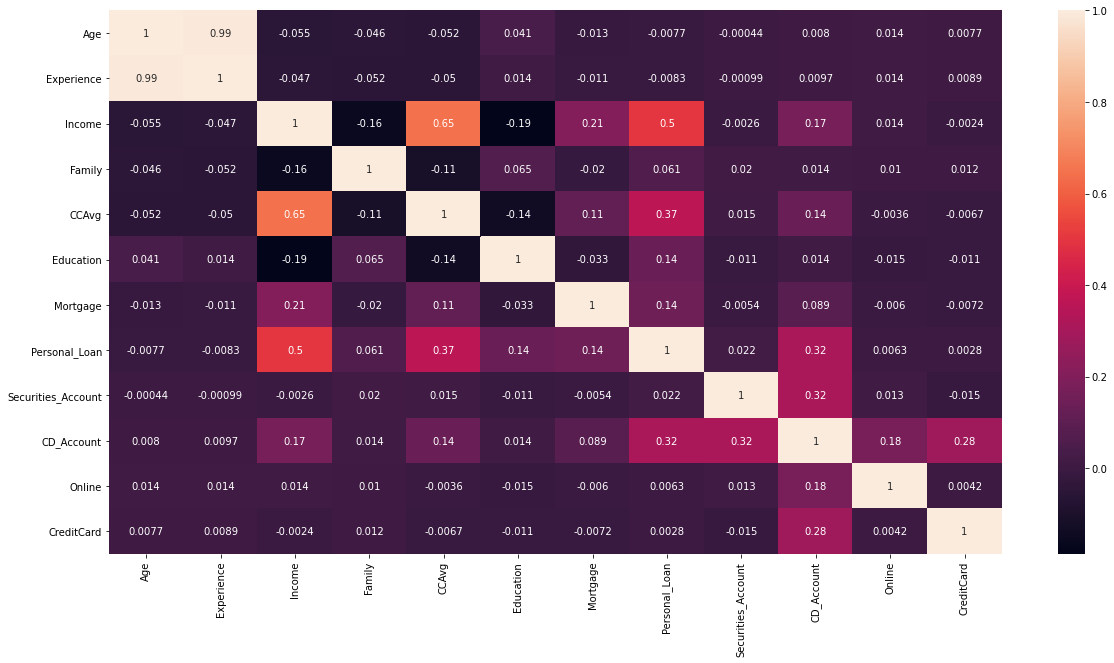

In [306]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.heatmap(corr, annot=True);

<Figure size 2160x1440 with 0 Axes>

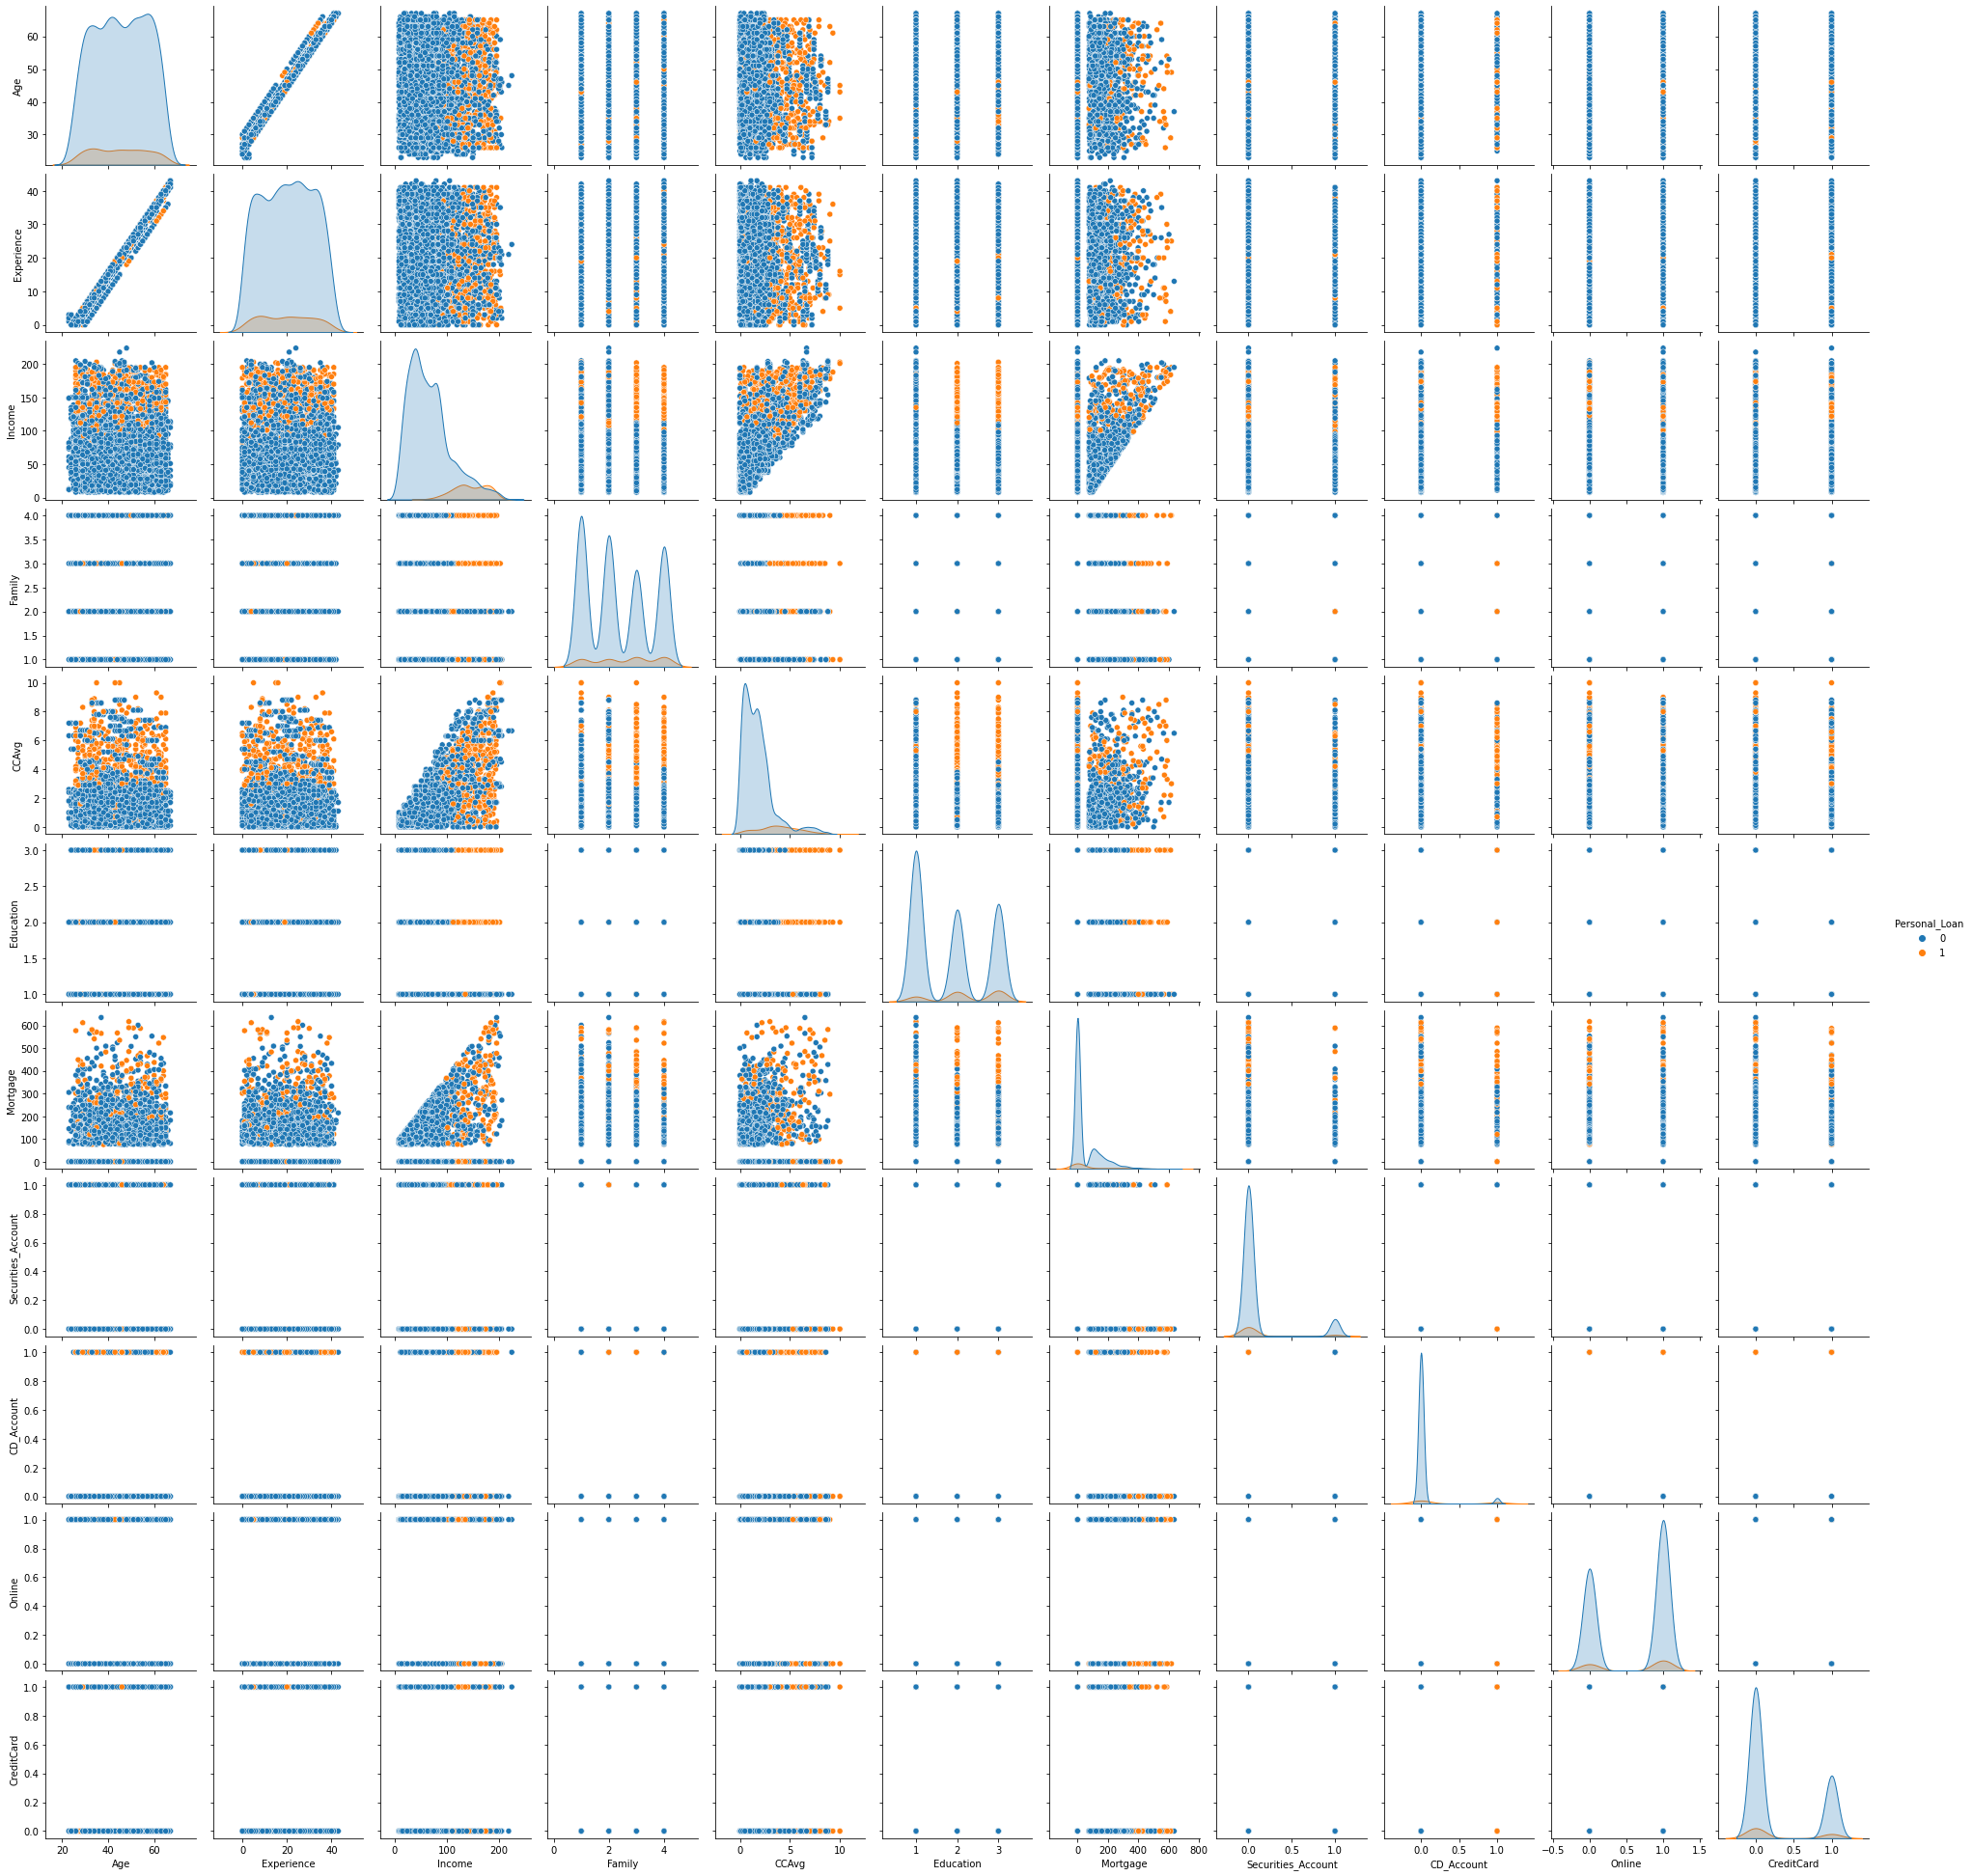

In [307]:
plt.figure(figsize=(30,20)); # Larger settings due top size of variables included

# Create a summary pairplot with target variable broken out in hue
ax=sns.pairplot(loans, hue='Personal_Loan');

### Insights

The columns are functioning as categorical (1 to 4 unique values) but left as numerical by intent can be ignored in the pairplot...

- There is a very **high correlation between a customer's Age and Experience (almost 100%)**
- **Income is noteably correlated with Mortgage and CCAvg**, indicating that the **higher a customer's income, the higher their Credit Card and/or Mortgage balances** on average
- Income also has a relatively strong correlation on Peronal_Loan, the target
    -This could indicate that **customers with higher incomes are more likely to apply for personal loans**, however further research is required
- Somewhat less obvious via earlier univariate analysis, **customers having a CD_Account has a far greater impact** on their likelihood of having a Personal Loan than having a **Securities Acocunt**
- Education and Mortgage have almost identical correlations (+-14%) to a customer's likelihood of having a Personal Loan
- **Overall, it appears that Age, Experience, Family, not/having a Securities Account, Online/Offline Banking, or having External Credit Cards, have very little correlated impact on whether or not a customer will secure a Personal Loan**

## Chi-Square to Test: Strong Correlations to Having a Personal Loan
- Income
- CCAvg
- CD_Account
- Education
- Mortgage

### Stating the Null and Alternative Hypothesis

**Null Hypothesis**

No correlation/Association between Personal Loan and Selected Variable

**Alternate hypothesis**

Significant Correlation/Association between Personal Loan and Selected Variable

In [308]:
import scipy.stats as stats # Import needed library for statistical/hypothesis testing

crosstab = pd.crosstab(loans['Income'],loans['Personal_Loan'])  # Contingency table of Income and Personal_Loan attributes

Ho = "Income has no effect on likelihood of securing Personal Loan"   # Stating the Null Hypothesis
Ha = "Income score has an effect on likelihood of securing Personal Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('p_Value: {}'.format(round(p_value,10)))
print('.' * 80)
print('')

if p_value < 0.05:  # Using Level of Significance of .05 as referenced above
    print(f'{Ha} as the p_value ({p_value.round(10)}) is less 0.05 level of significance.')
else:
    print(f'{Ho} as the p_value ({p_value.round(10)}) is greater than 0.05 level of significance.')

p_Value: 0.0
................................................................................

Income score has an effect on likelihood of securing Personal Loan as the p_value (0.0) is less 0.05 level of significance.


In [309]:
crosstab = pd.crosstab(loans['CCAvg'],loans['Personal_Loan'])  # Contingency table of CCAvg and Personal_Loan attributes

Ho = "CCAvg has no effect on likelihood of securing Personal Loan"   # Stating the Null Hypothesis
Ha = "CCAvg score has an effect on likelihood of securing Personal Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('p_Value: {}'.format(round(p_value,10)))
print('.' * 80)
print('')

if p_value < 0.05:  # Using Level of Significance of .05 as referenced above
    print(f'{Ha} as the p_value ({p_value.round(10)}) is less 0.05 level of significance.')
else:
    print(f'{Ho} as the p_value ({p_value.round(10)}) is greater than 0.05 level of significance.')

p_Value: 0.0
................................................................................

CCAvg score has an effect on likelihood of securing Personal Loan as the p_value (0.0) is less 0.05 level of significance.


In [310]:
crosstab = pd.crosstab(loans['CD_Account'],loans['Personal_Loan'])  # Contingency table of CD_Account and Personal_Loan attributes

Ho = "CD_Account has no effect on likelihood of securing Personal Loan"   # Stating the Null Hypothesis
Ha = "CD_Account score has an effect on likelihood of securing Personal Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('p_Value: {}'.format(round(p_value,10)))
print('.' * 80)
print('')

if p_value < 0.05:  # Using Level of Significance of .05 as referenced above
    print(f'{Ha} as the p_value ({p_value.round(10)}) is less 0.05 level of significance.')
else:
    print(f'{Ho} as the p_value ({p_value.round(10)}) is greater than 0.05 level of significance.')

p_Value: 0.0
................................................................................

CD_Account score has an effect on likelihood of securing Personal Loan as the p_value (0.0) is less 0.05 level of significance.


In [311]:
crosstab = pd.crosstab(loans['Education'],loans['Personal_Loan'])  # Contingency table of Education and Personal_Loan attributes

Ho = "Education has no effect on likelihood of securing Personal Loan"   # Stating the Null Hypothesis
Ha = "Education score has an effect on likelihood of securing Personal Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('p_Value: {}'.format(round(p_value,10)))
print('.' * 80)
print('')

if p_value < 0.05:  # Using Level of Significance of .05 as referenced above
    print(f'{Ha} as the p_value ({p_value.round(10)}) is less 0.05 level of significance.')
else:
    print(f'{Ho} as the p_value ({p_value.round(10)}) is greater than 0.05 level of significance.')

p_Value: 0.0
................................................................................

Education score has an effect on likelihood of securing Personal Loan as the p_value (0.0) is less 0.05 level of significance.


In [312]:
crosstab = pd.crosstab(loans['Mortgage'],loans['Personal_Loan'])  # Contingency table of Mortgage and Personal_Loan attributes

Ho = "Mortgage has no effect on likelihood of securing Personal Loan"   # Stating the Null Hypothesis
Ha = "Mortgage score has an effect on likelihood of securing Personal Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('p_Value: {}'.format(round(p_value,10)))
print('.' * 80)
print('')

if p_value < 0.05:  # Using Level of Significance of .05 as referenced above
    print(f'{Ha} as the p_value ({p_value.round(10)}) is less 0.05 level of significance.')
else:
    print(f'{Ho} as the p_value ({p_value.round(10)}) is greater than 0.05 level of significance.')

p_Value: 0.0
................................................................................

Mortgage score has an effect on likelihood of securing Personal Loan as the p_value (0.0) is less 0.05 level of significance.


## Chi-Square to Test Correlation between CCAvg and Mortgage to Customer Income

### Stating the Null and Alternative Hypothesis

**Null Hypothesis**

No correlation/Association between Customer Income and Selected Variable

**Alternate hypothesis**

Significant Correlation/Association between Customer Income and Selected Variable

In [313]:
crosstab = pd.crosstab(loans['CCAvg'],loans['Income'])  # Contingency table of CCAvg and Income attributes

Ho = "CCAvg has no effect on a customer's Income"   # Stating the Null Hypothesis
Ha = "CCAvg score has an effect on a customer's Income"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('p_Value: {}'.format(round(p_value,10)))
print('.' * 80)
print('')

if p_value < 0.05:  # Using Level of Significance of .05 as referenced above
    print(f'{Ha} as the p_value ({p_value.round(10)}) is less 0.05 level of significance.')
else:
    print(f'{Ho} as the p_value ({p_value.round(10)}) is greater than 0.05 level of significance.')

p_Value: 0.0
................................................................................

CCAvg score has an effect on a customer's Income as the p_value (0.0) is less 0.05 level of significance.


In [314]:
crosstab = pd.crosstab(loans['Mortgage'],loans['Income'])  # Contingency table of Mortgage and Income attributes

Ho = "Mortgage has no effect on a customer's Income"   # Stating the Null Hypothesis
Ha = "Mortgage score has an effect on a customer's Income"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

print('p_Value: {}'.format(round(p_value,10)))
print('.' * 80)
print('')

if p_value < 0.05:  # Using Level of Significance of .05 as referenced above
    print(f'{Ha} as the p_value ({p_value.round(10)}) is less 0.05 level of significance.')
else:
    print(f'{Ho} as the p_value ({p_value.round(10)}) is greater than 0.05 level of significance.')

p_Value: 0.0
................................................................................

Mortgage score has an effect on a customer's Income as the p_value (0.0) is less 0.05 level of significance.


### Observations
- The likelihood of a customer securing a personal loan with the bank is strongly correlated with:
    - Their Income earned
    - Average Credit Card nalance
    - Whether or not they have a CD Account
    - Their Education level
    - Their remaining Mortgage balance
- Additionally, there are **strong correlations between a customer's Income and the average balances on their Mortgages and Credit Cards**

## Multivariate Correlations to Personal Loans

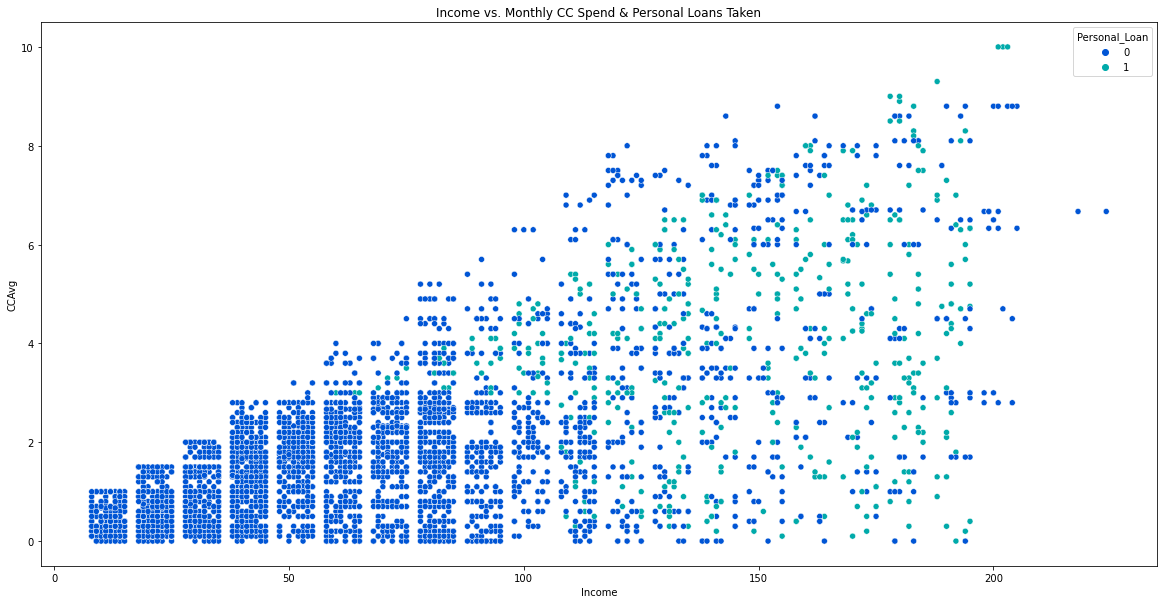

In [315]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.scatterplot(x=loans['Income'], y=loans['CCAvg'], hue=loans['Personal_Loan'], palette='winter');
plt.title('Income vs. Monthly CC Spend & Personal Loans Taken');

- There is a strong linear pattern indicating that **as income levels rise, the average monthly credit card spend grows**
    - It also appears that the likelihood of a customer **securing a personal loan is far greater in the higher income levels, around $90k or higher**
    - **Credit card balances** are not as indicative of a customer’s likelihood of taking on a Personal Loan, but **function rather as complimentary to Customer Income**

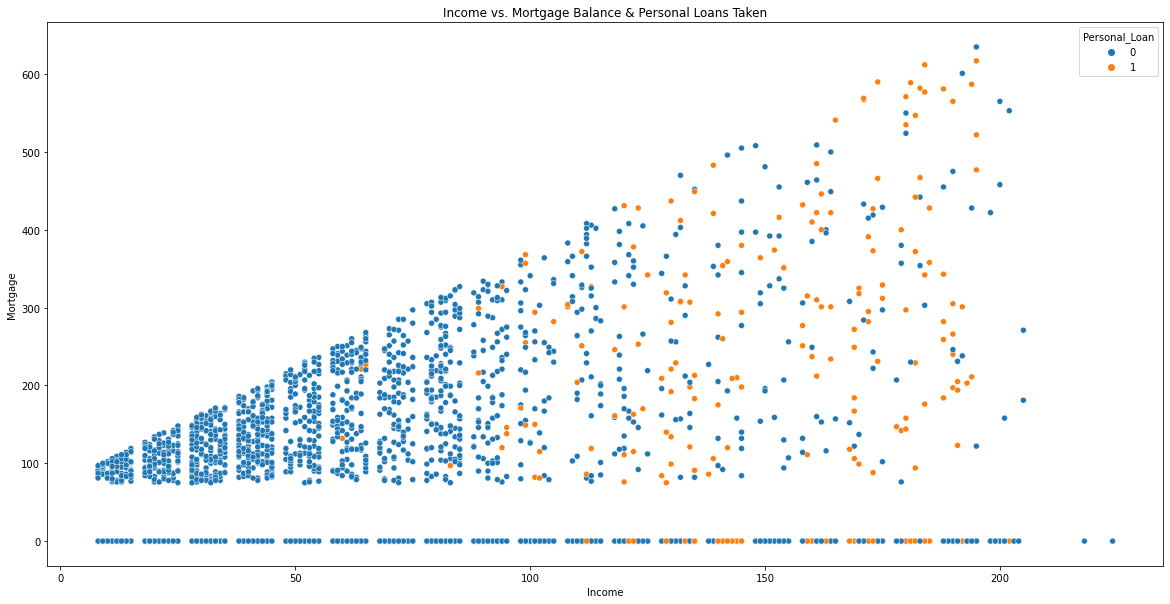

In [316]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.scatterplot(x=loans['Income'], y=loans['Mortgage'], hue=loans['Personal_Loan']);
plt.title('Income vs. Mortgage Balance & Personal Loans Taken');

 - Excluding those customers with a **mortgage balance of \\$0, due to either renting or owning their property outright**, there is a very similar trend existing **between higher incomes and higher average mortgage balances**
    - Again, it is very apparent that customer's with **higher incomes, above around \\$90k are more likely to have a personal loan** with the bank

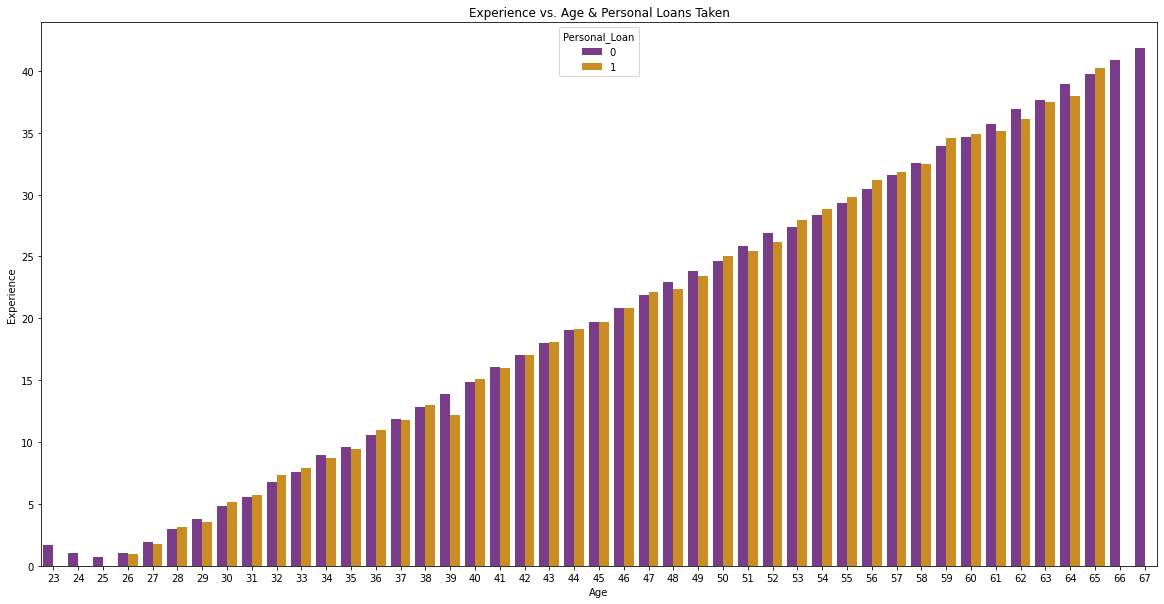

In [317]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.barplot(x='Age', y='Experience', hue='Personal_Loan', ci=None, data=loans, palette='CMRmap');
plt.title('Experience vs. Age & Personal Loans Taken');

- As shown during earlier correlation analysis, **Age and Experience are nearly perfectly correlated**
- The negative experience shown for ages 23 to 24, and the 0 Experience for age 25 most likely indicates customers still in college/yet to start their professional careers
    - As expected, those customers do not have personal loans, which would be expected if they don't have consistent income to show on their applications
- Excluding outliers, there is a relatively even split between customers having/not having a personal loan, therefore **Age and Experience don't appear to be strong influencers on likelihood of securing a Personal Loan**

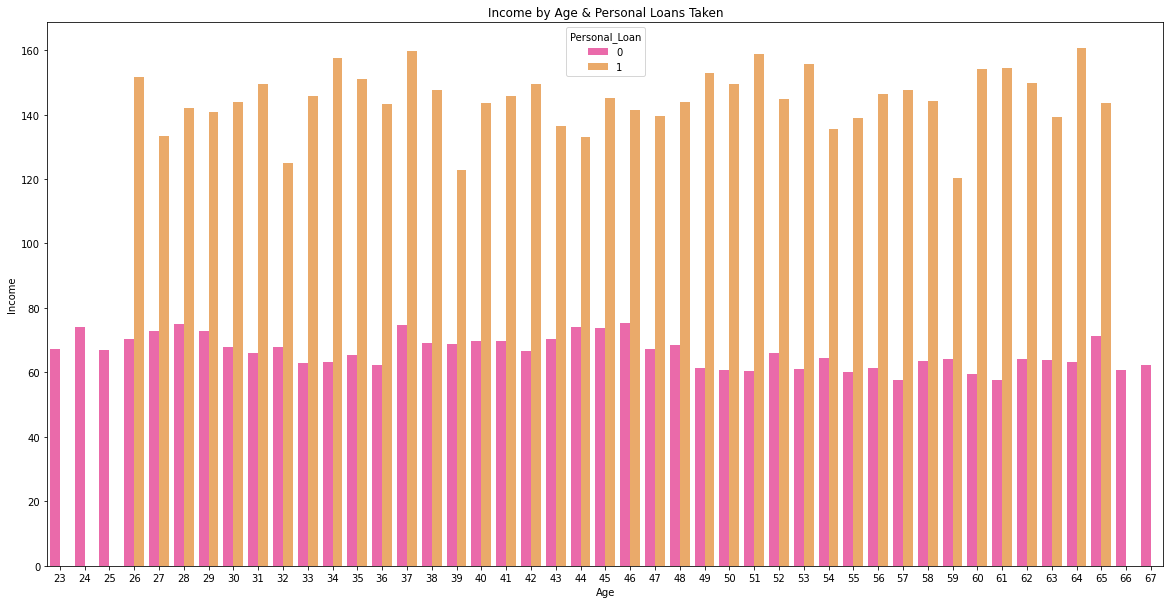

In [318]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.barplot(x='Age', y='Income', hue='Personal_Loan', ci=None, data=loans, palette='spring');
plt.title('Income by Age & Personal Loans Taken');

- Personal Loans appear to be taken across all ages in the range of 26, young professional, through 65, nearing-retirement/retired professionals
- **Personal Loans are most likely to be taken by customers earning above \\$70k**

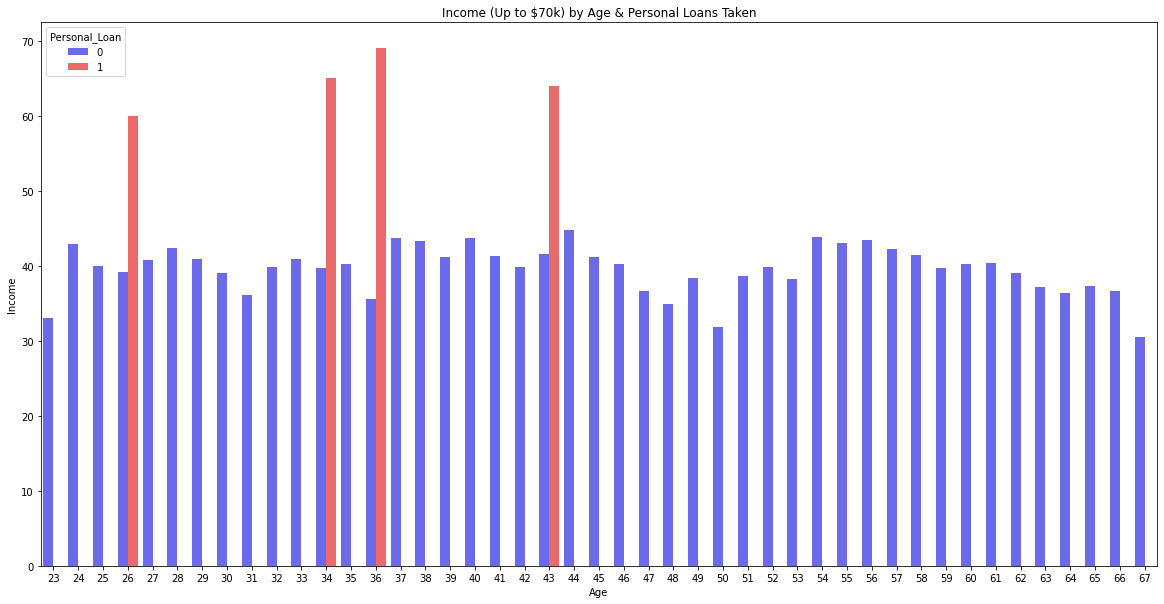

In [319]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.barplot(x='Age', y=loans['Income'][loans['Income']<=70], hue='Personal_Loan', ci=None, data=loans, palette='seismic');
plt.title('Income (Up to $70k) by Age & Personal Loans Taken');

In [320]:
loans['Personal_Loan'].value_counts() # Count value of all customers taking/not taking a Personal Loan

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [321]:
# Count value of all customers making $70k or less taking/not taking a Personal Loan

loans['Personal_Loan'][loans['Income'][loans['Income']<=70]].value_counts() 

0    2374
1     364
Name: Personal_Loan, dtype: int64

- As mentioned above, there is **less likelihood of customers making \\$70k or less in income securing a personal loan**
    - What is interesting is that the **proportionality of loans taken are slighlty higher in the \\$70k or less grouping than the overall sample dataset (15% vs. 10% respectively)**

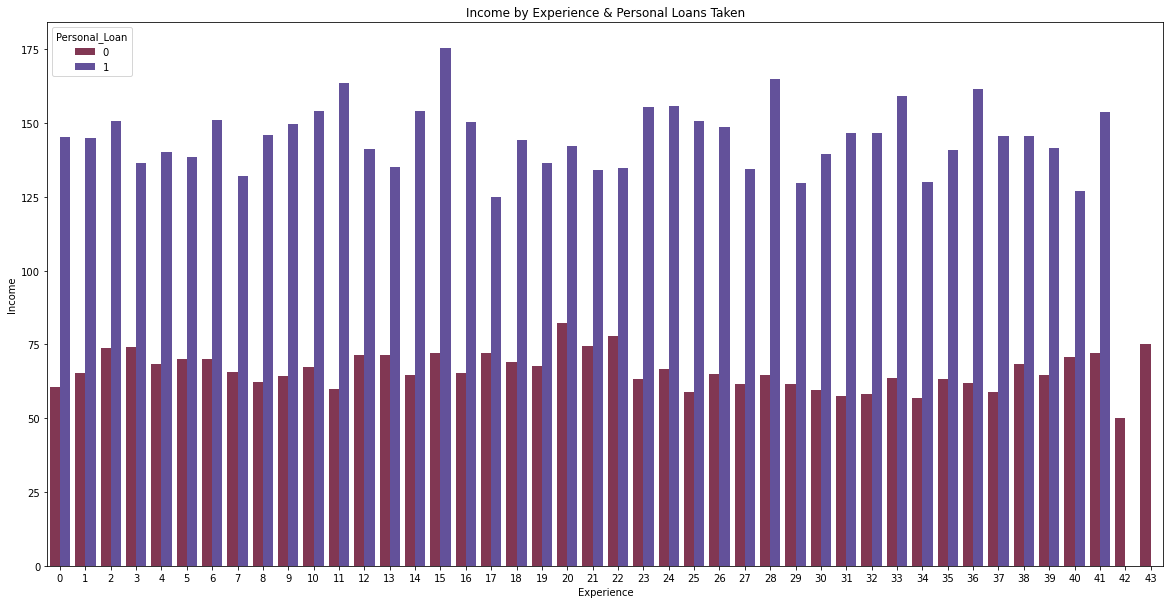

In [322]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.barplot(x='Experience', y='Income', hue='Personal_Loan', ci=None, data=loans, palette='twilight_r');
plt.title('Income by Experience & Personal Loans Taken');

- Similar to Age, Personal Loans appear to be taken across all experience levels in the range of 0, young professional, through 41, nearing-retirement/retired professionals
- **Personal Loans are most likely to be taken by customers earning above \\$70k**

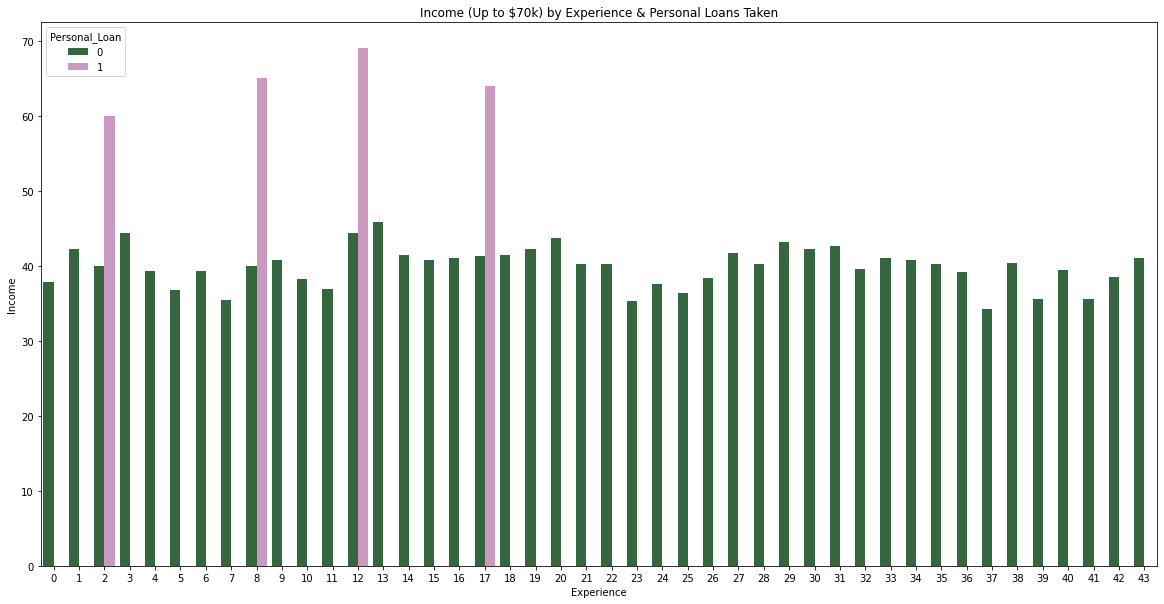

In [323]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.barplot(x='Experience', y=loans['Income'][loans['Income']<=70], hue='Personal_Loan', ci=None, data=loans, palette='cubehelix');
plt.title('Income (Up to $70k) by Experience & Personal Loans Taken');

- As mentioned above and nearly identical to the summary by Age, **there is less likelihood of customers making $70k or less in income securing a personal loan**

In [324]:
# Split the dataset into 2 sections: Target Variable and All Others

X = loans.drop(["Personal_Loan"], axis=1)
y = loans["Personal_Loan"]

In [325]:
X = pd.get_dummies(X, drop_first=True) # Encode all categorical variables and examine the top 5 rows
X.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  ...  County_Santa Cruz County  \
0                   1           0       0  ...                         0   
1                   1           0       0  ...                         0   
2                   0           0       0  ...                         0   
3                   0           0       0  ...                         0   
4                   0           0       0  ...                         0   

   County_Shasta County  County_Siskiyou County  County_Solano County  \
0                     0                       0                     0   
1                     0                       0                     0   
2                     0                       0                     0   
3                     0                       0                     0   
4                     0                       0                     0   

   County_Sonoma County  County_Stanislaus County  County_Trinity County  \
0                     0                         0                      0   
1                     0                         0                      0   
2                     0                         0                      0   
3                     0                         0                      0   
4                     0                         0                      0   

   County_Tuolumne County  County_Ventura County  County_Yolo County  
0                       0                      0                   0  
1                       0                      0                   0  
2                       0                      0                   0  
3                       0                      0                   0  
4                       0                      0                   0  

[5 rows x 49 columns]

- Since all columns, excluding County, were left as numeric, there was no need to encode any of them back to numeric
- 37 additional County columns (drop first) have been added to the dataset as numeric (either 0 or 1)

In [326]:
# Create 2 train and 2 test (x,y) sections with consistent random state applied (use 1, but can be any #)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=1)

In [327]:
# Print a summary of the rows/columns of each Test/Train split

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 49)
(1500, 49)
(3500,)
(1500,)


## Logistic Regression, Decision Tree Model, Criterion, and Weighting
- The model will initially be using the **Gini Impurity criteria for splitting the data**
- Since the **current proportions of customer Personal Loan usage are roughly 90% No and 10% Yes**, a class weighting is applied inversely to better address the unequal proportions and **prevent the Decision Tree from becoming biased towards the dominant class (Personal Loan = No/0)**
- Class Weight is a key hyperparameter for accurate Decision Tree Modeling

## Creating the Confusion Matrix

In [328]:
# Build a Confusion Matrix with a user-defined function

def Confusion_Matrix(Model,y_actual,labels=[1, 0]): # Labels for Model: Securing (1) / Not Securing (0) Personal Loan
    '''
    Model : Decision Tree Classifier to Predict x Values
    y_actual : Ground Truth or Actual values of Label (y)
    
    '''
    y_predict = Model.predict(X_test) # Create predicted Target (y) values based on Model test data
    
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0]) # Actual Labels: Securing (1) / Not Securing (0) Personal Loan
    
    # Build a 2x2 dataframe using for loop, building rows first then columns    
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes","Actual - No"]],
                  columns = [i for i in ['Predicted - Yes','Predicted - No']]) 
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()] # Flatten the Confusion Matrix into 1 dimension 
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)] # Include percentages for each row/column split
    
    # Create labels for aggregated count by Matrix quadrant and respective % and reshape into 2x2 Matrix size
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)] # 
    labels = np.asarray(labels).reshape(2,2)  
    
    plt.figure(figsize = (20,10)) # Setting plot size - This size will be assumed for each plot unless otherwise stated
    sns.heatmap(df_cm, annot=labels,fmt='') # Use HeatMap format for Confusion Matrix 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [329]:
# Fit the model on Training Data
RegModel = LogisticRegression(solver="liblinear") # Solver moves towards minimum value, one direction at a time
RegModel.fit(X_train, y_train)

# Make predictions for target (y) with model on Test (X) Data
y_predict = RegModel.predict(X_test)

# Calculate and print out all Model Coefficients as well as the Intercept value
Coef_df = pd.DataFrame(RegModel.coef_)
Coef_df['intercept'] = RegModel.intercept_
print(Coef_df) 

          0         1         2         3         4         5        6  \
0 -0.392099  0.391766  0.049476  0.656276  0.161277  1.623938  0.00083   

          7         8         9  ...        40        41        42        43  \
0 -0.921775  3.262955 -0.619233  ... -0.194189 -0.046205  0.299782  0.539212   

         44        45        46        47        48  intercept  
0 -0.236801 -0.133935 -0.213672  0.057668 -0.571769  -2.552689  

[1 rows x 50 columns]


In [330]:
RegModel_Score = RegModel.score(X_train, y_train)
print('Regression Model Accuracy Score on Training Data:',round(RegModel_Score,3))

Regression Model Accuracy Score on Training Data: 0.956


In [331]:
RegModel_Score = RegModel.score(X_test, y_test)
print('Regression Model Accuracy Score on Testing Data:',round(RegModel_Score,3))

Regression Model Accuracy Score on Testing Data: 0.944


**The model scored well on both the Training and Testing datasets**.

Since it is not just the accuracy of the model that is important but rather **how it performs against specific (weighted) business needs**, the following should also be considered:

- **Precision:** How many of the customers predicted to take on a Personal Loan actually did?
    - True Positives / (True Positive + False Positives)
    
- **Recall (Sensitivity):** Of all the customers that did take on a Personal Loan, how many did the model predict would?
    - True Positive / (True Positives + False Negatives) 
    
- **F1-Score (Combo of Precision & Recall/Sensitivity):** What is the Mean split between the Precision and Recall results? 
    - 2 * (Recall * Precision) / (Recall + Precision)
    
- **Specificity:** Of all the customers that did not secure a Personal Loan with the bank, how many did the model predict wouldn't?
    - True Negative / True Negatives + True Positives 

#### Precision Score

In [332]:
#  Function to calculate Precision using Metrics library

def Precision_Score(Model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = Model.predict(X_train)
    pred_test = Model.predict(X_test)
    print("Precision Score on training set : ",round(metrics.precision_score(y_train,pred_train),3))
    print("Precision Score on test set : ",round(metrics.precision_score(y_test,pred_test),3))

In [333]:
Precision_Score(RegModel)

Precision Score on training set :  0.853
Precision Score on test set :  0.828


- The **Precision score of .83 is a relatively strong score and indicates that 83 of every 100 customers (Predicted Only)**, within the testing dataset, **who were predicted to take on a Personal Loan actually did**
    - It may be possible to boost the model performance through the examination and removal of variables experiencing multicollinearity
    - Further analysis through VIF testing should be performed

#### Recall Score

In [334]:
#  Function to calculate Recall using Metrics library

def Recall_Score(Model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = Model.predict(X_train)
    pred_test = Model.predict(X_test)
    print("Recall on training set : ",round(metrics.recall_score(y_train,pred_train),3))
    print("Recall on test set : ",round(metrics.recall_score(y_test,pred_test),3))

In [335]:
Recall_Score(RegModel)

Recall on training set :  0.647
Recall on test set :  0.55


- The **Recall/Sensitivity score of .55 is a weak score and indicates that only 55 of every 100 customers (Predicted & Actual)**, within the testing dataset, **who were predicted to take on a Personal Loan actually did**
    - Since this is much lower than the Precsion score, it is **indicative of a large set of customers not predicted to take on a Personal Loan who actually did**
    - Luckily, the objective is focused on the Precision score, which scored very high in the model

#### F1 Score Score

In [336]:
#  Function to calculate F1 Score using Metrics library

def F1_Score(Model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = Model.predict(X_train)
    pred_test = Model.predict(X_test)
    print("F1 Score on training set : ",round(metrics.f1_score(y_train,pred_train),3))
    print("F1 Score on test set : ",round(metrics.f1_score(y_test,pred_test),3))

In [337]:
F1_Score(RegModel)

F1 Score on training set :  0.735
F1 Score on test set :  0.661


- The **F1 score of .66 is a blended score of Precision and Recall and splits the difference between both score results** for accurately predicted customers taking on a Personal Loan (Predicted & Actual) within the testing dataset
    - It is somewhat lower due to the very low Recall score in the data above
    - Luckily, the objective is focused on the Precision score, which scored very high in the model

#### Specificity Score

In [338]:
# Build custom function for Specificity Score (not available in Metrics library)

def Specificity_Score(Model):

    ypredtrain = Model.predict(X_train)
    cmtrain = confusion_matrix(y_train, ypredtrain)
    specificitytrain = cmtrain[0,0]/(cmtrain[0,0]+cmtrain[1,0])

    ypredtest = Model.predict(X_test)
    cmtest = confusion_matrix(y_test, ypredtest)
    specificitytest = cmtest[0,0]/(cmtest[0,0]+cmtest[1,0])

    print("Specificity on training set : ",round(specificitytrain,3))
    print("Specificity on test set : ",round(specificitytest,3))

In [339]:
Specificity_Score(RegModel)

Specificity on training set :  0.964
Specificity on test set :  0.952


The very high **Specificity score of .95 indicates that 95 of every 100 customers (Predicted & Actual)**, within the testing dataset, **who were predicted to not take on a Personal Loan actually did not do so**.

#### Confusion Matrix Summary

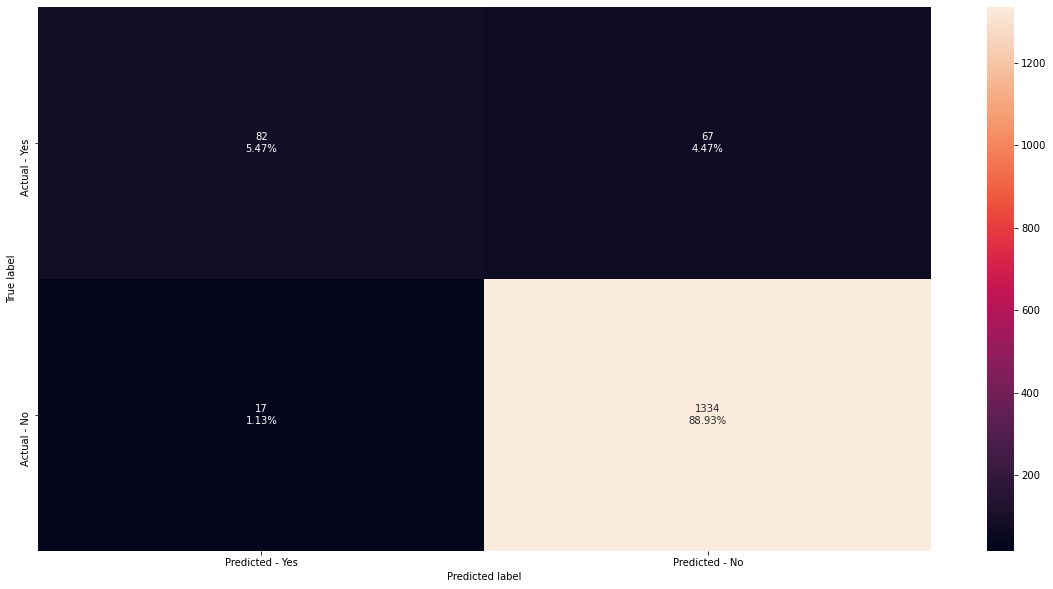

In [340]:
Confusion_Matrix(RegModel,y_test)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer secured a Personal Loan with the bank
- **Model predicted:** Customer will secure a Personal Loan
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**5.53%**)

#### True Negatives:
- **Reality:** Customer did not secure a Personal Loan with the bank
- **Model predicted:** Customer won't secure a Personal Loan
- **Outcome:** No affect on business goal of increasing Personal Loan revenue (**88.93%**)

#### False Positives:
- **Reality:** Customer did not secure a Personal Loan with the bank
- **Model predicted:** Customer will secure a Personal Loan
- **Outcome:** The attempts to target these potential customers are wasted and cost the bank time/money as a result (**1.13%**)

#### False Negatives:
- **Reality:** Customer secured a Personal Loan with the bank
- **Model predicted:** Customer won't secure a Personal Loan
- **Outcome:** Customers may feel lack of loyalty or appreciation from the bank which could make them pursue other companies for credit products (**4.40%**)

### Check for MultiCollinearity (Logistic Regression

In [341]:
# Convert all column datatypes to numeric and create a copy for testing VIF scores

X_train_v1 = X_train.astype(float).copy()

In [342]:
# Examine the initial model (copy) VIF scores - looking for anything scoring over 5, highest removed first

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X_train_v1.values,i) for i in range(X_train_v1.shape[1])],index=X_train_v1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Age                              420.091697
Experience                       112.608928
Income                             6.659201
Family                             5.566566
CCAvg                              3.946142
Education                          6.692349
Mortgage                           1.389749
Securities_Account                 1.290428
CD_Account                         1.457675
Online                             2.574033
CreditCard                         1.594931
County_Alameda County             12.013508
County_Butte County                1.404622
County_Contra Costa County         2.705347
County_El Dorado County            1.325831
County_Fresno County               1.397822
County_Humboldt County             1.730962
County_Imperial County             1.056486
County_Kern County                 2.138013
County_Lake County                 1.086985
County_Los Angeles County         24.048773
County_Marin County                2.0629

- Age has a very high VIF score, followed by Experience, which often aligns closely to Age.
- Customer Income, Family Size, and Education also have scores above the usual 5.0 threshold

In [343]:
# Remove highest variable then examine the updated model VIF scores - looking for anything scoring over 5, highest removed first

X_train_v2 = X_train_v1.drop('Age',axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train_v2.values,i) for i in range(X_train_v2.shape[1])],index=X_train_v2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Experience                       4.114439
Income                           6.614934
Family                           5.417953
CCAvg                            3.933977
Education                        6.084708
Mortgage                         1.389615
Securities_Account               1.282108
CD_Account                       1.441029
Online                           2.543690
CreditCard                       1.584817
County_Alameda County            2.948894
County_Butte County              1.079311
County_Contra Costa County       1.301305
County_El Dorado County          1.056036
County_Fresno County             1.075725
County_Humboldt County           1.124767
County_Imperial County           1.014625
County_Kern County               1.203083
County_Lake County               1.015715
County_Los Angeles County        5.173904
County_Marin County              1.212153
County_Mendocino County          1.047107
County_Merced County             1.012912

**The removal of the Age variable has substantially improved the multicollinarity** scores for the dataset, with Income just slightly over the threshold of 5.  **Income may be an important variable and not easily removed without severly impacting the model performance**.

#### Statistical Summary
- Now the multicollinearity has been addressed, it is worth examinging the **Statistical Summary Model and possibly removing any variables with a p-Value greater than .05**, incrementally with the highest p-Value first
    - Variables cannot be removed **if having had One-Hot Encoding performed, unless the entire column set is removed**

In [344]:
# Run the Statistical Summary for temporarily modified X training set 2 to locate variables with p-Values over 0.05 for removal

# X = sm.add_constant(X)
# X_train_v2, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=1
# )

olsmod0 = sm.OLS(y_train, X_train_v2)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                                 OLS Regression Results                                
Dep. Variable:          Personal_Loan   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.439
Method:                 Least Squares   F-statistic:                              58.12
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        17:18:43   Log-Likelihood:                          197.50
No. Observations:                3500   AIC:                                     -299.0
Df Residuals:                    3452   BIC:                                     -3.288
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

Since any of the County variables cannot be removed without removing the entire lot (whole encoded column), **the next variable worth removing, so as to improve model scoring, is Experience, with a p-Value of 0.789**.

In [345]:
# Re-examine the updated model VIF scores - looking for anything scoring over 5, highest removed first

X_train_v3 = X_train_v2.drop('Experience',axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train_v3.values,i) for i in range(X_train_v3.shape[1])],index=X_train_v3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Income                           6.614191
Family                           5.411349
CCAvg                            3.929335
Education                        6.080616
Mortgage                         1.389582
Securities_Account               1.282107
CD_Account                       1.440711
Online                           2.542369
CreditCard                       1.583822
County_Alameda County            2.623781
County_Butte County              1.061650
County_Contra Costa County       1.258043
County_El Dorado County          1.046548
County_Fresno County             1.063624
County_Humboldt County           1.102837
County_Imperial County           1.011919
County_Kern County               1.168869
County_Lake County               1.012318
County_Los Angeles County        4.405576
County_Marin County              1.171895
County_Mendocino County          1.038719
County_Merced County             1.012233
County_Monterey County           1.415831

All variables have a **low VIF score, under 5 excluding Income with is a key variable**.

In [346]:
# Rerun the Statistical Summary for temporarily modified X training set 3 to locate variables with p-Values over 0.05 for removal

olsmod1 = sm.OLS(y_train, X_train_v3)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                                 OLS Regression Results                                
Dep. Variable:          Personal_Loan   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.439
Method:                 Least Squares   F-statistic:                              59.37
Date:                Mon, 21 Jun 2021   Prob (F-statistic):                        0.00
Time:                        17:18:44   Log-Likelihood:                          197.46
No. Observations:                3500   AIC:                                     -300.9
Df Residuals:                    3453   BIC:                                     -11.38
Df Model:                          47                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

**All variables**, excluding Counties which cannot be removed due to One-Hot Encoding, **are well under the p-Value threshold of 0.05**.

### Update Regression Model: Reduced Variables/Coefficients

In [347]:
# Create initial copies of the original X Train & Test data
X2 = X.copy()

In [420]:
X2

Experience  Income  Family  CCAvg  Education  Securities_Account  \
0              1      49       4    1.6          1                   1   
1             19      34       3    1.5          1                   1   
2             15      11       1    1.0          1                   0   
3              9     100       1    2.7          2                   0   
4              8      45       4    1.0          2                   0   
...          ...     ...     ...    ...        ...                 ...   
4995           3      40       1    1.9          3                   0   
4996           4      15       4    0.4          1                   0   
4997          39      24       2    0.3          3                   0   
4998          40      49       3    0.5          2                   0   
4999           4      83       3    0.8          1                   0   

      CD_Account  Online  CreditCard  County_Alameda County  ...  \
0              0       0           0                      0  ...   
1              0       0           0                      0  ...   
2              0       0           0                      1  ...   
3              0       0           0                      0  ...   
4              0       0           1                      0  ...   
...          ...     ...         ...                    ...  ...   
4995           0       1           0                      0  ...   
4996           0       1           0                      0  ...   
4997           0       0           0                      0  ...   
4998           0       1           0                      0  ...   
4999           0       1           1                      0  ...   

      County_Santa Cruz County  County_Shasta County  County_Siskiyou County  \
0                            0                     0                       0   
1                            0                     0                       0   
2                            0                     0                       0   
3                            0                     0                       0   
4                            0                     0                       0   
...                        ...                   ...                     ...   
4995                         0                     0                       0   
4996                         0                     0                       0   
4997                         0                     0                       0   
4998                         0                     0                       0   
4999                         0                     0                       0   

      County_Solano County  County_Sonoma County  County_Stanislaus County  \
0                        0                     0                         0   
1                        0                     0                         0   
2                        0                     0                         0   
3                        0                     0                         0   
4                        0                     0                         0   
...                    ...                   ...                       ...   
4995                     0                     0                         0   
4996                     0                     0                         0   
4997                     0                     0                         0   
4998                     0                     0                         0   
4999                     0                     0                         0   

      County_Trinity County  County_Tuolumne County  County_Ventura County  \
0                         0                       0                      0   
1                         0                       0                      0   
2                         0                       0                      0   
3                         0                       0                      0   
4           

In [348]:
# Drop Age and Mortgate from both X datasets to match the VIF and Stats Summary changes reviewed above
X2.drop(columns=['Age','Mortgage'],axis=1, inplace=True)

In [423]:
X_train_Final, X_test_Final, y_train, y_test = train_test_split(X2,y, test_size=.3, random_state=1)

In [424]:
# Print another summary of the rows/columns of each Test/Train split - Should be 47 columns as Age was removed

print(X_train_Final.shape)
print(X_test_Final.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 9)
(1500, 9)
(3500, 1)
(1500, 1)


In [425]:
# Fit the model on Training Data
RegModel1 = LogisticRegression(solver="liblinear") # Solver moves towards minimum value, one direction at a time
RegModel1.fit(X_train_Final, y_train)

# Make predictions for target (y) with model on Test (X) Data
y_predict = RegModel1.predict(X_test_Final)

# Calculate and print out all Model Coefficients as well as the Intercept value
Coef_df1 = pd.DataFrame(RegModel1.coef_)
Coef_df1['intercept'] = RegModel1.intercept_
print(Coef_df1) 

          0         1         2         3         4         5         6  \
0 -0.007862  0.040867  0.460007  0.133254  1.175317 -0.917494  3.159594   

          7         8  intercept  
0 -0.613665 -1.028144  -9.771549  


In [428]:
# Build Confusion Matrix for updated Regression Model using User defined function

def Confusion_Matrix(Model,y_actual,labels=[1, 0]): # Labels for Model: Securing (1) / Not Securing (0) Personal Loan
    '''
    Model : Decision Tree Classifier to Predict x Values
    y_actual : Ground Truth or Actual values of Label (y)
    
    '''
    y_predict = Model.predict(X_test_Final) # Create predicted Target (y) values based on Model test data
    
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0]) # Actual Labels: Securing (1) / Not Securing (0) Personal Loan
    
    # Build a 2x2 dataframe using for loop, building rows first then columns    
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes","Actual - No"]],
                  columns = [i for i in ['Predicted - Yes','Predicted - No']]) 
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()] # Flatten the Confusion Matrix into 1 dimension 
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)] # Include percentages for each row/column split
    
    # Create labels for aggregated count by Matrix quadrant and respective % and reshape into 2x2 Matrix size
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)] # 
    labels = np.asarray(labels).reshape(2,2)  
    
    plt.figure(figsize = (20,10)) # Setting plot size - This size will be assumed for each plot unless otherwise stated
    sns.heatmap(df_cm, annot=labels,fmt='') # Use HeatMap format for Confusion Matrix 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

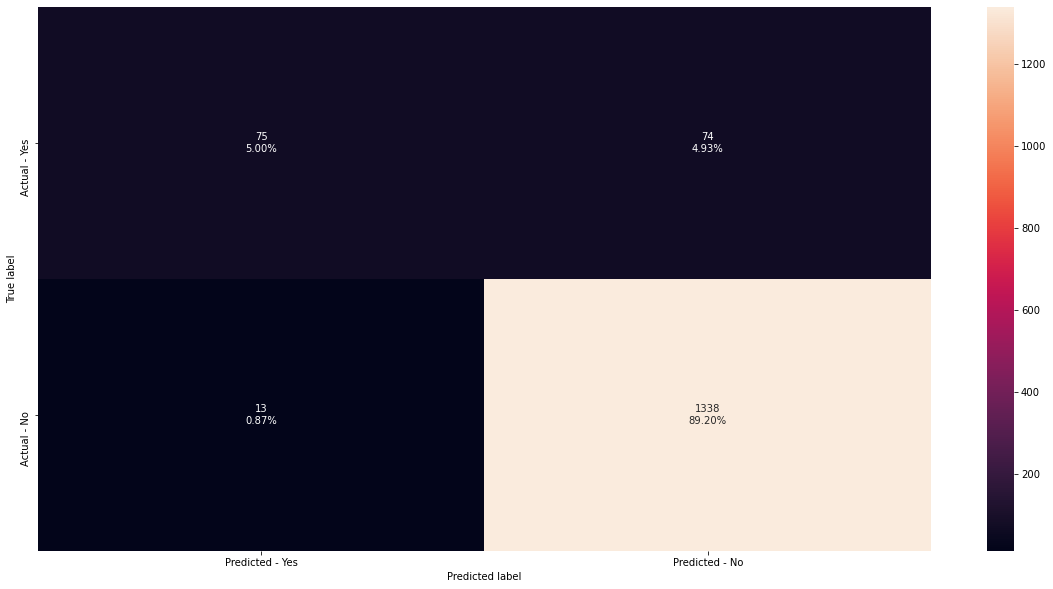

In [429]:
Confusion_Matrix(RegModel1,y_test)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer secured a Personal Loan with the bank
- **Model predicted:** Customer will secure a Personal Loan
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**5.07%**)

#### True Negatives:
- **Reality:** Customer did not secure a Personal Loan with the bank
- **Model predicted:** Customer won't secure a Personal Loan
- **Outcome:** No affect on business goal of increasing Personal Loan revenue (**89.13%**)

#### False Positives:
- **Reality:** Customer did not secure a Personal Loan with the bank
- **Model predicted:** Customer will secure a Personal Loan
- **Outcome:** The attempts to target these potential customers are wasted and cost the bank time/money as a result (**0.93%**)

#### False Negatives:
- **Reality:** Customer secured a Personal Loan with the bank
- **Model predicted:** Customer won't secure a Personal Loan
- **Outcome:** Customers may feel lack of loyalty or appreciation from the bank which could make them pursue other companies for credit products (**4.87%**)

### Variance to Original Regression Model
- The updated model may have scored slightly lower on the **True Positives scale (5.07% vs. 5.53%)**, however improved in the **False Positives (4.87% vs. 4.40%)**
- The overall result is a slightly **better Precision score in the test data, which was the primary goal in this process**

### Recheck Accuracy & Precision Scores

In [430]:
RegModel1_Score = RegModel1.score(X_train_Final, y_train)
print('Regression Model Accuracy Score on Training Data:',round(RegModel1_Score,3))

Regression Model Accuracy Score on Training Data: 0.951


In [431]:
RegModel1_Score = RegModel1.score(X_test_Final, y_test)
print('Regression Model Accuracy Score on Testing Data:',round(RegModel1_Score,3))

Regression Model Accuracy Score on Testing Data: 0.942


In [432]:
#  Recalculate Precision using Metrics library

def Precision_Score(Model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = Model.predict(X_train_Final)
    pred_test = Model.predict(X_test_Final)
    print("Precision Score on training set : ",round(metrics.precision_score(y_train,pred_train),3))
    print("Precision Score on test set : ",round(metrics.precision_score(y_test,pred_test),3))

In [433]:
Precision_Score(RegModel1)

Precision Score on training set :  0.841
Precision Score on test set :  0.852


### Results

In [360]:
# Create a summary dataframe detailing the Original vs. Final (Adjusted) Logistic Regression Model results: Accuracy/Precision

LogReg_Summary = pd.DataFrame({'Model':['Initial Logistic Regression Model',
                                      'Logistic Regression Model: VIF/p-Value Tuning',
                                      ],
                             
                             'Train_Accuracy':[0.956,0.953], 'Test_Accuracy':[0.944,0.943],
                             'Train_Precision':[0.850,0.859], 'Test_Precision':[0.828,0.846]})

LogReg_Summary

Model  Train_Accuracy  \
0              Initial Logistic Regression Model           0.956   
1  Logistic Regression Model: VIF/p-Value Tuning           0.953   

   Test_Accuracy  Train_Precision  Test_Precision  
0          0.944            0.850           0.828  
1          0.943            0.859           0.846

**Dropping the Age and Mortgage variables** from the Logistic Regression model **only slightly reduced the Accuracy scores (0.003 and 0.001) on the Test and Train data**, however it **increased the Precision Scores to 0.86 and 0.85 respectively**.

In [440]:
X_train_Final = X_train_Final[X_train_Final.columns.drop(list(X_train_Final.filter(regex='County')))]

In [445]:
logit = sm.Logit(y_train, X_train_Final.astype(float))
lg_Final = logit.fit(warn_convergence =False)

Optimization terminated successfully.
         Current function value: 0.255074
         Iterations 8


#### ROC - Area Under Curve: Train Data

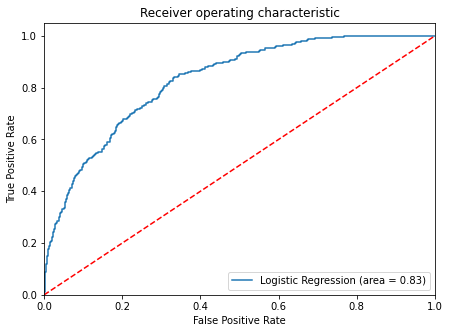

In [450]:
logit_roc_auc_train = roc_auc_score(y_train, lg_Final.predict(X_train_Final))
fpr, tpr, thresholds = roc_curve(y_train, lg_Final.predict(X_train_Final))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### ROC - Area Under Curve: Test Data

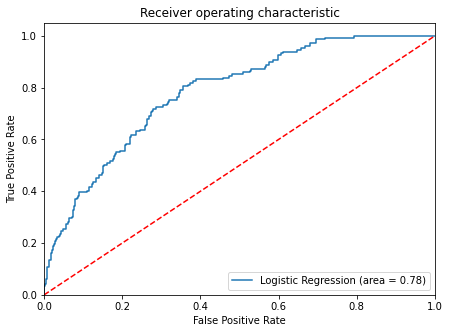

In [449]:
logit_roc_auc_test = roc_auc_score(y_test, lg_Final.predict(X_test_Final))
fpr, tpr, thresholds = roc_curve(y_test, lg_Final.predict(X_test_Final))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- Logistic Regression model is giving a generalized performance on training and test set
- ROC-AUC score of 0.83 and 0.78 on training and test set is ok but not great

### Coefficient interpretations

* Coefficients of Income, Family, CCAvg, CD_Account and Education are positive an increase in these will lead to increase in chances of taking a personal loan.
* Coefficients of Securities_Account,CreditCard, and Online are negative increase in these will lead to decrease in chances of taking a personal loan.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [452]:
odds = np.exp(lg_Final.params) # converting coefficients to odds
pd.set_option('display.max_columns',None)  # removing limit from number of columns to display
pd.DataFrame(odds, X_train_Final.columns, columns=['odds']).T # adding the odds to a dataframe

Experience    Income    Family     CCAvg  Education  Securities_Account  \
odds    0.934746  1.013651  0.675567  1.071894   0.771905            0.147927   

      CD_Account    Online  CreditCard  
odds  110.302925  0.239226    0.164401

#### Percentage change in odds

In [453]:
perc_change_odds = (np.exp(lg_Final.params)-1)*100 # finding the percentage change
pd.set_option('display.max_columns',None) # removing limit from number of columns to display
pd.DataFrame(perc_change_odds, X_train_Final.columns, columns=['change_odds%']).T # adding the change_odds% to a dataframe

Experience    Income     Family     CCAvg  Education  \
change_odds%   -6.525425  1.365061 -32.443347  7.189372 -22.809516   

              Securities_Account    CD_Account     Online  CreditCard  
change_odds%          -85.207257  10930.292548 -76.077362  -83.559928

### Coefficient interpretations

* Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 1.06 times or a 6.1% increase in the odds of a customer taking personal loan.
* Family: Holding all other features constant a 1 unit change in Family will increase the odds of a customer taking a personal loan by 1.91 times or a 91.25% increase in the odds of a customer taking personal loan.
* CCAvg: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer taking a personal loan by 1.22 times or a 22.16% increase in the odds of a customer taking personal loan.
* Securities_Account: The odds of a customer who has a Securities Account taking a personal loan are 0.31 times less than a person who doesn't have a securities account or a 68.23% fewer odds of a customer taking personal loan.
* Online: The odds of a customer who prefers internet banking facilities taking a personal loan is 0.51 times less than a customer who doesn't prefer internet banking facilities or a 48.5% fewer odds than the customer who doesn't use internet banking facilities
* Education and CD_Account have greater coefficients, so small changes in their value will have a bigger change in chances of taking a personal loan.


`Interpretation for other attributes can be done similarly.`

### Optimal threshold using AUC-ROC curve

In [454]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg_Final.predict(X_test_Final))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07129020797712886


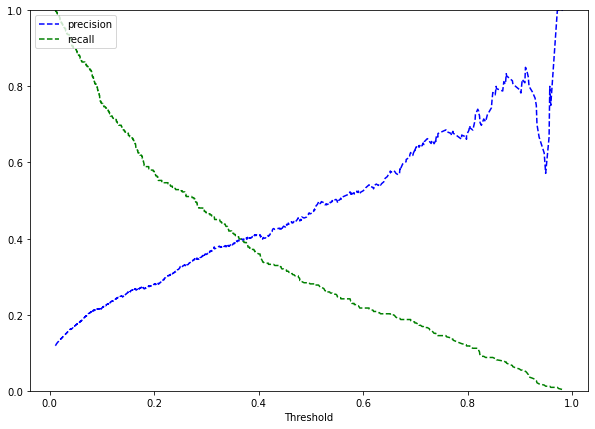

In [460]:
y_scores=lg_Final.predict(X_train_Final)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

## Decision Tree Model/s

In [361]:
# Use Gini Impurity or Entropy, keeping random state still = 1

# Setting a class weighting to account for and reverse the approximate 90/10 split between Personal Loan=No (0) and = Yes (1)
Model = DecisionTreeClassifier(criterion='gini', class_weight={0:0.10,1:0.90}, random_state=1) 
Model.fit(X_train, y_train) # Fit the model with training data only (x and y)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

In [362]:
# Calculate the Accuracy score for training & testing sets

print("Train set accuracy: ", round(Model.score(X_train,y_train),3))

print("Test set accuracy: ", round(Model.score(X_test,y_test),3))

Train set accuracy:  1.0
Test set accuracy:  0.973


In [363]:
# Examine count (normalized %) of customers not/taking on a loan with the bank (using Target training set)

round(y_train.value_counts(normalize=True),2) 

0    0.91
1    0.09
Name: Personal_Loan, dtype: float64

The **Training set has an Accuracy Score of 1.0 due to overfitting** of every element of data since no hyperparameter tuning or pruning has occurred.

The **Test set scored a very high score .97** however the majority of **data is heavily weighted towards No Personal Loan Taken (0) instead of Personal Loan Taken (1)**, split approximately 90% / 10% respectively.

Further analysis and adjustments to the data is required to determine the best overall scores for Training/Testing/Business Needs.

In [364]:
# Build Confusion Matrix for Decision Tree using User defined function

def Confusion_Matrix(Model,y_actual,labels=[1, 0]): # Labels for Model: Securing (1) / Not Securing (0) Personal Loan
    '''
    Model : Decision Tree Classifier to Predict x Values
    y_actual : Ground Truth or Actual values of Label (y)
    
    '''
    y_predict = Model.predict(X_test) # Create predicted Target (y) values based on Model test data
    
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1, 0]) # Actual Labels: Securing (1) / Not Securing (0) Personal Loan
    
    # Build a 2x2 dataframe using for loop, building rows first then columns    
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Yes","Actual - No"]],
                  columns = [i for i in ['Predicted - Yes','Predicted - No']]) 
    
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()] # Flatten the Confusion Matrix into 1 dimension 
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)] # Include percentages for each row/column split
    
    # Create labels for aggregated count by Matrix quadrant and respective % and reshape into 2x2 Matrix size
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)] # 
    labels = np.asarray(labels).reshape(2,2)  
    
    plt.figure(figsize = (20,10)) # Setting plot size - This size will be assumed for each plot unless otherwise stated
    sns.heatmap(df_cm, annot=labels,fmt='') # Use HeatMap format for Confusion Matrix 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

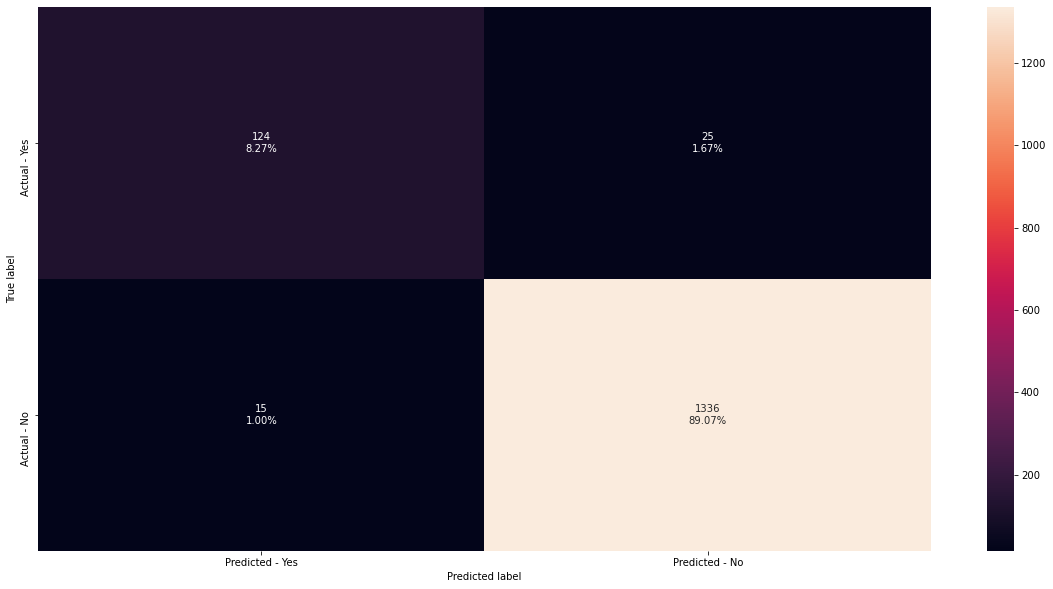

In [365]:
Confusion_Matrix(Model,y_test)

### Summary of Confusion Matrix Results:

#### True Positives:
- **Reality:** Customer secured a Personal Loan with the bank
- **Model predicted:** Customer will secure a Personal Loan
- **Outcome:** The model is accurate at predicting target outcome based on data provided (**8.33%**)

#### True Negatives:
- **Reality:** Customer did not secure a Personal Loan with the bank
- **Model predicted:** Customer won't secure a Personal Loan
- **Outcome:** No affect on business goal of increasing Personal Loan revenue (**89.00%**)

#### False Positives:
- **Reality:** Customer did not secure a Personal Loan with the bank
- **Model predicted:** Customer will secure a Personal Loan
- **Outcome:** The attempts to target these potential customers are wasted and cost the bank time/money as a result (**1.07%**)

#### False Negatives:
- **Reality:** Customer secured a Personal Loan with the bank
- **Model predicted:** Customer won't secure a Personal Loan
- **Outcome:** Customers may feel lack of loyalty or appreciation from the bank which could make them pursue other companies for credit products (**1.60%**)

### Insights
The results for both the Train and Test datasets are very high, with a perfect **Accuracy score of 100 for the training set and having very low misses on the Confusion Matrix (FP of 1.07% and FN of 1.6%)**.  However, each business case is unique and therefore cannot be categorized to one simple test such as accuracy.  

**It is worth examining the Target/Training data splits between predicting customers Not/Taking on Personal Loans (0 vs. 1)**.


Although the accuracy score above showed very strong results for both training and testing data, the summary above shows that **if the model marked every customer as not taking on a Personal Loan with the bank, it would only be right around 90% of the time**.  


It is not a bad score, however it may better serve us to examine other possible testing options, such as:

- **Precision:** How many of the customers predicted to take on a Personal Loan actually did?
    - True Positives / (True Positive + False Positives)
    
- **Recall (Sensitivity):** Of all the customers that did take on a Personal Loan, how many did the model predict would?
    - True Positive / (True Positives + False Negatives) 
    
- **F1-Score (Combo of Precision & Recall/Sensitivity):** What is the Mean split between the Precision and Recall results? 
    - 2 * (Recall * Precision) / (Recall + Precision)
    
- **Specificity:** Of all the customers that did not secure a Personal Loan with the bank, how many did the model predict wouldn't?
    - True Negative / True Negatives + True Positives 
    

#### What does AllLife Bank Want from the Data?
- The bank wants to **determine which customers are mostly likely to take on a Personal Loan** so that they can better cater to those individuals
- Since the goal is to **build a model that best determines the number of customers that will secure a Personal Loan, with the highest accuracy possible**, whether calculated against total predictions (Precision) or against total outcomes in general (Recall)
    - It is worth comparing the different scores and insights as listed above to determine which final score to focus on

#### Precision Score

In [366]:
#  Function to calculate Precision using Metrics library

def Precision_Score(Model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = Model.predict(X_train)
    pred_test = Model.predict(X_test)
    print("Precision Score on training set : ",round(metrics.precision_score(y_train,pred_train),3))
    print("Precision Score on test set : ",round(metrics.precision_score(y_test,pred_test),3))

In [367]:
Precision_Score(Model)

Precision Score on training set :  1.0
Precision Score on test set :  0.892


- As expected, the training score is a **perfect score of 1.0 since the Unpruned Decison Tree model accounts for every aspect of Training data**
- The **Precision score of .89 is a relatively strong score and indicates that 89 of every 100 customers (Predicted Only)**, within the testing dataset, **who were predicted to take on a Personal Loan actually did**

#### Recall Score

In [368]:
#  Function to calculate Recall using Metrics library

def Recall_Score(Model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = Model.predict(X_train)
    pred_test = Model.predict(X_test)
    print("Recall on training set : ",round(metrics.recall_score(y_train,pred_train),3))
    print("Recall on test set : ",round(metrics.recall_score(y_test,pred_test),3))

In [369]:
Recall_Score(Model)

Recall on training set :  1.0
Recall on test set :  0.832


- As expected, the training score is a **perfect score of 1.0 since the Unpruned Decison Tree model accounts for every aspect of Training data**
- The **Recall/Sensitivity score of .84 is also relatively strong score and indicates that 84 of every 100 customers (Predicted & Actual)**, within the testing dataset, **who were predicted to take on a Personal Loan actually did**

#### F1 Score (Blended Recall/Precision)

In [370]:
#  Function to calculate F1 Score using Metrics library

def F1_Score(Model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = Model.predict(X_train)
    pred_test = Model.predict(X_test)
    print("F1 Score on training set : ",round(metrics.f1_score(y_train,pred_train),3))
    print("F1 Score on test set : ",round(metrics.f1_score(y_test,pred_test),3))

In [371]:
F1_Score(Model)

F1 Score on training set :  1.0
F1 Score on test set :  0.861


- As expected, the training score is a **perfect score of 1.0 since the Unpruned Decison Tree model accounts for every aspect of Training data**
- The **F1 score of .86 is a strong blended score of Precision and Recall and splits the difference between both score results** for accurately predicted customers taking on a Personal Loan (Predicted & Actual) within the testing dataset

#### Specificity Score

In [372]:
# Build custom function for Specificity Score (not available in Metrics library)

def Specificity_Score(Model):

    ypredtrain = Model.predict(X_train)
    cmtrain = confusion_matrix(y_train, ypredtrain)
    specificitytrain = cmtrain[0,0]/(cmtrain[0,0]+cmtrain[1,0])

    ypredtest = Model.predict(X_test)
    cmtest = confusion_matrix(y_test, ypredtest)
    specificitytest = cmtest[0,0]/(cmtest[0,0]+cmtest[1,0])

    print("Specificity on training set : ",round(specificitytrain,3))
    print("Specificity on test set : ",round(specificitytest,3))

In [373]:
Specificity_Score(Model)

Specificity on training set :  1.0
Specificity on test set :  0.982


- As expected, the training score is a **perfect score of 1.0 since the Unpruned Decison Tree model accounts for every aspect of Training data**
- Conversely, the very high **Specificity score of .98 indicates that 98 of every 100 customers (Predicted & Actual)**, within the testing dataset, **who were predicted to not take on a Personal Loan actually did not do so**

## Chosen Score to Use for Decision Tree: Precision

**Usually, when building a model dealing with debt related products, the Recall score is often a strong metric** for testing loans for defaults to **prevent as many False Positives, non-predicted loan efaults, from occurring**.

However, in the case with AllLife Bank, **we actually want to be as accurate as possible on predicting as many True Positives (Loans taken), with any False Negatives being a free beneift to the bank** (predicted the customer wouldn't take on a loan but they actually did)

Since the marketing department will need to dedicate funding and various resources towards pursuing these specific customers, **any customers predicted to take on a loan but actually dont (False Positives) will end up costing the bank money and wasted resources/time**.

The optimal choice is therefore to use the **Precision Test** for determining model accuracy.

## Building Full (Unpruned) Decision Tree

In [374]:
# Create a list of all columns/features for Tree, using x values which already exclude the target variable - Personal_Loan

Columns = list(X.columns)
Features = Columns
print(Features)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_Alameda County', 'County_Butte County', 'County_Contra Costa County', 'County_El Dorado County', 'County_Fresno County', 'County_Humboldt County', 'County_Imperial County', 'County_Kern County', 'County_Lake County', 'County_Los Angeles County', 'County_Marin County', 'County_Mendocino County', 'County_Merced County', 'County_Monterey County', 'County_Napa County', 'County_Orange County', 'County_Placer County', 'County_Riverside County', 'County_Sacramento County', 'County_San Benito County', 'County_San Bernardino County', 'County_San Diego County', 'County_San Francisco County', 'County_San Joaquin County', 'County_San Luis Obispo County', 'County_San Mateo County', 'County_Santa Barbara County', 'County_Santa Clara County', 'County_Santa Cruz County', 'County_Shasta County', 'County_Siskiyou County', 'County_Solano County', 'County_Sonoma C

#### Visualization of Decision Tree

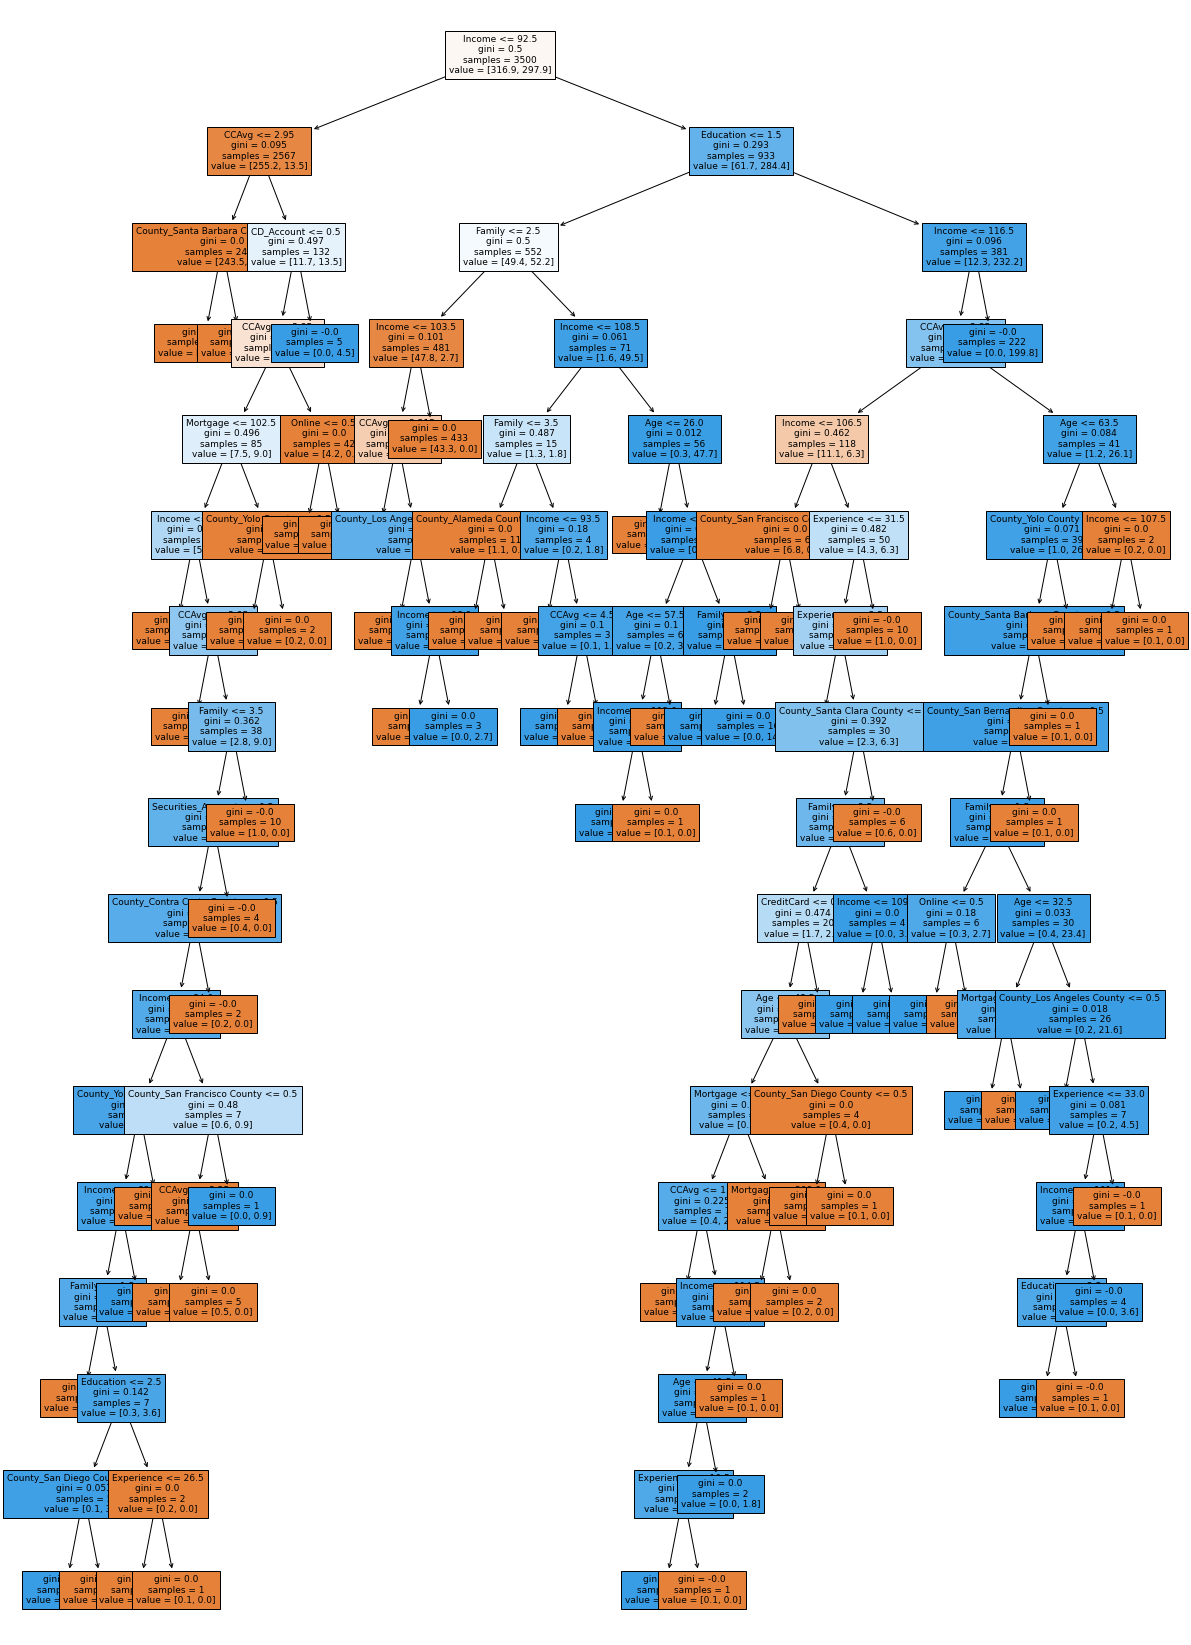

In [375]:
plt.figure(figsize=(20,30)) # Using a larger Y size limit due to expected size of full tree

out = tree.plot_tree(Model,feature_names=Features,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [376]:
# Text report for same Decision Tree above, showing rules and repective weightings

print(tree.export_text(Model,feature_names=Features,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- County_Santa Barbara County <= 0.50
|   |   |   |--- weights: [236.10, 0.00] class: 0
|   |   |--- County_Santa Barbara County >  0.50
|   |   |   |--- weights: [7.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- County_Contra Costa County <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 84.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   

### Insights
- The top feature, **the Root Node in order of importance, is Customer Income, with the highest Gini Impurity score of 0.5**
- **Customer Average Credit Card balance and Education** are the next level of nodes in order of importance with **Gini Impurity scores of .095 and .293 respectively**
- The tree then splits into multiple levels based on Gini Impurity criteria, making it harder to easily determine the next level of nodes
    - **A summary of Feature Importance** will make it easier to **determine key features** and possibly **prune the lower nodes of the tree**

In [377]:
# Summarize Importance of Features in decision tree building - normalized total reduction of the (Gini) criterion by the feature

# Build summary Dataframe of feature importances of the X Training dataset, in descending order
print (pd.DataFrame(Model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
Income                         6.306446e-01
Family                         1.495358e-01
Education                      9.057640e-02
CCAvg                          8.731190e-02
CD_Account                     7.690498e-03
Mortgage                       7.185811e-03
Experience                     6.866935e-03
Age                            4.054145e-03
County_San Francisco County    2.344464e-03
County_Santa Clara County      2.254161e-03
County_Los Angeles County      2.162913e-03
Securities_Account             1.878577e-03
Online                         1.758348e-03
CreditCard                     1.703663e-03
County_Yolo County             1.177378e-03
County_Contra Costa County     9.945408e-04
County_San Diego County        6.336390e-04
County_San Bernardino County   6.153682e-04
County_Santa Barbara County    6.108099e-04
County_Alameda County          3.976619e-18
County_Ventura County          0.000000e+00
County_Tuolumne County         0

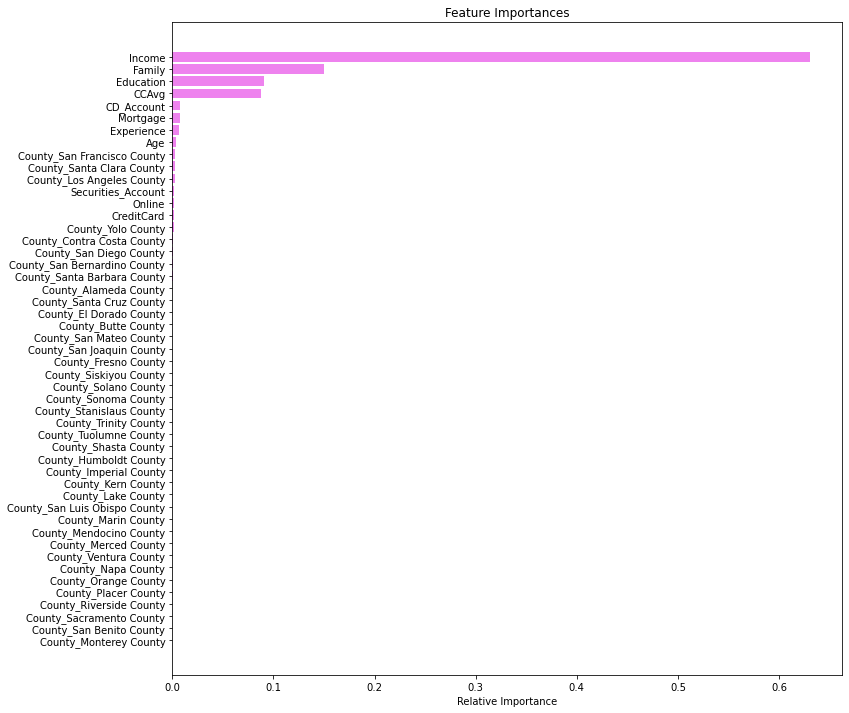

In [378]:
Importances = Model.feature_importances_
Indices = np.argsort(Importances) # Sort in order of size (descending)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center')
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- Interestingly enough, **Family is the second highest feature by importance but only showed on the 3rd level of the Decision Tree**, below Customer Average Credit Card balance and Education
- **Customer Income is 3x more important in predicting the likelihood of securing a Personal Loan than Family, which is nearly 2x as important as Customer Average Credit Card balance and Education**, which appear to be relatively equally important
- Having a **CD Account and/or Mortgage**, plus the average years of **Professional Experience** of the Customer have only a **slight level of importance** within the dataset
- **Age has arguably little to no value** in helping predict likelihood of Customer's securing Personal Loans, followed by the **Customer's home County** (derived from their Zip Code) which, excluding LA and Santa Clara, **offers no value as all**
    - During **pruning of the Decision Tree, it is likely that County and possibly Age**, plus potentially a few more features **can be dropped**

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [379]:
from sklearn.model_selection import GridSearchCV # Import the Grid Search library for cross validation Hyperparameter testing

In [380]:
# Choose the type of classifier, assign weighting, and set hyperparameter tuning limits

Estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:0.10,1:0.90})

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(3,10), 
              'min_samples_leaf': [1,2,5,7,10,12],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
Scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
Grid_obj = GridSearchCV(Estimator, parameters, scoring=Scorer, cv=10) # Set how many Cross Validation Folds to test
Grid_obj = Grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Estimator = Grid_obj.best_estimator_

# Fit the best algorithm to the data. 
Estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=9,
                       min_impurity_decrease=1e-05, random_state=1)

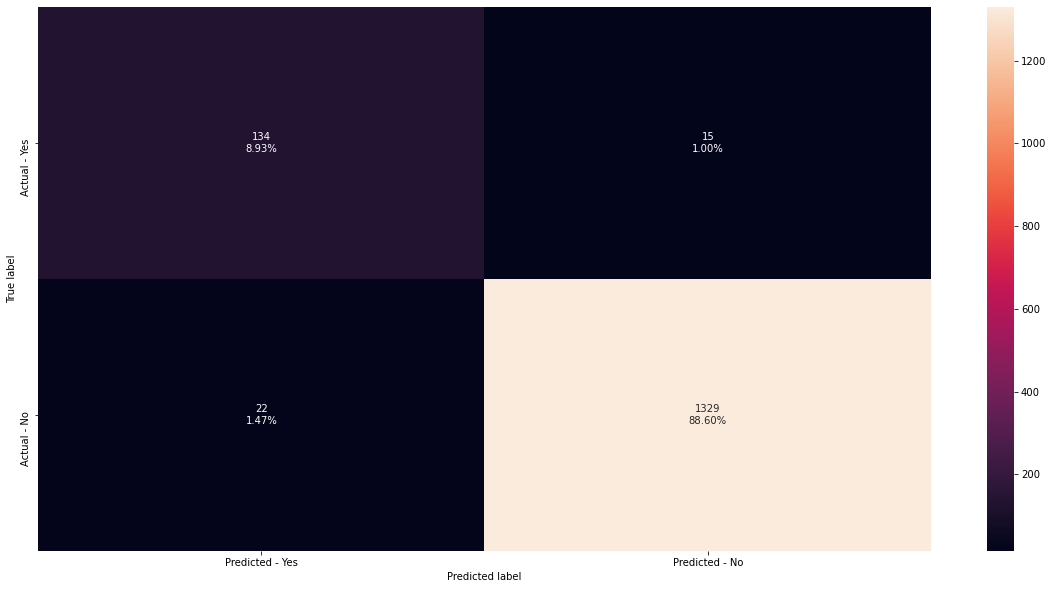

In [381]:
Confusion_Matrix(Estimator,y_test)

In [382]:
# Recalculate the Accuracy score for training & testing sets

print("Train set accuracy: ", round(Estimator.score(X_train,y_train),3))

print("Test set accuracy: ", round(Estimator.score(X_test,y_test),3))

Train set accuracy:  0.989
Test set accuracy:  0.975


**Accuracy is still very high for both Training/Testing data**, however it is the Precision score that is more valuable in this analysis.

In [383]:
Precision_Score(Estimator)

Precision Score on training set :  0.897
Precision Score on test set :  0.859


The Precision Score of 0.85 may be slightly lower than the original (unadjusted) Decision Tree which scored 0.89, however, the **Training score of 0.89 is better than the respective original score of 1.0 as it indicates that the model is no longer overfitted** and is actually testing (not memorizing data) and scoring close results between both sets.

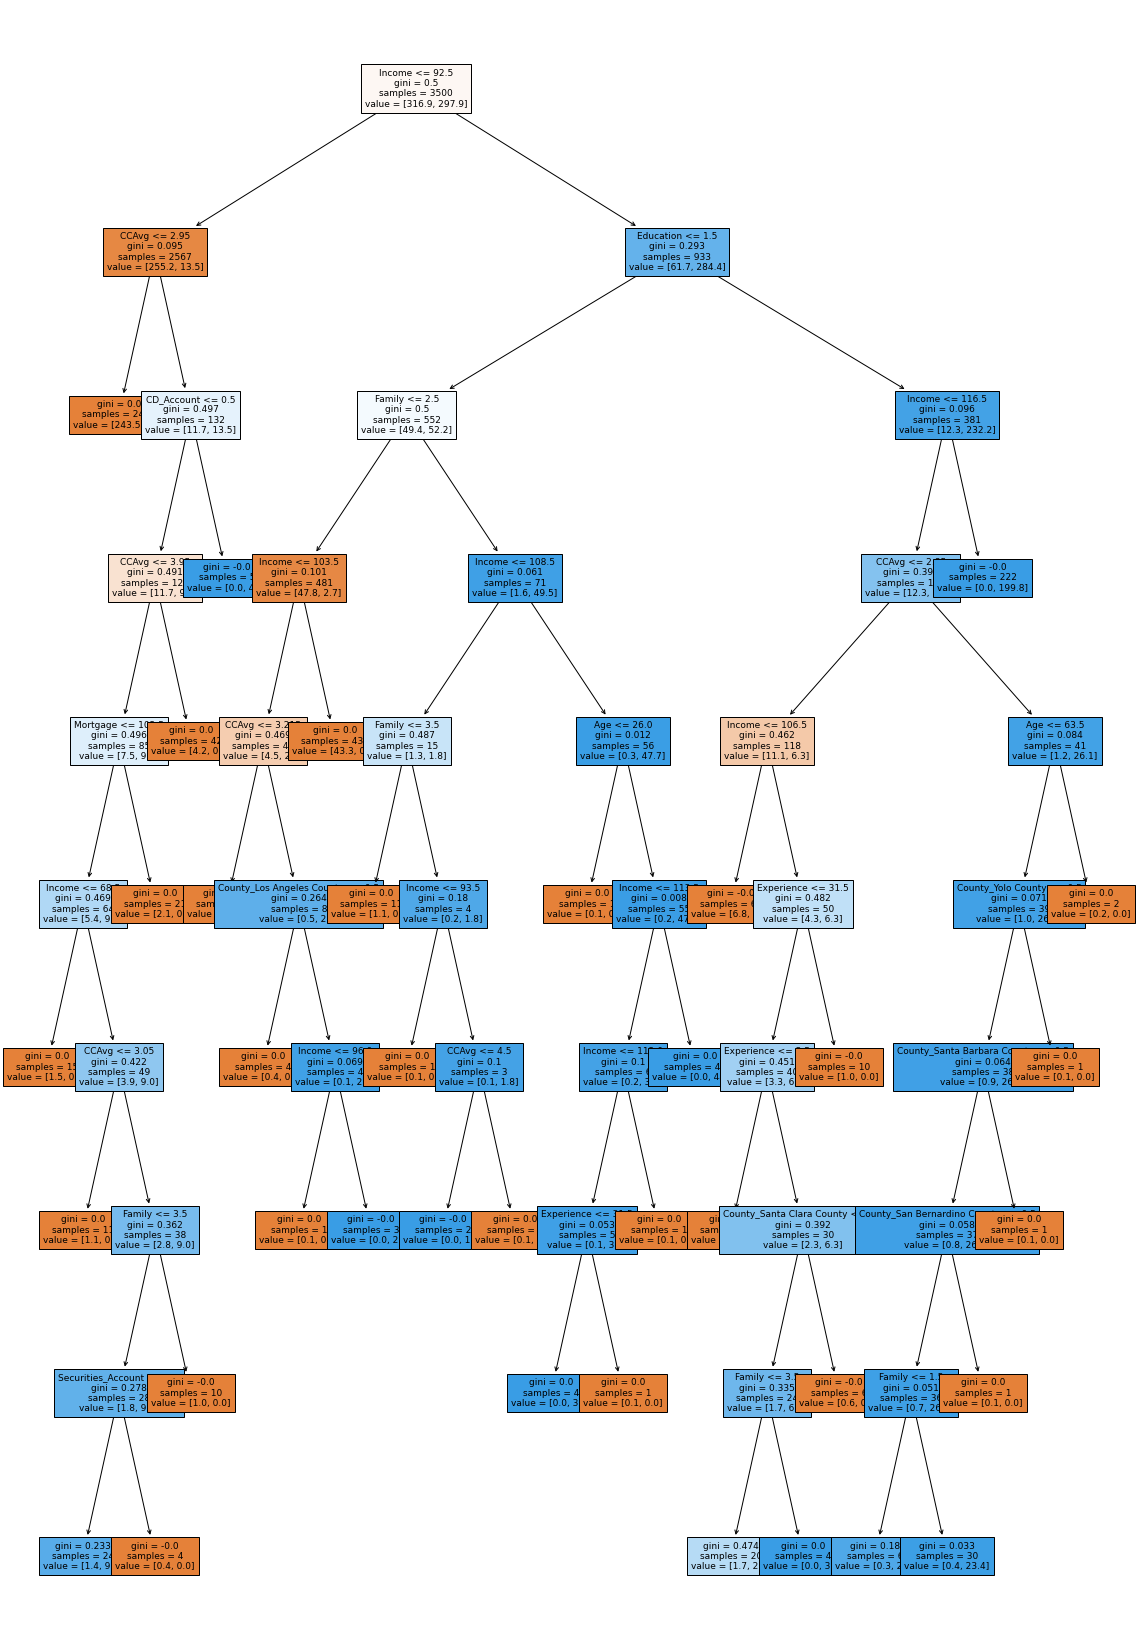

In [384]:
plt.figure(figsize=(20,30)) # Using a larger Y size limit due to expected size of full tree

out = tree.plot_tree(Estimator,feature_names=Features,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [385]:
# Text report for same Decision Tree above, showing rules and repective weightings

print(tree.export_text(Estimator,feature_names=Features,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.40, 9.00] class: 1
|   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.40, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   

In [386]:
# Summarize Importance of Features in decision tree building - normalized total reduction of the (Gini) criterion by the feature

# Build summary Dataframe of feature importances of the X Training dataset, in descending order
print (pd.DataFrame(Estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.641037
Family                         0.151356
Education                      0.090541
CCAvg                          0.087927
CD_Account                     0.007839
Experience                     0.006427
Mortgage                       0.004753
County_Santa Clara County      0.002298
County_Los Angeles County      0.002160
Securities_Account             0.001915
Age                            0.001879
County_San Bernardino County   0.000627
County_Santa Barbara County    0.000623
County_Yolo County             0.000618
County_El Dorado County        0.000000
County_Shasta County           0.000000
County_San Joaquin County      0.000000
County_San Luis Obispo County  0.000000
County_San Mateo County        0.000000
CreditCard                     0.000000
Online                         0.000000
County_Santa Cruz County       0.000000
County_Siskiyou County         0.000000
County_San Diego County        0.000000


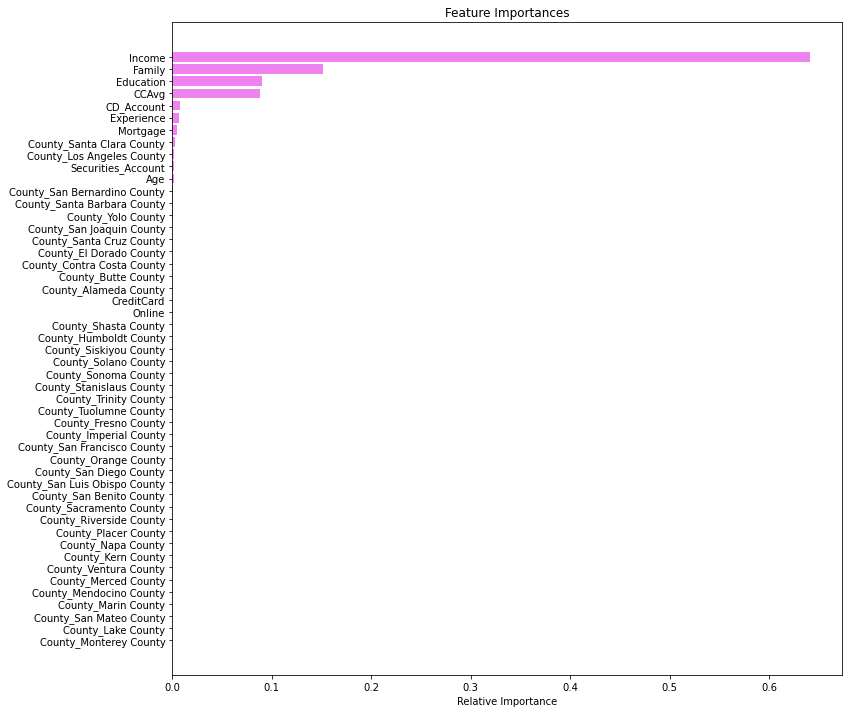

In [387]:
Importances = Estimator.feature_importances_
Indices = np.argsort(Importances) # Sort in order of size (descending)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center')
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
The level of **importance for features for the pre-pruned Decision Tree is very similar to that of the Original Tree**
- Income is the most importance variable in predicting likelihood of a customer securing a loan, followed by Family size, Education Levels, and average Credit Card balance
- **CD Account, Experience, and Mortgage balance are still important features in the model although at a much lower level** of importance than the others listed ahead of them
    - **Experience now shows slightly higher than Mortgage balance, vs. the opposite ordering in the original Decision Tree**
- Hardly any of the Counties are included as being important for the modelling and the same can be said for Age which is now only slightly showing any value to the model

Overall, it is still apparent that the pre-pruned Decision Tree model lowered or completely removed some variables, namely Counties, based on level of importance.

## Post Pruning - Cost Complexity Pruning
- The nodes with the smallest Alpha scores will be pruned first
- The total Impurity the Decision Tree leaves will increase as more leaves (based on Alpha scores) are pruned

In [388]:
# Use Complexity Pruning Path function in Decsion Tree Classifier to Alpha Scores and Impurities

classifier = DecisionTreeClassifier(random_state=1,class_weight = {0:0.10,1:0.90}) # Reversed weighting to counter 90/10 (0/1) Loan Split
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [389]:
# Create a summary dataframe of all Alpha Scores and respective total Impurites as Alphas are removed (Ascending order on Alpha)

pd.DataFrame(path) 

ccp_alphas    impurities
0   0.000000e+00 -2.408487e-15
1   5.056318e-19 -2.407981e-15
2   1.137672e-18 -2.406844e-15
3   1.300196e-18 -2.405543e-15
4   1.444662e-18 -2.404099e-15
5   1.986411e-18 -2.402112e-15
6   2.600392e-18 -2.399512e-15
7   9.029140e-18 -2.390483e-15
8   2.275343e-17 -2.367729e-15
9   2.389110e-17 -2.343838e-15
10  4.543463e-17 -2.298404e-15
11  2.419448e-16 -2.056459e-15
12  2.462427e-15  4.059682e-16
13  1.568454e-04  3.136909e-04
14  1.591186e-04  6.319280e-04
15  1.632060e-04  9.583400e-04
16  2.159672e-04  1.606241e-03
17  2.920570e-04  1.898299e-03
18  2.927781e-04  2.483855e-03
19  3.136909e-04  2.797546e-03
20  3.165169e-04  3.114063e-03
21  3.173588e-04  3.748780e-03
22  3.219261e-04  4.070706e-03
23  3.707367e-04  5.924390e-03
24  3.751817e-04  7.425116e-03
25  5.275869e-04  7.952703e-03
26  5.990667e-04  8.551770e-03
27  6.750008e-04  9.226771e-03
28  7.080002e-04  1.135077e-02
29  7.342114e-04  1.208498e-02
30  8.510178e-04  1.293600e-02
31  9.383915e-04  1.387439e-02
32  9.615100e-04  1.483590e-02
33  1.058707e-03  1.589461e-02
34  1.126004e-03  1.702061e-02
35  1.416358e-03  1.985333e-02
36  1.743294e-03  2.333992e-02
37  1.985898e-03  2.731171e-02
38  2.127748e-03  2.943946e-02
39  2.328917e-03  3.176838e-02
40  3.240232e-03  3.500861e-02
41  3.470671e-03  4.194995e-02
42  3.841577e-03  4.579153e-02
43  4.760264e-03  5.055179e-02
44  1.059696e-02  7.174571e-02
45  2.132036e-02  9.306606e-02
46  5.678893e-02  2.066439e-01
47  2.928785e-01  4.995225e-01

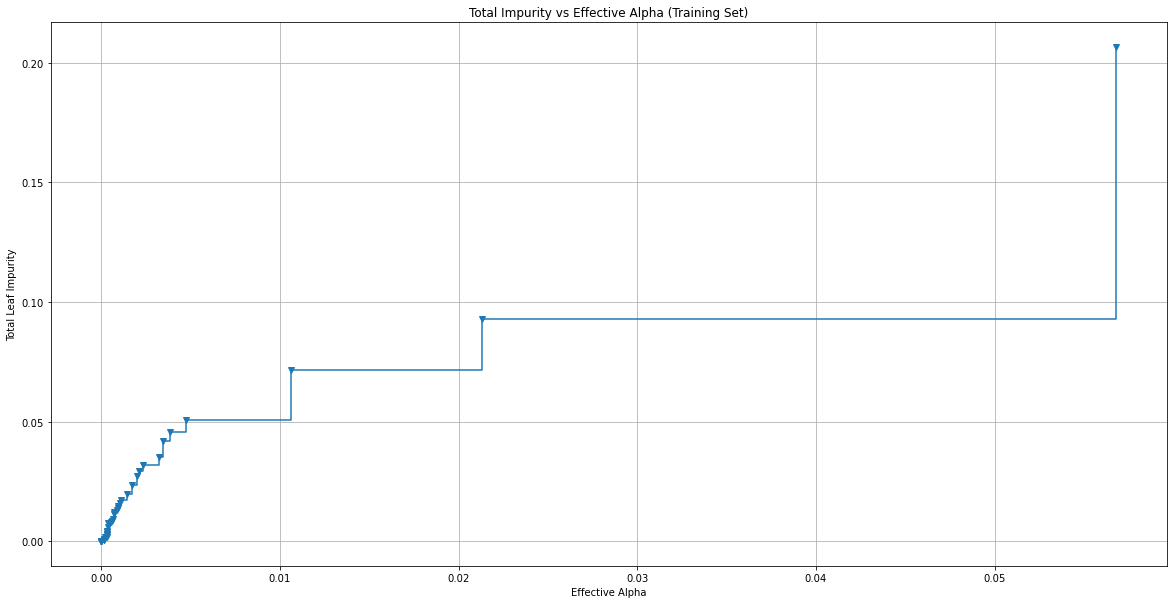

In [390]:
# Create a summary Step Chart Showing Change in Impurities as Alpha Score Increases

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='v', drawstyle="steps-post") # Plot the Alpha Scores & Impurities from Above
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Leaf Impurity")
ax.set_title("Total Impurity vs Effective Alpha (Training Set)");
plt.grid()

- There is a steep jump in Total Impurities **when Alpha Score surpasses approximately 0.06, this indicates a point where the entire tree has been pruned**
- An **optimal Alpha Score** range appears to be **around 0.0225**, the point of **highest Alpha Score (nodes pruned) without triggering the next jump in Overall Impurity**

In [391]:
classifiers = []
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.10,1:0.90})
    classifier.fit(X_train, y_train)
    classifiers.append(classifier)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      classifiers[-1].tree_.node_count, ccp_alphas[-1])) # Print the very last Alpha Score in the range

Number of nodes in the last tree is: 1 with ccp_alpha: 0.29287854019800325


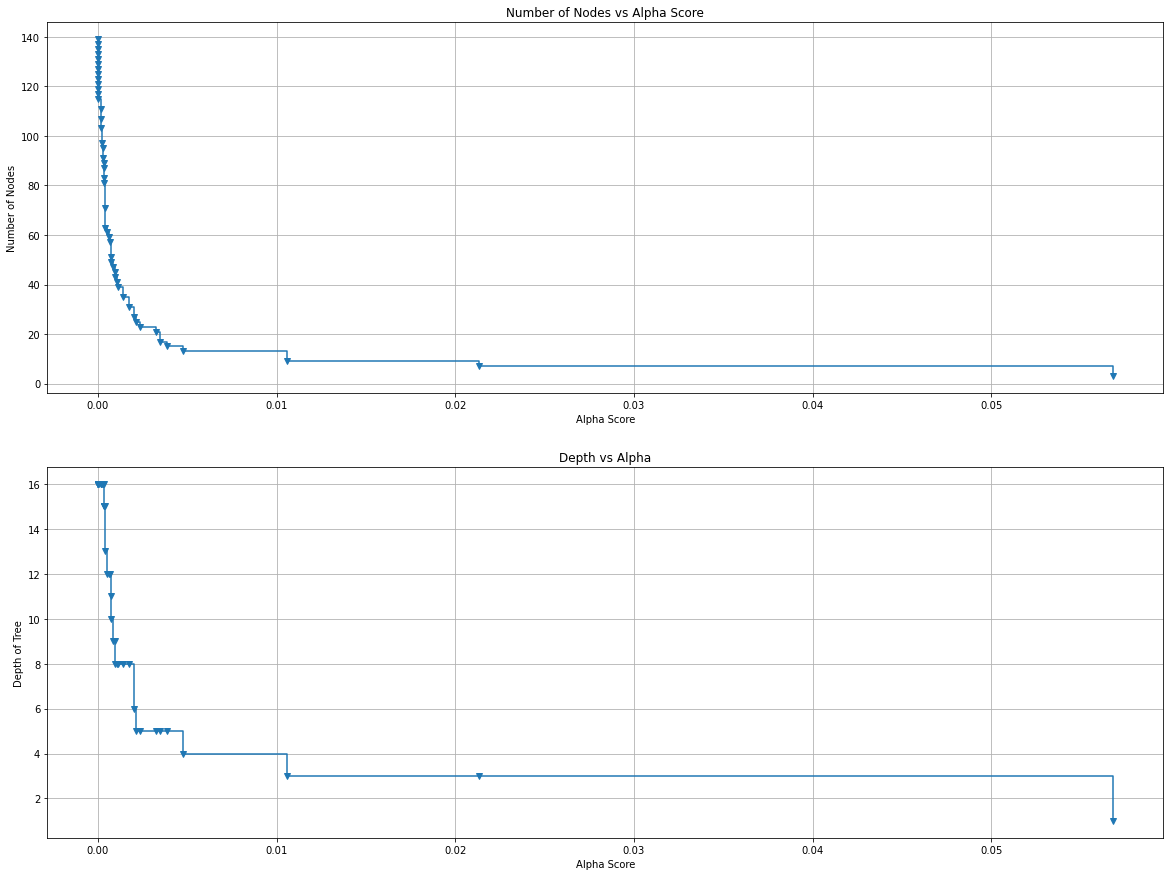

In [392]:
# Create a summary subplot showing decrease in Depth of Tree & Number of Nodes as Alpha Score increases, final Alpha = 1 Node

classifiers = classifiers[:-1] # Select all Decision Tree Classifier results through the Last Row
ccp_alphas = ccp_alphas[:-1] # Select all Alpha Scores through the Last Result

nodes = [classifier.tree_.node_count for classifier in classifiers] # Build the tree nodes based on each Classifier result
tree_depth = [classifier.tree_.max_depth for classifier in classifiers] # Build the tree based on Max Depth of Classifers
fig, ax = plt.subplots(2, 1,figsize=(20,15))


ax[0].plot(ccp_alphas, nodes, marker='v', drawstyle="steps-post")
ax[0].set_xlabel("Alpha Score")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha Score")

ax[1].plot(ccp_alphas, tree_depth, marker='v', drawstyle="steps-post")
ax[1].set_xlabel("Alpha Score")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha");

ax[0].grid()
ax[1].grid()


- As the Alpha Score increases, more of the tree is pruned, both by levels/depth and by count of overall nodes across all levels
    - The **Number of Nodes** starts at over 140 and **drops to around 10 at the highest Alpha Score**
    - The **Depth of the Tree** starts at a level of 16 and **drops down to around 2 at the highest Alpha Score**

In [393]:
precision_train=[]
for classifier in classifiers:
    predict_train=classifier.predict(X_train) 
    vals_train=metrics.precision_score(y_train,predict_train) # Score the Classified Actual y train vs. Predicted X train results
    precision_train.append(vals_train)

In [394]:
precision_test=[]
for classifier in classifiers:
    predict_test=classifier.predict(X_test)
    vals_test=metrics.precision_score(y_test,predict_test)  # Score the Classified Actual y test vs. Predicted X test results
    precision_test.append(vals_test)

In [395]:
train_scores = [classifier.score(X_train, y_train) for classifier in classifiers]
test_scores = [classifier.score(X_test, y_test) for classifier in classifiers]

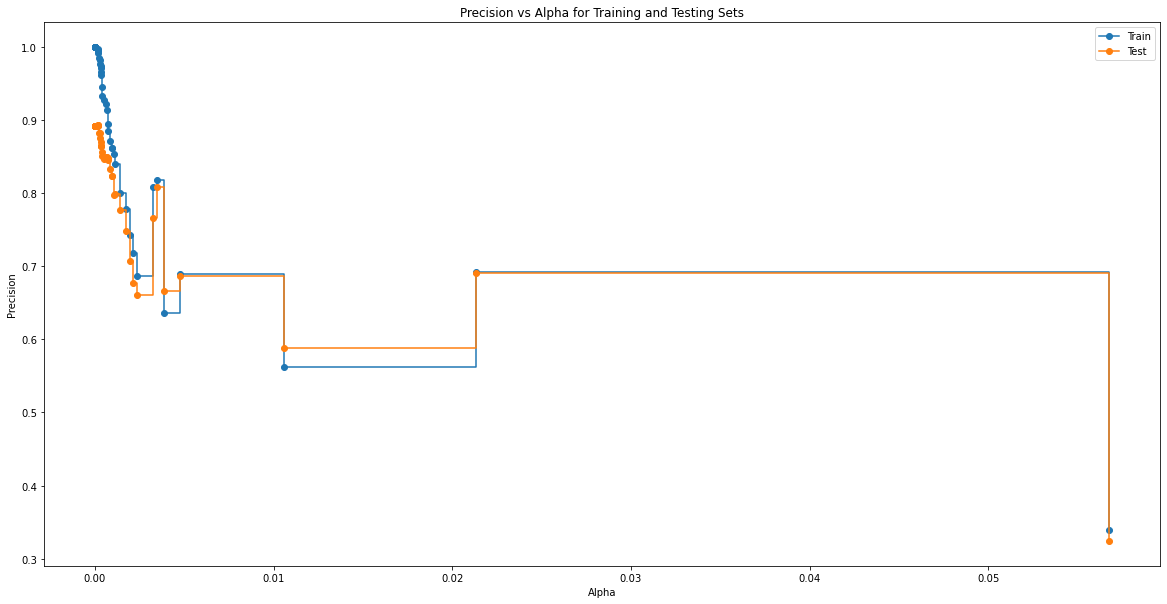

In [396]:
# Create a summary Plot detailing the Split in Precision Scores (Training)

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel("Alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, precision_train, marker='o', label="Train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, precision_test, marker='o', label="Test",
        drawstyle="steps-post")
ax.legend()
plt.show()

- At their highest scores, before making pruning adjustments **(Alpha of 0), the Train and Test scores are roughly 1.0 and 0.89 respectively**
- At a **maximum Alpha Score of approximately 0.025, both scores drop to around 0.69**, indicating the Root node has been reached (no more pruning can occur)
- At an **Alpha Score level or around 0.0002**, both Train and Test Precision Scores appear to be at their **highest, pruned, levels of around 0.99 and 0.88 Respectively**
    - At this level however, very few nodes are removed and **the model is left largely untouched**

In [397]:
# Create the Best Model for highest Train/Test Precision

Highest_Model = np.argmax(precision_test) # Argmax function max values indices on the axis
Best_Model = classifiers[Highest_Model]
print(Best_Model)

DecisionTreeClassifier(ccp_alpha=0.00016320600302238488,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)


In [398]:
Best_Model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00016320600302238488,
                       class_weight={0: 0.1, 1: 0.9}, random_state=1)

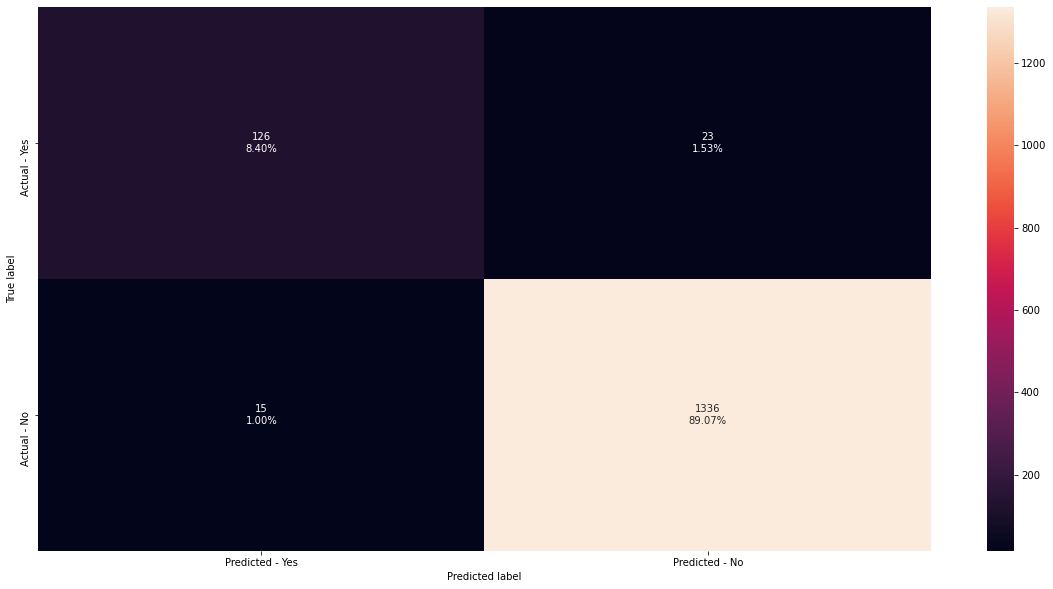

In [399]:
# Reload the Confusion Matrix using the post-pruned 'Best' Model

Confusion_Matrix(Best_Model,y_test)

In [400]:
# Recalculate the Accuracy score for training & testing sets of the first post-pruned model

print("Train set accuracy: ", round(Best_Model.score(X_train,y_train),3))

print("Test set accuracy: ", round(Best_Model.score(X_test,y_test),3))

Train set accuracy:  0.999
Test set accuracy:  0.975


The **Accuracy scores are still very high for both Training and Testing outcomes**, however since we care more about **maximizing True Positives, the Precision Score is still the central focus**.

In [401]:
# Recalculate the Precision scores for training & testing sets of the first post-pruned model

Precision_Score(Best_Model) 

Precision Score on training set :  0.991
Precision Score on test set :  0.894


- The nearly perfect score of **0.99 on Training data indicates that the model is still largely overfitted and that the Best (ArgMax) approach will not work for the model**
- The Testing score of 0.89 is a strong result, however **it may be possible to get similar results using a smaller/pruned model, or at least lower the gap between Train/Test results**, so further testing is needed

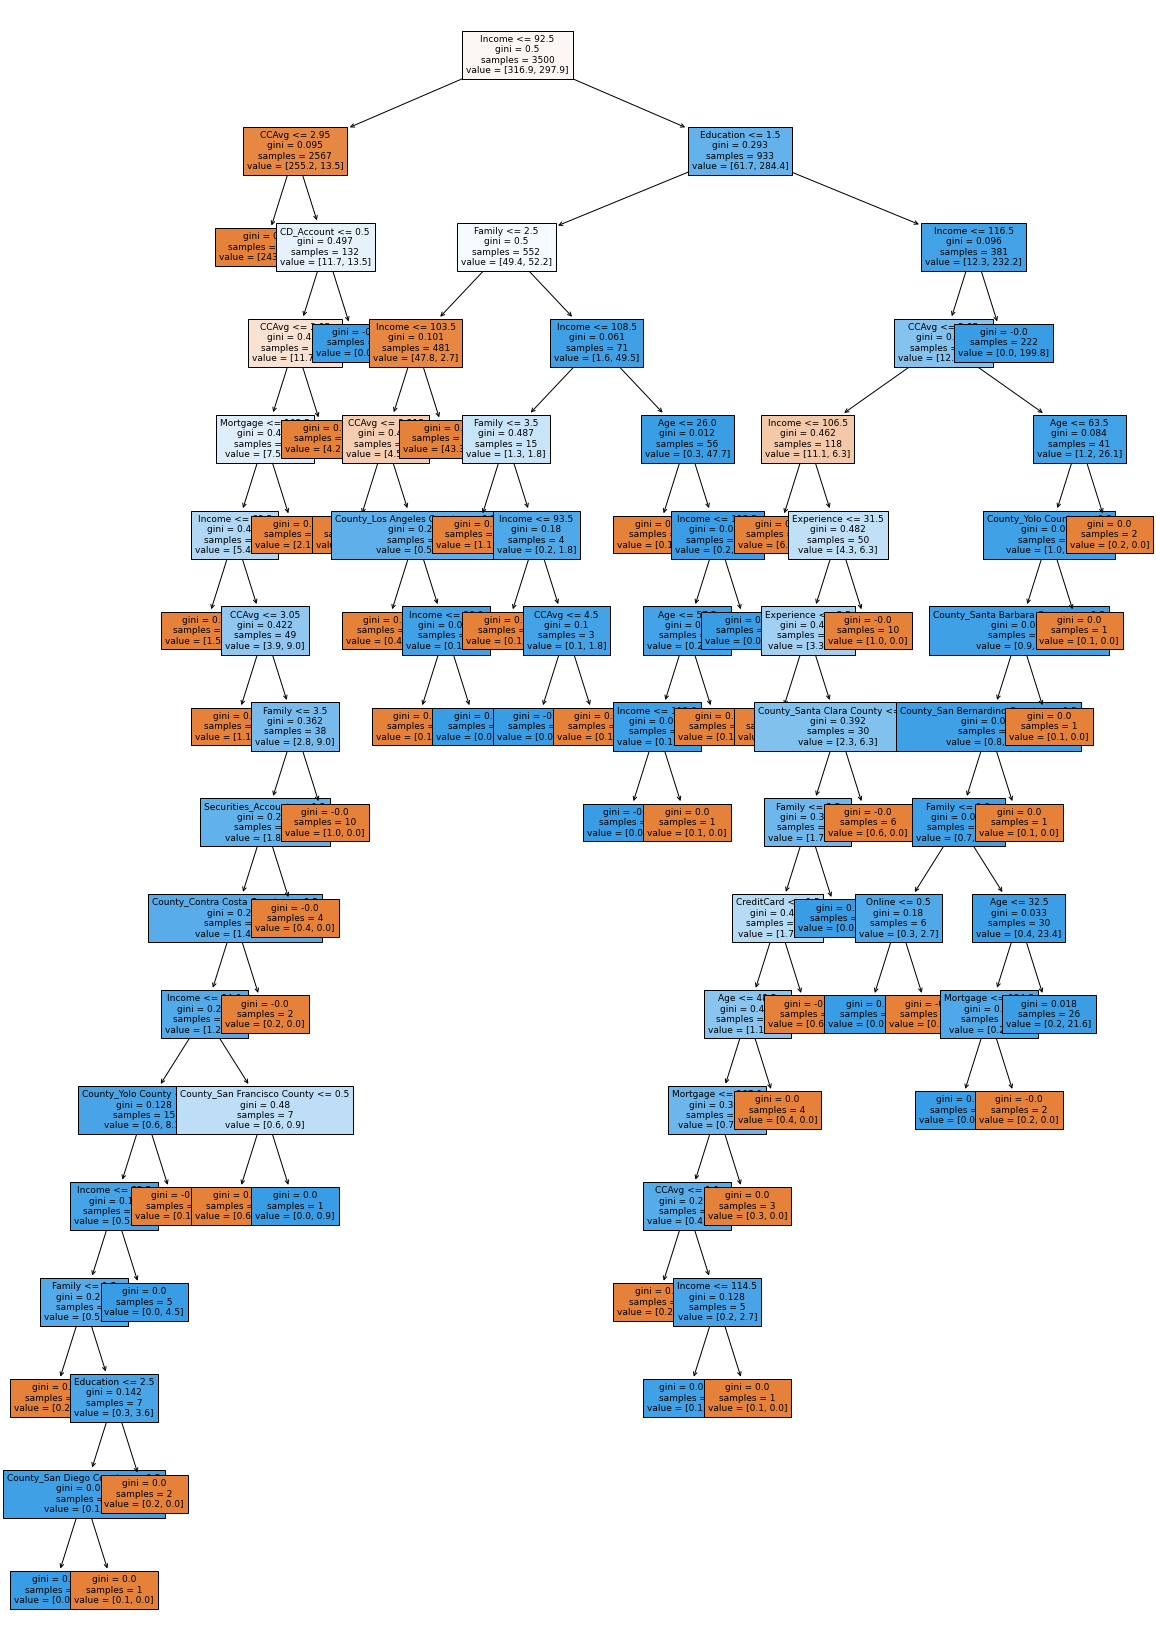

In [402]:
# Recreate a Decision Tree using the Best Model approach above

plt.figure(figsize=(20,30)) # Using a larger Y size limit due to expected size of full tree

out = tree.plot_tree(Best_Model,feature_names=Features,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

- The post-pruned Decision Tree model appears to be slightly smaller than the initial Decision Tree created, and substantially larger/deeper than the Tree created through Hyperparamter pre-pruning
- It appears that **more nodes/levels could be removed without severely reducing Accuracy and Precision scores**
    - More testing should be performed to **determine optimal performance vs. efficiency**

Since the Best Model shown above used an Alpha Score of only 0.00016, we will test a much higher Alpha score, comparatively, of **0.00075**

In [403]:
Best_Model2 = DecisionTreeClassifier(ccp_alpha=0.00075,
                       class_weight={0: 0.10, 1: 0.90}, random_state=1) # Keep random state of 1 to match all uses of it, 
Best_Model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00075, class_weight={0: 0.1, 1: 0.9},
                       random_state=1)

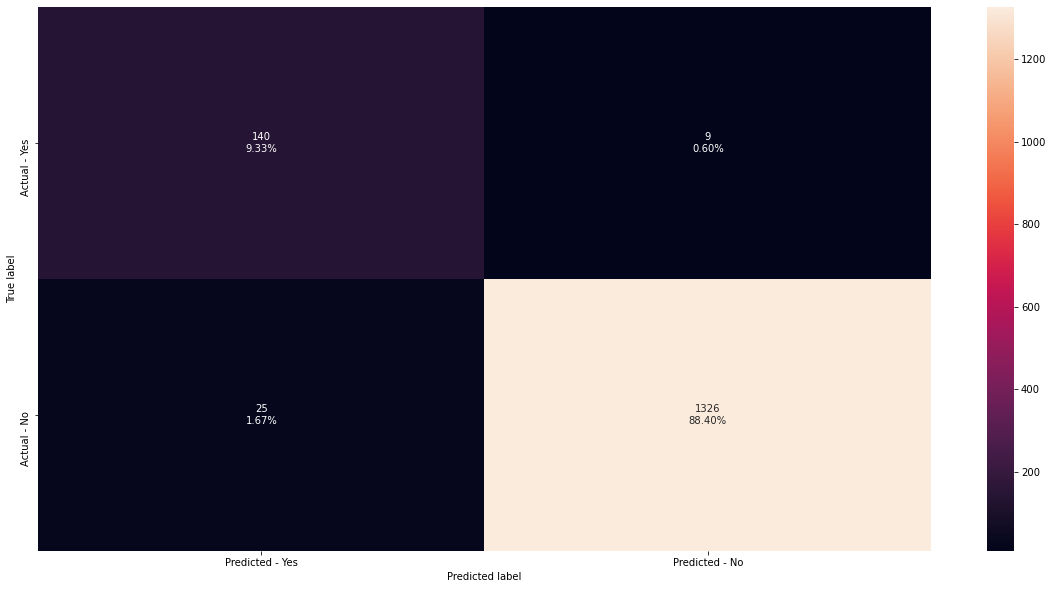

In [404]:
Confusion_Matrix(Best_Model2,y_test) # Inspect Confusion Matrix of post-pruned Decision Tree model

In [405]:
# Recalculate the Accuracy score for training & testing sets of the first post-pruned model

print("Train set accuracy: ", round(Best_Model2.score(X_train,y_train),3))

print("Test set accuracy: ", round(Best_Model2.score(X_test,y_test),3))

Train set accuracy:  0.988
Test set accuracy:  0.977


**The Accuracy scores have decreased slightly but are still very high for both Training/Testing data**.
The Precision score is still the more valuable metric for this analysis.

In [406]:
Precision_Score(Best_Model2) # Calculate new Precision Score for post-pruned Decision Tree model

Precision Score on training set :  0.885
Precision Score on test set :  0.848


Both Precision scores are far closer aligned, with the **Training data scoring slightly higher at 89 vs. 85 for Testing**, however this is **much better than the original model scores of 1.0 and 0.89 respectively**.

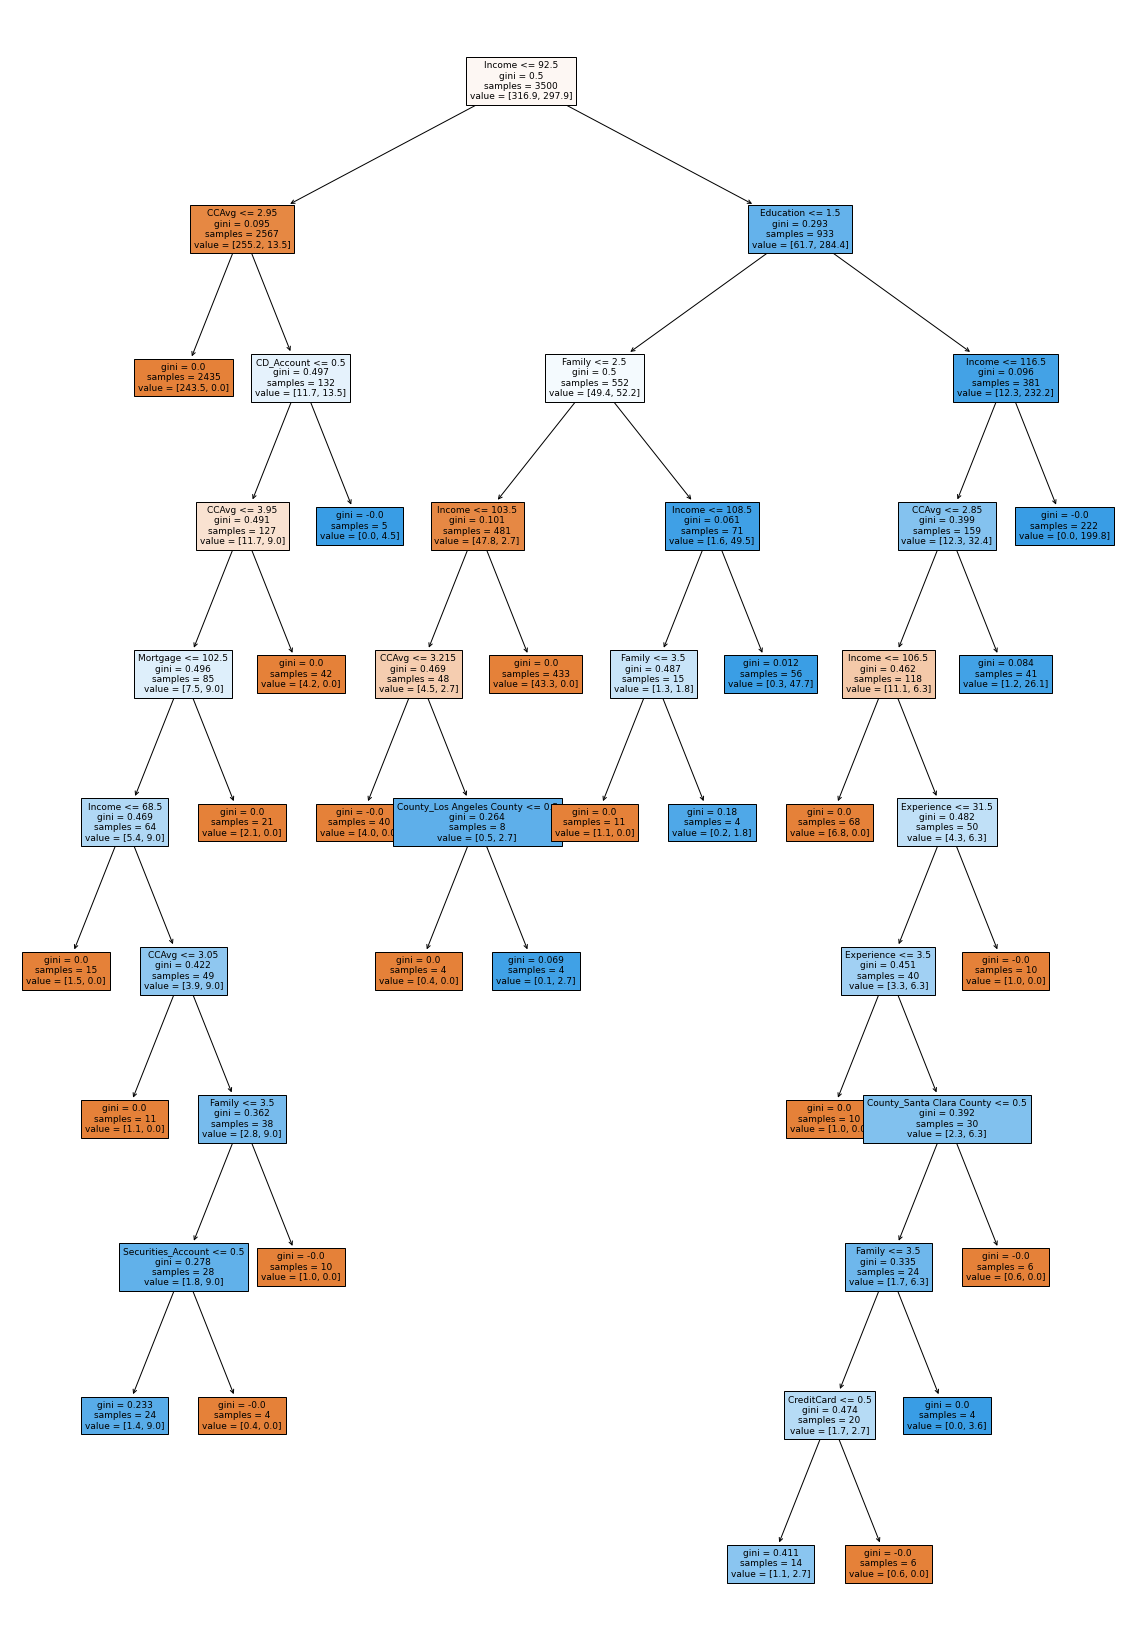

In [407]:
# Recreate a Decision Tree using a more agressive Alpha Approach (Best Model 2)

plt.figure(figsize=(20,30)) # Using a larger Y size limit due to expected size of full tree

out = tree.plot_tree(Best_Model2,feature_names=Features,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [408]:
# Text report for post-pruned Decision Tree above, showing rules and repective weightings

print(tree.export_text(Best_Model2,feature_names=Features,show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [243.50, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Mortgage <= 102.50
|   |   |   |   |   |--- Income <= 68.50
|   |   |   |   |   |   |--- weights: [1.50, 0.00] class: 0
|   |   |   |   |   |--- Income >  68.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [1.10, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.40, 9.00] class: 1
|   |   |   |   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.40, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |--- Mortgage >  102.50
|   |   |   |   

In [409]:
print (pd.DataFrame(Best_Model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                    Imp
Income                         0.642553
Family                         0.152038
Education                      0.091023
CCAvg                          0.087762
CD_Account                     0.007881
Experience                     0.005811
Mortgage                       0.004778
County_Santa Clara County      0.002310
County_Los Angeles County      0.002172
Securities_Account             0.001925
CreditCard                     0.001746
County_San Luis Obispo County  0.000000
County_Santa Barbara County    0.000000
County_San Mateo County        0.000000
Age                            0.000000
County_San Joaquin County      0.000000
County_San Francisco County    0.000000
County_San Diego County        0.000000
County_Sonoma County           0.000000
County_Santa Cruz County       0.000000
County_Shasta County           0.000000
County_Siskiyou County         0.000000
County_Solano County           0.000000
County_San Benito County       0.000000


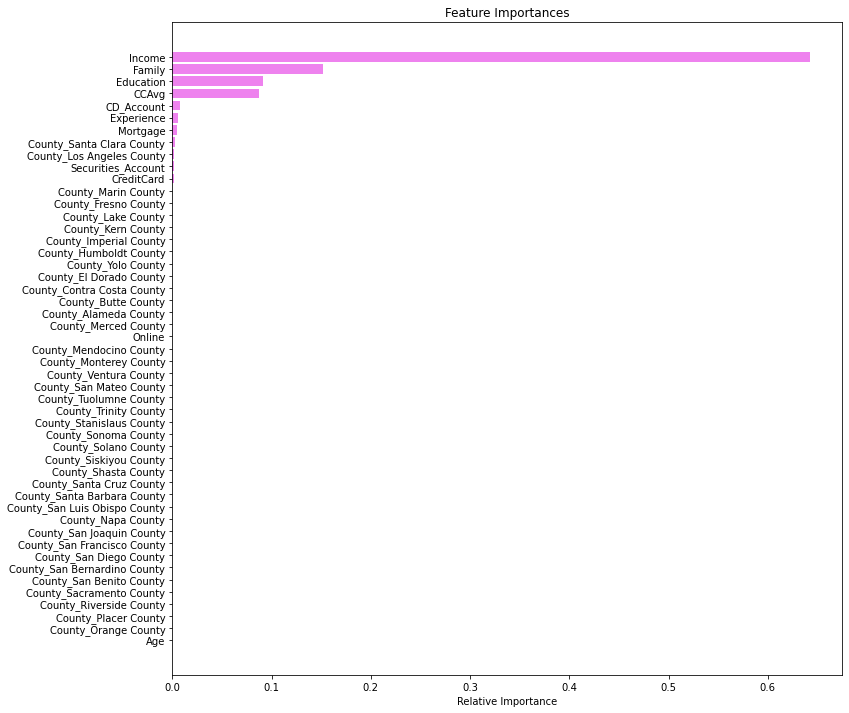

In [410]:
Importances = Best_Model2.feature_importances_
Indices = np.argsort(Importances) # Sort in order of size (descending)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(Indices)), Importances[Indices], color='violet', align='center')
plt.yticks(range(len(Indices)), [Features[i] for i in Indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights

The level of **importance for features for the post-pruned Decision Tree is similar to that of the Original and Pre-Pruned versions**
- Income is the most importance variable in predicting likelihood of a customer securing a loan, followed by Family size, Education Levels, and average Credit Card balance
- **CD Account, Experience, and Mortgage balance are still important features in the model although at a much lower level** of importance than the others listed ahead of them
    - **Experience now shows slightly higher than Mortgage balance, vs. the opposite ordering in the original Decision Tree**
- The Age variable has been completely removed and most counties, excluding Santa Clara and LA, have also been removed.

In [411]:
# Create a summary dataframe detailing the Original vs. Final (Adjusted) Logistic Regression Model results: Accuracy/Precision

Tree_Summary = pd.DataFrame({'Model':['Initial Decision Tree Model',
                                      'Decision Tree with Pre-Pruning (Hyperparameters)',
                                        'Decision Tree with Post-Pruning (Min-Pruning)',
                                      'Decision Tree with Post-Pruning (Optimal-Pruning)'                                     
                                     ],
                             
                             'Train_Accuracy':[1.0,0.989,0.999,0.988], 'Test_Accuracy':[0.973,0.975,0.974,0.977],
                             'Train_Precision':[1.0,0.892,0.991,0.885], 'Test_Precision':[0.887,0.849,0.887,0.848]})

Tree_Summary

Model  Train_Accuracy  \
0                        Initial Decision Tree Model           1.000   
1   Decision Tree with Pre-Pruning (Hyperparameters)           0.989   
2      Decision Tree with Post-Pruning (Min-Pruning)           0.999   
3  Decision Tree with Post-Pruning (Optimal-Pruning)           0.988   

   Test_Accuracy  Train_Precision  Test_Precision  
0          0.973            1.000           0.887  
1          0.975            0.892           0.849  
2          0.974            0.991           0.887  
3          0.977            0.885           0.848

### Insights
- **All 4 models reflect very higher Accuracy scores for both the Training and Testing data**, which is very good considering the adjustments made to the Pre-Pruned and Optimal Post-Pruned models
- The Initial Decision Tree and the Post Pruned Best Fit/Min-Pruning models **scored 1.0 on the Training Data** or close to it, with decent but far lower Testing scores respectively, **due to overfitting the data (hardly any data removed)**
- Conversely, both the **Pre-Pruned (Hyperparamter-Tuned) and Post-Pruned (Optimal Pruning) models** scored roughly the same for **Training (+- 0.89) and Testing (+- 0.85)**
    - The fact that the **Training and Testing results are close in scoring is a good sign that the models are able to react to new data instead of memorizing what's been fed into it (Training scores of 1.0, etc.)**
    
Since both the Pre-Pruned and final Post-Pruned models scored relatively the same, **it would be preferable to use the Pre-Pruned model for the sake of saving time in analysis and further pruning steps that could possibly lead to errors occurring**.

### Overall Recommendations
- AllLife Bank needs to focus its marketing time and resources on **targeting customers with the highest incomes (Over a minimum of \\$70k) first**, as this subset has shown in all models to be a good indicator of securing a Personal Loan
    - **Size of family, Education** (oftentimes indicative of professional experience), and **average Credit Card Balance** are all great secondary variables to incorporate into the marketing focus
    - Larger families (3 or more members) with higher incomes tend to be more likely to take on a Personal Loan with the bank
    - Customers with a higher education (years studied) tend to have higher Incomes on average and higher monthly Credit Card balances 
- If the bank wishes to target customers by particular regions, then the **focus should be centered primarily around Los Angeles country, comprising of around 22% of the dataset**
    - Efforts should **then be focused on: San Diego, Santa Clara, and Alameda counties**, which are the next largest by customer base (**between 10% and 11.5% of the data**)
- **Age is not a very helpful metric** for the purposes of our analysis, however, **we can infer from the data that customers younger than 26 and older than 65 on average are unlikely to take on Personal Loans** due to little to no income
    - In general, these customers are either **not yet in the workforce** or very new to it from graduating college, or have **recently retired or are near to retiring** and may be able to self-fund any purchases without requiring external credit

In [412]:
X

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities_Account  CD_Account  Online  ...  County_Santa Cruz County  \
0                      1           0       0  ...                         0   
1                      1           0       0  ...                         0   
2                      0           0       0  ...                         0   
3                      0           0       0  ...                         0   
4                      0           0       0  ...                         0   
...                  ...         ...     ...  ...                       ...   
4995                   0           0       1  ...                         0   
4996                   0           0       1  ...                         0   
4997                   0           0       0  ...                         0   
4998                   0           0       1  ...                         0   
4999                   0           0       1  ...                         0   

      County_Shasta County  County_Siskiyou County  County_Solano County  \
0                        0                       0                     0   
1                        0                       0                     0   
2                        0                       0                     0   
3                        0                       0                     0   
4                        0                       0                     0   
...                    ...                     ...                   ...   
4995                     0                       0                     0   
4996                     0                       0                     0   
4997                     0                       0                     0   
4998                     0                       0                     0   
4999                     0                       0                     0   

      County_Sonoma County  County_Stanislaus County  County_Trinity County  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   
...                    ...                       ...                    ...   
4995                     0                         0                      0   
4996                     0                         0                      0   
4997                     0                         0                      0   
4998                     0                         0                      0   
4999                     0                         0                      0   

      County_Tuolumne County  County_Ventura County  County_Yolo County  
0                          0                      0                   0  
1                          0                      0                   0  
2                          0                      0                   0  
3                          0                      0                   

In [413]:
X = loans.drop(['Personal_Loan'], axis=1)
y = loans[['Personal_Loan']] 

X = pd.get_dummies(X, columns=['County'],drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)
y1 = Estimator.predict(X) 
y1 = y1.reshape(5000, 1)

y2 = np.subtract(Y.astype('int') ,y1)

# 1 = Customer buys a loan but model predicted they wouldn't
# -1 = Customer wont buy a loan but model predicted they would

#Let's concatenate this Y2 with X
data1 = pd.DataFrame(y2)
data2 = pd.concat([X, data1], axis=1)

In [414]:
data2[data2['Personal_Loan']==-1]

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
185    39          14     115       1    1.0          3         0   
298    43          19      81       2    3.2          1         0   
515    41          16     113       1    1.0          3       211   
621    41          17     114       2    1.8          2         0   
683    40          16      82       1    3.6          2         0   
697    42          17      85       1    3.7          3         0   
731    28           3      90       2    3.3          1         0   
916    44          20      85       2    3.2          1         0   
932    51          27     112       3    1.8          2         0   
980    38          13     114       1    1.0          3         0   
1147   37          13     111       1    0.8          2         0   
1298   38          14      74       1    3.6          2         0   
1303   29           5     112       2    2.0          2       382   
1401   40          15      84       1    3.7          3         0   
1474   48          23      79       2    3.8          3         0   
1862   42          17      82       1    3.7          3         0   
1875   27           3     112       3    2.5          1       389   
1966   52          26     114       2    2.4          2         0   
2216   64          40      89       1    3.8          1         0   
2226   25           1      98       1    5.4          1         0   
2311   62          37     115       4    3.4          2         0   
2323   31           7     113       2    2.0          2       315   
2351   55          31      74       2    3.2          3         0   
2470   33           7      81       2    4.5          3       187   
2625   61          36     108       4    3.4          2         0   
2665   35           9     105       2    4.5          3         0   
2738   35           9     103       2    4.5          3         0   
2820   29           4     102       2    3.3          1       303   
3030   50          26     110       3    1.8          2         0   
3052   54          30      75       2    3.2          3         0   
3067   31           5     101       1    2.9          3       170   
3234   37          12     114       3    0.6          2         0   
3248   31           6      92       2    3.3          1         0   
3262   44          19      85       2    3.8          3         0   
3274   31           5     110       2    1.5          3         0   
3277   43          19      81       2    3.2          1         0   
3290   52          27     113       1    0.1          3         0   
3308   48          23     108       2    3.8          3         0   
3322   41          16     104       1    4.0          3         0   
3357   32           6     112       1    2.7          2       408   
3409   29           5     113       2    2.0          2        84   
3426   31           5     115       2    1.5          3       189   
3468   43          19     113       2    1.8          2         0   
3544   45          19     109       3    1.1          1         0   
3730   30           6     112       3    2.5          1         0   
3771   31           7     109       2    2.0          2       341   
3851   46          21      99       2    3.8          3       194   
4268   49          23     108       2    2.4          2         0   
4487   38          14      81       1    3.6          2         0   
4554   41          16     109       3    1.0          1         0   
4570   32           6      99       2    4.5          3       249   
4571   58          28      95       1    3.0          3         0   
4580   50          24     102       2    6.3          1         0   
4671   39          14     104       1    4.0          3         0   
4678   33           7     115       1    2.7          2       283   
4857   37          13     115       1    0.8          2         0   
4866   41          17      71       2    3.2          1         0   
4913

In [415]:
incorrect_data = data2[data2['Personal_Loan'] != 0] 

In [416]:
incorrect_data.shape

(75, 50)

In [463]:
incorrect_data = incorrect_data[incorrect_data.columns.drop(list(incorrect_data.filter(regex='County')))]


In [464]:
incorrect_data.describe().T

count       mean         std   min   25%    50%    75%  \
Age                  75.0  41.053333   10.200548  25.0  32.0   40.0   48.0   
Experience           75.0  16.160000   10.233807   1.0   7.0   16.0   23.0   
Income               75.0  99.533333   15.073095  60.0  85.0  104.0  112.0   
Family               75.0   1.946667    0.928430   1.0   1.0    2.0    2.0   
CCAvg                75.0   2.904000    1.266560   0.1   2.0    3.2    3.7   
Education            75.0   2.120000    0.821337   1.0   1.0    2.0    3.0   
Mortgage             75.0  70.240000  120.725715   0.0   0.0    0.0  135.0   
Securities_Account   75.0   0.146667    0.356156   0.0   0.0    0.0    0.0   
CD_Account           75.0   0.133333    0.342224   0.0   0.0    0.0    0.0   
Online               75.0   0.613333    0.490266   0.0   0.0    1.0    1.0   
CreditCard           75.0   0.346667    0.479113   0.0   0.0    0.0    1.0   
Personal_Loan        75.0  -0.600000    0.805387  -1.0  -1.0   -1.0   -1.0   

                      max  
Age                  65.0  
Experience           41.0  
Income              115.0  
Family                4.0  
CCAvg                 6.3  
Education             3.0  
Mortgage            408.0  
Securities_Account    1.0  
CD_Account            1.0  
Online                1.0  
CreditCard            1.0  
Personal_Loan         1.0

In [465]:
corr2 = incorrect_data.corr()
corr2

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.995400 -0.063820  0.094480  0.078536   
Experience          0.995400    1.000000 -0.069243  0.101891  0.064172   
Income             -0.063820   -0.069243  1.000000  0.046480 -0.434166   
Family              0.094480    0.101891  0.046480  1.000000 -0.126228   
CCAvg               0.078536    0.064172 -0.434166 -0.126228  1.000000   
Education           0.087939    0.053955  0.090817 -0.186429 -0.016056   
Mortgage           -0.335196   -0.343698  0.082300 -0.070897  0.008920   
Securities_Account  0.049893    0.056504  0.236957 -0.098627  0.040622   
CD_Account          0.152779    0.152026  0.127493 -0.232505  0.260639   
Online              0.006882    0.004417 -0.026577 -0.075607  0.133100   
CreditCard          0.101239    0.123583 -0.012849  0.042126 -0.042401   
Personal_Loan       0.148699    0.159365 -0.144712  0.209639  0.117639   

                    Education  Mortgage  Securities_Account  CD_Account  \
Age                  0.087939 -0.335196            0.049893    0.152779   
Experience           0.053955 -0.343698            0.056504    0.152026   
Income               0.090817  0.082300            0.236957    0.127493   
Family              -0.186429 -0.070897           -0.098627   -0.232505   
CCAvg               -0.016056  0.008920            0.040622    0.260639   
Education            1.000000 -0.017330           -0.153372    0.038462   
Mortgage            -0.017330  1.000000            0.350545    0.141169   
Securities_Account  -0.153372  0.350545            1.000000    0.613487   
CD_Account           0.038462  0.141169            0.613487    1.000000   
Online               0.116787 -0.098642            0.096998    0.230889   
CreditCard           0.167582 -0.106825           -0.064411    0.208791   
Personal_Loan       -0.196116  0.056539            0.263822    0.294174   

                      Online  CreditCard  Personal_Loan  
Age                 0.006882    0.101239       0.148699  
Experience          0.004417    0.123583       0.159365  
Income             -0.026577   -0.012849      -0.144712  
Family             -0.075607    0.042126       0.209639  
CCAvg               0.133100   -0.042401       0.117639  
Education           0.116787    0.167582      -0.196116  
Mortgage           -0.098642   -0.106825       0.056539  
Securities_Account  0.096998   -0.064411       0.263822  
CD_Account          0.230889    0.208791       0.294174  
Online              1.000000    0.003068      -0.219034  
CreditCard          0.003068    1.000000       0.056033  
Personal_Loan      -0.219034    0.056033       1.000000

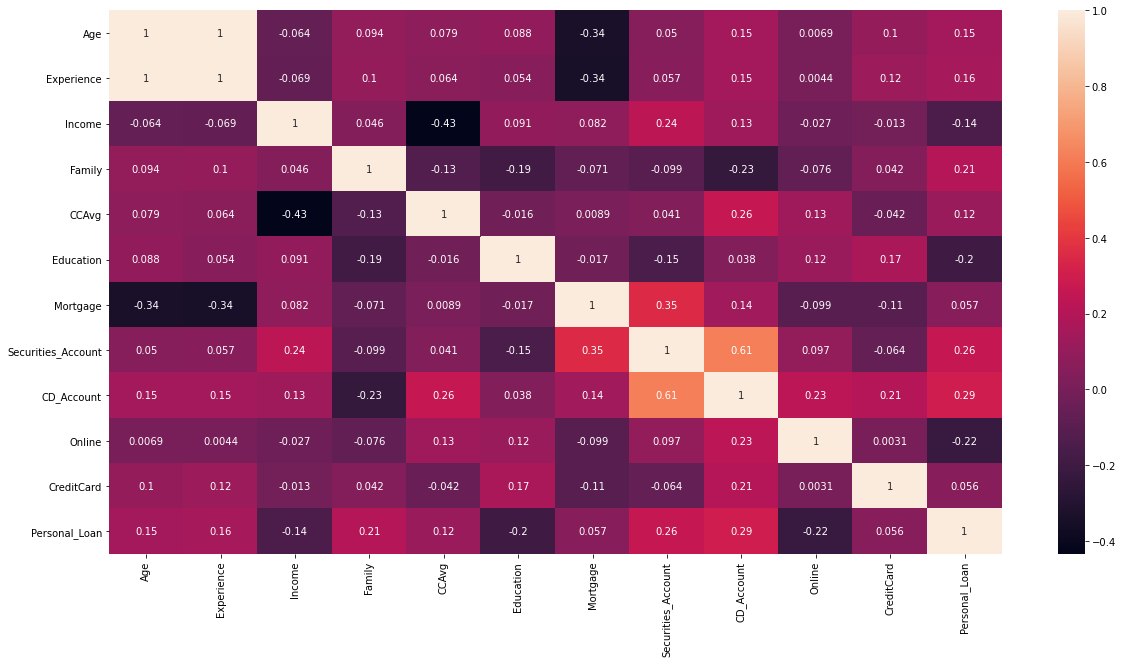

In [466]:
plt.figure(figsize=(20,10)); # Setting plot size - This size will be assumed for each plot unless otherwise stated

sns.heatmap(corr2, annot=True);

In [419]:
from pandas_profiling import ProfileReport # Import Pandas Profiling Report to summarized data misclassifications

profile  = ProfileReport(incorrect_data,title = 'Misclassified Data Points',minimal=True)
profile.to_widgets()

- There are 75 misclassifications and all those are on test data
- Incorrect Data consists of all misclassified elements